In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

import seaborn as sns
import statsmodels.api as sm #this line is now always in our opener
from patsy import dmatrices

from nba_api.stats.endpoints import teamgamelogs
from nba_api.stats.static import teams
nba_teams = teams.get_teams()
teamIDs = [team['id'] for team in nba_teams]

In [2]:
games = []
games.append(pd.read_csv(r'.\data\2014-15.csv', index_col=0))
games.append(pd.read_csv(r'.\data\2015-16.csv', index_col=0))
games.append(pd.read_csv(r'.\data\2016-17.csv', index_col=0))
games.append(pd.read_csv(r'.\data\2017-18.csv', index_col=0))
games.append(pd.read_csv(r'.\data\2018-19.csv', index_col=0))
games.append(pd.read_csv(r'.\data\2019-20.csv', index_col=0))
games.append(pd.read_csv(r'.\data\2020-21.csv', index_col=0))
games[0].head()

SEASON_YEAR     TEAM_ID TEAM_ABBREVIATION             TEAM_NAME   GAME_ID  \
0     2014-15  1610612747               LAL    Los Angeles Lakers  21400003   
1     2014-15  1610612759               SAS     San Antonio Spurs  21400002   
2     2014-15  1610612740               NOP  New Orleans Pelicans  21400001   
1     2014-15  1610612753               ORL         Orlando Magic  21400001   
2     2014-15  1610612745               HOU       Houston Rockets  21400003   

    GAME_DATE      MATCHUP WL   MIN       FGM  ...      PTS-  PLUS_MINUS-  \
0  2014-10-28  LAL vs. HOU  L  48.0  0.583333  ...  2.250000         18.0   
1  2014-10-28  SAS vs. DAL  W  48.0  0.770833  ...  2.083333         -1.0   
2  2014-10-28  NOP vs. ORL  W  48.0  0.854167  ...  1.750000        -17.0   
1  2014-10-28    ORL @ NOP  L  48.0  0.666667  ...  2.104167         17.0   
2  2014-10-28    HOU @ LAL  W  48.0  0.645833  ...  1.875000        -18.0   

   WPCT-  Away        Date  Home  MLA    MLH     OU  Spread  
0    1.0   HOU  2014-10-28   LAL -300  250.0  209.0     6.5  
1    0.0   DAL  2014-10-28   SAS  140 -165.0  206.5    -6.0  
2    0.0   ORL  2014-10-28   NOP  380 -475.0  196.0    -9.5  
1    1.0   ORL  2014-10-28   NOP  380 -475.0  196.0     9.5  
2    0.0   HOU  2014-10-28   LAL -300  250.0  209.0    -6.5  

[5 rows x 69 columns]

In [3]:
def getRestDays(team, opp, gameDate, year):
    teamGames = games[year][games[year]['TEAM_ABBREVIATION']==team].copy()
    oppGames = games[year][games[year]['TEAM_ABBREVIATION']==opp].copy()
    teamGames['GAME_DATE'] = pd.to_datetime(teamGames['GAME_DATE'])
    oppGames['GAME_DATE'] = pd.to_datetime(oppGames['GAME_DATE'])
    
    past14 = (pd.to_datetime(gameDate) - pd.to_timedelta(14, unit='days')).round(freq='H')
    past28 = (pd.to_datetime(gameDate) - pd.to_timedelta(28, unit='days')).round(freq='H')
    
    team14 = teamGames[(teamGames['GAME_DATE'] < gameDate) & (teamGames['GAME_DATE'] >= str(past14))]
    team28 = teamGames[(teamGames['GAME_DATE'] < gameDate) & (teamGames['GAME_DATE'] >= str(past28))]
    opp14 = oppGames[(oppGames['GAME_DATE'] < gameDate) & (oppGames['GAME_DATE'] >= str(past14))]
    opp28 = oppGames[(oppGames['GAME_DATE'] < gameDate) & (oppGames['GAME_DATE'] >= str(past28))]
    
    teamLast = teamGames[teamGames['GAME_DATE'] < gameDate]['GAME_DATE'].max()
    teamSince = 0
    if (not pd.isna(teamLast)):
        teamSince = (pd.to_datetime(gameDate) - pd.to_datetime(teamLast)).days
    oppLast = oppGames[oppGames['GAME_DATE'] < gameDate]['GAME_DATE'].max()
    oppSince = 0
    if (not pd.isna(oppLast)):
        oppSince = (pd.to_datetime(gameDate) - pd.to_datetime(oppLast)).days
    #print(str(teamSince) + '    ' + str(oppSince))
    toreturn = pd.Series([teamSince, 14-len(team14), 28-len(team28), oppSince, 14-len(opp14), 28-len(opp28)])
    print(toreturn)
    return toreturn

In [4]:
for i in range(0,len(games)):
    games[i][['REST_RECENT','REST_14','REST_28','REST_RECENT-','REST_14-','REST_28-']] = games[i].apply(lambda x: getRestDays(x['TEAM_ABBREVIATION'], x['TEAM_ABBREVIATION-'], x['GAME_DATE'], i), axis = 1)

0     0
1    14
2    28
3     0
4    14
5    28
dtype: int64
0     0
1    14
2    28
3     0
4    14
5    28
dtype: int64
0     0
1    14
2    28
3     0
4    14
5    28
dtype: int64
0     0
1    14
2    28
3     0
4    14
5    28
dtype: int64
0     0
1    14
2    28
3     0
4    14
5    28
dtype: int64
0     0
1    14
2    28
3     0
4    14
5    28
dtype: int64
0     0
1    14
2    28
3     0
4    14
5    28
dtype: int64
0     0
1    14
2    28
3     0
4    14
5    28
dtype: int64
0     0
1    14
2    28
3     0
4    14
5    28
dtype: int64
0     0
1    14
2    28
3     0
4    14
5    28
dtype: int64
0     0
1    14
2    28
3     0
4    14
5    28
dtype: int64
0     0
1    14
2    28
3     0
4    14
5    28
dtype: int64
0     0
1    14
2    28
3     0
4    14
5    28
dtype: int64
0     0
1    14
2    28
3     0
4    14
5    28
dtype: int64
0     0
1    14
2    28
3     0
4    14
5    28
dtype: int64
0     1
1    13
2    27
3     0
4    14
5    28
dtype: int64
0     0
1    14
2    28


0     2
1     9
2    23
3     2
4    10
5    24
dtype: int64
0     2
1    10
2    24
3     2
4    10
5    24
dtype: int64
0     2
1     9
2    23
3     2
4     9
5    23
dtype: int64
0     2
1     9
2    23
3     3
4     9
5    23
dtype: int64
0     1
1     9
2    23
3     2
4     9
5    23
dtype: int64
0     2
1     9
2    23
3     2
4    10
5    24
dtype: int64
0     2
1     9
2    23
3     2
4    11
5    25
dtype: int64
0     2
1     9
2    23
3     2
4     9
5    23
dtype: int64
0     2
1     9
2    23
3     1
4     9
5    23
dtype: int64
0     2
1    10
2    24
3     2
4     9
5    23
dtype: int64
0     2
1     9
2    23
3     2
4     9
5    23
dtype: int64
0     3
1     9
2    23
3     2
4     9
5    23
dtype: int64
0     1
1     8
2    22
3     1
4     9
5    23
dtype: int64
0     1
1     9
2    23
3     3
4     9
5    23
dtype: int64
0     3
1    10
2    24
3     2
4     8
5    22
dtype: int64
0     4
1    10
2    24
3     2
4    10
5    24
dtype: int64
0     2
1    10
2    24


0     2
1     7
2    18
3     3
4     8
5    20
dtype: int64
0     3
1     8
2    19
3     2
4     7
5    19
dtype: int64
0     3
1     8
2    20
3     2
4     7
5    18
dtype: int64
0     2
1     7
2    19
3     1
4     7
5    18
dtype: int64
0     1
1     7
2    19
3     2
4     8
5    20
dtype: int64
0     2
1     7
2    18
3     2
4     6
5    17
dtype: int64
0     2
1     8
2    18
3     3
4     7
5    19
dtype: int64
0     1
1     8
2    19
3     3
4     8
5    18
dtype: int64
0     3
1     8
2    18
3     1
4     8
5    19
dtype: int64
0     3
1     7
2    17
3     2
4     7
5    17
dtype: int64
0     3
1     7
2    19
3     2
4     8
5    18
dtype: int64
0     2
1     6
2    17
3     2
4     7
5    18
dtype: int64
0     2
1     7
2    17
3     3
4     7
5    17
dtype: int64
0     2
1     6
2    16
3     2
4     9
5    19
dtype: int64
0     2
1     7
2    18
3     1
4     7
5    16
dtype: int64
0     4
1     9
2    20
3     1
4     6
5    16
dtype: int64
0     2
1     8
2    18


dtype: int64
0     2
1     6
2    13
3     2
4     8
5    14
dtype: int64
0     2
1     8
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    18
3     2
4     7
5    15
dtype: int64
0     2
1     6
2    14
3     2
4     6
5    13
dtype: int64
0     3
1     8
2    14
3     5
4     9
5    17
dtype: int64
0     2
1     6
2    13
3     2
4     7
5    15
dtype: int64
0     2
1     6
2    13
3     2
4     6
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    14
3     2
4     8
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    16
dtype: int64
0     1
1     6
2    13
3     1
4     7
5    15
dtype: int64
0     1
1     8
2    15
3     1
4     6
5    12
dtype: int64
0     3
1     8
2    14
3     1
4     6
5    15
dtype: int64
0     3
1     7
2    16
3     1
4     8
5    14
dtype: int64
0     3
1     8
2    16
3     1
4     8
5    15
dtype: int64
0     3
1  

0     2
1     7
2    15
3     3
4     8
5    15
dtype: int64
0     3
1     9
2    16
3     3
4     8
5    15
dtype: int64
0     3
1     8
2    15
3     2
4     7
5    15
dtype: int64
0     1
1     7
2    16
3     1
4     8
5    16
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    16
3     2
4     7
5    15
dtype: int64
0     1
1     8
2    16
3     1
4     7
5    16
dtype: int64
0     1
1     7
2    13
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    13
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    13
3     1
4     6
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     1
1     8
2    15
3     1
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    13
dtype: int64
0     2
1     6
2    13
3     2
4     9
5    15
dtype: int64
0     2
1     6
2    14
3     2
4     8
5    15
dtype: int64
0     1
1     8
2    15
3     3
4     7
5    14
dtype: int64
0     2
1     9
2    15


dtype: int64
0     2
1     7
2    14
3     2
4     7
5    16
dtype: int64
0     3
1     9
2    15
3     2
4     6
5    14
dtype: int64
0     1
1     8
2    16
3     2
4     6
5    14
dtype: int64
0     2
1     7
2    14
3     1
4     8
5    14
dtype: int64
0     2
1     6
2    14
3     3
4     9
5    15
dtype: int64
0     1
1     8
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     6
2    14
3     1
4     8
5    16
dtype: int64
0     2
1     7
2    13
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    13
dtype: int64
0     3
1     7
2    14
3     2
4     6
5    14
dtype: int64
0     2
1     7
2    13
3     2
4     6
5    13
dtype: int64
0     3
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     4
4     8
5    15
dtype: int64
0     2
1     7
2    15
3     1
4     8
5    15
dtype: int64
0     4
1     8
2    15
3     1
4     6
5    15
dtype: int64
0     2
1  

0     2
1     9
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     1
4     7
5    14
dtype: int64
0     2
1     7
2    13
3     1
4     7
5    13
dtype: int64
0     2
1     6
2    12
3     2
4     9
5    17
dtype: int64
0     2
1     7
2    14
3     2
4     9
5    15
dtype: int64
0     1
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     1
1     8
2    16
3     2
4     8
5    14
dtype: int64
0     2
1     6
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    13
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     6
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    15


0     2
1     8
2    14
3     3
4     8
5    16
dtype: int64
0     2
1     8
2    14
3     2
4     7
5    12
dtype: int64
0     1
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     6
5    13
dtype: int64
0     4
1     8
2    14
3     2
4     8
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    13
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    13
dtype: int64
0     1
1     7
2    15
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    15
3     1
4     8
5    16
dtype: int64
0     1
1     6
2    14
3     1
4     6
5    14
dtype: int64
0     4
1     9
2    16
3     1
4     6
5    12
dtype: int64
0     3
1     9
2    15
3     4
4     8
5    15
dtype: int64
0     4
1     8
2    15
3     3
4     9
5    15
dtype: int64
0     1
1     6
2    12
3     4
4     9
5    16
dtype: int64
0     1
1     6
2    14


0     1
1     6
2    15
3     1
4     6
5    14
dtype: int64
0     1
1     7
2    15
3     1
4     7
5    15
dtype: int64
0     1
1     6
2    13
3     1
4     6
5    13
dtype: int64
0     1
1     7
2    15
3     1
4     7
5    15
dtype: int64
0     2
1     6
2    13
3     1
4     8
5    16
dtype: int64
0     1
1     8
2    15
3     1
4     7
5    14
dtype: int64
0     1
1     8
2    15
3     1
4     7
5    15
dtype: int64
0     1
1     6
2    13
3     1
4     6
5    13
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    16
dtype: int64
0     2
1     9
2    16
3     2
4     8
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    16
dtype: int64
0     2
1     8
2    14
3     2
4     9
5    16
dtype: int64
0     2
1     8
2    16
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    16
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    15
dtype: int64
0     4
1     9
2    16
3     1
4     8
5    16
dtype: int64
0     2
1     6
2    13


0     1
1     7
2    15
3     3
4     7
5    13
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    15
dtype: int64
0     1
1     6
2    13
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    13
3     2
4     7
5    14
dtype: int64
0     4
1     8
2    15
3     3
4     7
5    15
dtype: int64
0     2
1     6
2    15
3     4
4     9
5    16
dtype: int64
0     1
1     6
2    13
3     3
4     9
5    15
dtype: int64
0     4
1     8
2    15
3     3
4     7
5    14
dtype: int64
0     4
1     7
2    16
3     1
4     7
5    13
dtype: int64
0     5
1     9
2    16
3     1
4     6
5    15
dtype: int64
0     1
1     7
2    13
3     4
4     7
5    16
dtype: int64
0     2
1     6
2    14
3     2
4     6
5    15
dtype: int64
0     4
1     9
2    16
3     2
4     6
5    15
dtype: int64
0     3
1     7
2    15
3     4
4     8
5    15
dtype: int64
0     2
1     6
2    13
3     1
4     6
5    13
dtype: int64
0     3
1     7
2    14
3     4
4     8
5    15
dtype: int64
0     2
1     8
2    15


0     1
1     7
2    14
3     2
4     6
5    13
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     3
1     8
2    18
3     2
4     9
5    15
dtype: int64
0     3
1     6
2    12
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    14
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    15
3     2
4     9
5    15
dtype: int64
0     2
1     6
2    13
3     2
4     8
5    14
dtype: int64
0     1
1     6
2    16
3     1
4     6
5    13
dtype: int64
0     2
1     6
2    13
3     1
4     8
5    15
dtype: int64
0     2
1     9
2    17
3     1
4     6
5    12
dtype: int64
0     2
1     9
2    16
3     1
4     7
5    15
dtype: int64
0     2
1     8
2    14
3     2
4     6
5    13
dtype: int64
0     1
1     7
2    14
3     1
4     8
5    17
dtype: int64
0     1
1     8
2    15
3     2
4     6
5    13
dtype: int64
0     1
1     8
2    17
3     1
4     7
5    14
dtype: int64
0     1
1     6
2    12
3     2
4     9
5    17
dtype: int64
0     1
1     7
2    14


0     3
1    11
2    17
3     2
4    10
5    18
dtype: int64
0     2
1    10
2    16
3     1
4    11
5    17
dtype: int64
0     1
1    11
2    17
3     2
4    10
5    18
dtype: int64
0     1
1    11
2    17
3     2
4    11
5    18
dtype: int64
0     3
1    10
2    19
3     3
4    11
5    18
dtype: int64
0     3
1    11
2    19
3     1
4    10
5    17
dtype: int64
0     1
1    10
2    17
3     2
4    10
5    18
dtype: int64
0     2
1    11
2    17
3     2
4    10
5    17
dtype: int64
0     3
1    11
2    18
3     3
4    10
5    19
dtype: int64
0     2
1    10
2    18
3     3
4    11
5    17
dtype: int64
0     2
1    10
2    18
3     1
4    11
5    17
dtype: int64
0     2
1    10
2    18
3     1
4    10
5    17
dtype: int64
0     2
1    10
2    17
3     2
4    11
5    17
dtype: int64
0     1
1    10
2    17
3     3
4    11
5    19
dtype: int64
0     1
1    11
2    17
3     2
4    10
5    16
dtype: int64
0     2
1    11
2    18
3     1
4    11
5    17
dtype: int64
0     2
1    11
2    17


0     2
1     8
2    17
3     1
4     8
5    18
dtype: int64
0     2
1     7
2    16
3     1
4     7
5    16
dtype: int64
0     2
1     8
2    17
3     1
4     7
5    17
dtype: int64
0     2
1     7
2    16
3     3
4     9
5    19
dtype: int64
0     2
1     7
2    17
3     1
4     8
5    17
dtype: int64
0     2
1     7
2    16
3     4
4     9
5    18
dtype: int64
0     3
1     9
2    18
3     2
4     7
5    17
dtype: int64
0     3
1     7
2    16
3     2
4     7
5    18
dtype: int64
0     2
1     7
2    17
3     1
4     7
5    16
dtype: int64
0     1
1     7
2    17
3     1
4     8
5    17
dtype: int64
0     2
1     7
2    18
3     3
4     7
5    16
dtype: int64
0     2
1     7
2    17
3     1
4     6
5    16
dtype: int64
0     3
1     7
2    17
3     1
4     8
5    18
dtype: int64
0     1
1     6
2    16
3     2
4     7
5    17
dtype: int64
0     1
1     8
2    18
3     3
4     7
5    17
dtype: int64
0     2
1     6
2    17
3     3
4     7
5    18
dtype: int64
0     2
1     7
2    17


0     2
1     8
2    17
3     1
4     6
5    16
dtype: int64
0     3
1     7
2    17
3     1
4     7
5    16
dtype: int64
0     2
1     7
2    17
3     1
4     7
5    17
dtype: int64
0     1
1     6
2    15
3     2
4     8
5    18
dtype: int64
0     1
1     7
2    16
3     3
4     7
5    17
dtype: int64
0     1
1     6
2    16
3     2
4     8
5    17
dtype: int64
0     5
1     7
2    16
3     2
4     6
5    15
dtype: int64
0     3
1     7
2    17
3     2
4     8
5    17
dtype: int64
0     2
1     6
2    15
3     2
4     8
5    16
dtype: int64
0     2
1     7
2    17
3     3
4     7
5    16
dtype: int64
0     2
1     8
2    16
3     2
4     6
5    15
dtype: int64
0     2
1     7
2    16
3     3
4     7
5    16
dtype: int64
0     3
1     9
2    17
3     2
4     8
5    17
dtype: int64
0     2
1     7
2    15
3     1
4     7
5    16
dtype: int64
0     2
1     8
2    16
3     2
4     8
5    18
dtype: int64
0     3
1     7
2    16
3     2
4     7
5    17
dtype: int64
0     2
1     8
2    17


0     2
1     7
2    14
3     2
4     6
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    13
3     2
4     7
5    14
dtype: int64
0     3
1     7
2    15
3     1
4     6
5    11
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    15
dtype: int64
0     1
1     6
2    11
3     3
4     7
5    15
dtype: int64
0     2
1     8
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    13
dtype: int64
0     2
1     6
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     6
2    13
3     1
4     8
5    14
dtype: int64
0     3
1     8
2    14
3     1
4     6
5    12
dtype: int64
0     1
1     6
2    14
3     2
4     7
5    13
dtype: int64
0     1
1     7
2    13
3     2
4     6
5    12
dtype: int64
0     3
1     7
2    14


0     2
1     6
2    13
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    14
3     2
4     6
5    12
dtype: int64
0     2
1     7
2    15
3     4
4     7
5    13
dtype: int64
0     2
1     6
2    13
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    13
dtype: int64
0     2
1     6
2    12
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    13
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    13
3     2
4     9
5    15
dtype: int64
0     2
1     6
2    13
3     2
4     8
5    14
dtype: int64
0     4
1     7
2    13
3     2
4     7
5    15
dtype: int64
0     2
1     6
2    13
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    14
3     2
4     6
5    13
dtype: int64
0     1
1     7
2    13
3     1
4     9
5    15
dtype: int64
0     3
1     8
2    14
3     1
4     8
5    14
dtype: int64
0     2
1     7
2    13
3     2
4     8
5    16
dtype: int64
0     1
1     8
2    15


0     2
1     9
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     9
5    16
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    14
dtype: int64
0     2
1     6
2    12
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    13
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    16
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    14
dtype: int64
0     1
1     7
2    14
3     2
4     8
5    14
dtype: int64
0     1
1     6
2    12
3     2
4     8
5    16
dtype: int64
0     2
1     7
2    13
3     2
4     8
5    16
dtype: int64
0     1
1     9
2    16
3     1
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     1
4     8
5    15
dtype: int64
0     2
1     7
2    13
3     2
4     8
5    14
dtype: int64
0     2
1     7
2    13
3     1
4     7
5    14
dtype: int64
0     2
1     7
2    13


0     2
1    12
2    26
3     1
4    12
5    26
dtype: int64
0     1
1    12
2    26
3     2
4    12
5    26
dtype: int64
0     2
1    12
2    26
3     2
4    12
5    26
dtype: int64
0     2
1    12
2    26
3     2
4    12
5    26
dtype: int64
0     2
1    12
2    26
3     2
4    12
5    26
dtype: int64
0     2
1    12
2    26
3     2
4    11
5    25
dtype: int64
0     2
1    12
2    26
3     3
4    12
5    26
dtype: int64
0     2
1    12
2    26
3     2
4    12
5    26
dtype: int64
0     2
1    12
2    26
3     2
4    12
5    26
dtype: int64
0     2
1    12
2    26
3     2
4    12
5    26
dtype: int64
0     2
1    12
2    26
3     2
4    12
5    26
dtype: int64
0     2
1    11
2    25
3     2
4    12
5    26
dtype: int64
0     3
1    12
2    26
3     2
4    12
5    26
dtype: int64
0     2
1    12
2    26
3     2
4    11
5    25
dtype: int64
0     2
1    12
2    26
3     2
4    12
5    26
dtype: int64
0     2
1    11
2    25
3     2
4    12
5    26
dtype: int64
0     3
1    11
2    25


0     2
1     8
2    22
3     2
4     7
5    21
dtype: int64
0     2
1     7
2    21
3     2
4     7
5    21
dtype: int64
0     2
1     7
2    21
3     2
4     8
5    22
dtype: int64
0     2
1     7
2    21
3     3
4     8
5    22
dtype: int64
0     2
1     7
2    21
3     3
4     8
5    22
dtype: int64
0     3
1     8
2    22
3     3
4     8
5    22
dtype: int64
0     2
1     7
2    21
3     2
4     7
5    21
dtype: int64
0     2
1     8
2    22
3     2
4     7
5    21
dtype: int64
0     1
1     8
2    22
3     3
4     8
5    22
dtype: int64
0     3
1     8
2    22
3     1
4     8
5    22
dtype: int64
0     3
1     8
2    22
3     2
4     7
5    21
dtype: int64
0     4
1     9
2    23
3     3
4     7
5    21
dtype: int64
0     3
1     8
2    22
3     3
4     8
5    22
dtype: int64
0     3
1     7
2    21
3     4
4     9
5    23
dtype: int64
0     3
1     8
2    22
3     2
4     7
5    21
dtype: int64
0     2
1     7
2    21
3     1
4     6
5    20
dtype: int64
0     1
1     8
2    22


0     2
1     7
2    16
3     4
4     8
5    16
dtype: int64
0     2
1     7
2    16
3     2
4     7
5    17
dtype: int64
0     2
1     9
2    17
3     1
4     6
5    15
dtype: int64
0     1
1     8
2    17
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    17
3     2
4     7
5    16
dtype: int64
0     3
1     7
2    16
3     2
4     8
5    16
dtype: int64
0     2
1     7
2    16
3     2
4     6
5    16
dtype: int64
0     2
1     7
2    17
3     2
4     7
5    16
dtype: int64
0     2
1     7
2    16
3     2
4     8
5    17
dtype: int64
0     2
1     7
2    16
3     2
4     8
5    17
dtype: int64
0     4
1     7
2    17
3     2
4     6
5    15
dtype: int64
0     2
1     6
2    16
3     3
4     7
5    17
dtype: int64
0     1
1     6
2    15
3     2
4     9
5    17
dtype: int64
0     2
1     8
2    16
3     3
4     7
5    16
dtype: int64
0     2
1     7
2    15
3     1
4     8
5    17
dtype: int64
0     2
1     6
2    16
3     2
4     8
5    17
dtype: int64
0     1
1     7
2    15


0     1
1     8
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     9
2    16
3     1
4     8
5    15
dtype: int64
0     2
1     6
2    14
3     2
4     9
5    14
dtype: int64
0     2
1     7
2    13
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    14
dtype: int64
0     1
1     7
2    13
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     1
4     7
5    13
dtype: int64
0     2
1     8
2    14
3     1
4     7
5    14
dtype: int64
0     2
1     9
2    16
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    13
3     3
4     7
5    14
dtype: int64
0     1
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     3
1     9
2    18
3     2
4     6
5    14
dtype: int64
0     2
1     7
2    13


0     2
1     8
2    15
3     3
4     9
5    16
dtype: int64
0     3
1     8
2    17
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     3
4     7
5    14
dtype: int64
0     2
1     9
2    18
3     2
4     8
5    14
dtype: int64
0     2
1     8
2    14
3     2
4     9
5    18
dtype: int64
0     2
1     6
2    16
3     1
4     6
5    13
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    17
dtype: int64
0     2
1     7
2    14
3     2
4     6
5    14
dtype: int64
0     1
1     7
2    15
3     2
4     6
5    13
dtype: int64
0     1
1     6
2    13
3     2
4     6
5    16
dtype: int64
0     5
1     8
2    15
3     2
4     7
5    13
dtype: int64
0     2
1     6
2    13
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     1
4     8
5    16
dtype: int64
0     2
1     8
2    17
3     2
4     8
5    15
dtype: int64
0     1
1     7
2    14
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    14


0     3
1     7
2    15
3     1
4     8
5    16
dtype: int64
0     1
1     7
2    15
3     2
4     9
5    16
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    13
dtype: int64
0     1
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     3
1     9
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     6
2    13
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    15
3     2
4     6
5    12
dtype: int64
0     3
1     9
2    17
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    13
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    16
dtype: int64
0     2
1     7
2    13
3     2
4     7
5    12
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     6
5    13
dtype: int64
0     2
1     6
2    12
3     2
4     7
5    16
dtype: int64
0     2
1     7
2    15


0     2
1     7
2    13
3     2
4     8
5    17
dtype: int64
0     2
1     7
2    13
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     1
1     8
2    17
3     3
4    10
5    17
dtype: int64
0     2
1     8
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    17
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     1
1     7
2    13
3     2
4     8
5    16
dtype: int64
0     1
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    15


0     3
1     8
2    15
3     1
4     7
5    14
dtype: int64
0     2
1     9
2    15
3     3
4     8
5    13
dtype: int64
0     3
1     8
2    13
3     2
4     9
5    15
dtype: int64
0     1
1     6
2    13
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    13
dtype: int64
0     2
1     8
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    13
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    13
3     3
4     7
5    16
dtype: int64
0     2
1     7
2    13
3     2
4     7
5    16
dtype: int64
0     3
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    16
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    15
3     3
4     7
5    14
dtype: int64
0     3
1     7
2    16
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    14


0     2
1     6
2    14
3     3
4     7
5    15
dtype: int64
0     1
1     7
2    14
3     2
4     9
5    16
dtype: int64
0     2
1     6
2    14
3     1
4     6
5    13
dtype: int64
0     2
1     6
2    13
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     9
1    10
2    17
3     2
4     8
5    16
dtype: int64
0     2
1     6
2    14
3     9
4    10
5    18
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     3
1     7
2    14
3     2
4     8
5    16
dtype: int64
0     2
1     7
2    15
3     3
4     8
5    16
dtype: int64
0     2
1     7
2    14
3     2
4     6
5    13
dtype: int64
0     1
1     6
2    13
3     2
4     6
5    14
dtype: int64
0     3
1     7
2    15
3     2
4     6
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    16
3     3
4     7
5    14
dtype: int64
0     2
1     9
2    16
3     1
4     7
5    14
dtype: int64
0     2
1     7
2    14


0     2
1     7
2    14
3     3
4     7
5    14
dtype: int64
0     2
1     8
2    14
3     3
4     8
5    16
dtype: int64
0     3
1     8
2    16
3     2
4     8
5    14
dtype: int64
0     2
1     9
2    17
3     2
4     8
5    14
dtype: int64
0     2
1     8
2    15
3     1
4     7
5    15
dtype: int64
0     1
1     7
2    15
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    14
3     1
4     6
5    15
dtype: int64
0     1
1     6
2    15
3     2
4     8
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     6
5    14
dtype: int64
0     2
1     6
2    13
3     3
4     9
5    17
dtype: int64
0     3
1     8
2    16
3     2
4     6
5    13
dtype: int64
0     2
1     8
2    17
3     1
4     7
5    13
dtype: int64
0     1
1     7
2    14
3     3
4     7
5    13
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    14
3     2
4     7
5    14
dtype: int64
0     1
1     7
2    13
3     2
4     7
5    16
dtype: int64
0     2
1     6
2    12


0     2
1     7
2    14
3     1
4     6
5    13
dtype: int64
0     1
1     7
2    14
3     1
4     7
5    13
dtype: int64
0     1
1     6
2    12
3     1
4     8
5    16
dtype: int64
0     3
1     9
2    15
3     3
4     9
5    15
dtype: int64
0     2
1     8
2    16
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    14
3     1
4     8
5    16
dtype: int64
0     2
1     7
2    16
3     1
4     8
5    14
dtype: int64
0     1
1     8
2    14
3     2
4     7
5    16
dtype: int64
0     3
1     9
2    15
3     3
4     9
5    15
dtype: int64
0     1
1     8
2    16
3     2
4     7
5    14
dtype: int64
0     1
1     7
2    14
3     2
4     6
5    13
dtype: int64
0     1
1     6
2    13
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    13
3     2
4     8
5    16
dtype: int64
0     3
1     7
2    14
3     1
4     7
5    13
dtype: int64
0     1
1     8
2    16
3     1
4     6
5    12
dtype: int64
0     1
1     7
2    13
3     1
4     7
5    14
dtype: int64
0     1
1     7
2    13


0     2
1    10
2    17
3     1
4    10
5    16
dtype: int64
0     2
1    10
2    18
3     1
4    10
5    17
dtype: int64
0     1
1    10
2    16
3     2
4    10
5    17
dtype: int64
0     2
1    10
2    18
3     2
4    10
5    16
dtype: int64
0     1
1    10
2    18
3     2
4    11
5    17
dtype: int64
0     1
1    10
2    17
3     2
4    11
5    17
dtype: int64
0     1
1    10
2    16
3     1
4    10
5    16
dtype: int64
0     2
1    11
2    17
3     2
4    11
5    18
dtype: int64
0     2
1    11
2    17
3     4
4    12
5    18
dtype: int64
0     2
1     9
2    17
3     4
4    11
5    19
dtype: int64
0     3
1     9
2    16
3     2
4    10
5    17
dtype: int64
0     2
1    11
2    18
3     2
4    11
5    17
dtype: int64
0     2
1    11
2    18
3     2
4    11
5    17
dtype: int64
0     2
1    10
2    17
3     3
4     9
5    16
dtype: int64
0     4
1    11
2    19
3     2
4     9
5    17
dtype: int64
0     2
1    11
2    17
3     2
4    11
5    18
dtype: int64
0     4
1    12
2    18


0     2
1     7
2    18
3     3
4     8
5    18
dtype: int64
0     2
1     6
2    16
3     1
4     6
5    17
dtype: int64
0     4
1     8
2    17
3     2
4     6
5    15
dtype: int64
0     1
1     7
2    18
3     2
4     6
5    16
dtype: int64
0     3
1     7
2    18
3     2
4     7
5    17
dtype: int64
0     2
1     7
2    18
3     2
4     7
5    18
dtype: int64
0     2
1     6
2    15
3     4
4     8
5    17
dtype: int64
0     1
1     6
2    17
3     2
4     6
5    16
dtype: int64
0     3
1     7
2    17
3     2
4     7
5    17
dtype: int64
0     2
1     7
2    17
3     2
4     6
5    16
dtype: int64
0     2
1     6
2    16
3     1
4     7
5    18
dtype: int64
0     2
1     7
2    19
3     2
4     6
5    17
dtype: int64
0     2
1     6
2    17
3     2
4     7
5    19
dtype: int64
0     2
1     6
2    16
3     2
4     7
5    17
dtype: int64
0     3
1     8
2    18
3     2
4     7
5    18
dtype: int64
0     2
1     7
2    18
3     2
4     7
5    18
dtype: int64
0     2
1     7
2    16


0     2
1     7
2    16
3     2
4     8
5    17
dtype: int64
0     1
1     6
2    14
3     1
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    16
dtype: int64
0     2
1     7
2    16
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    16
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    16
dtype: int64
0     3
1     8
2    16
3     2
4     8
5    16
dtype: int64
0     2
1     8
2    17
3     2
4     7
5    16
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    16
dtype: int64
0     2
1     6
2    15
3     2
4     7
5    17
dtype: int64
0     2
1     7
2    16
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    16
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    16
3     2
4     7
5    15
dtype: int64
0     3
1     8
2    16
3     2
4     7
5    16
dtype: int64
0     2
1     7
2    17
3     2
4     6
5    15
dtype: int64
0     1
1     7
2    15
3     1
4     6
5    14
dtype: int64
0     2
1     7
2    16


0     1
1     9
2    16
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    14
3     1
4     7
5    14
dtype: int64
0     2
1     6
2    13
3     3
4     7
5    15
dtype: int64
0     3
1     8
2    14
3     3
4     8
5    15
dtype: int64
0     2
1     6
2    13
3     2
4     7
5    14
dtype: int64
0     2
1     6
2    13
3     2
4     7
5    14
dtype: int64
0     3
1     7
2    14
3     1
4     6
5    14
dtype: int64
0     2
1     7
2    15
3     3
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     3
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    13
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    15
3     1
4     9
5    16
dtype: int64
0     1
1     6
2    14
3     3
4     7
5    14
dtype: int64
0     2
1     9
2    15
3     2
4     6
5    13
dtype: int64
0     2
1     6
2    14
3     2
4     7
5    13
dtype: int64
0     1
1     7
2    14
3     2
4     8
5    14
dtype: int64
0     2
1     7
2    14


0     3
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    13
3     2
4     7
5    13
dtype: int64
0     2
1     6
2    13
3     1
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     1
4     7
5    14
dtype: int64
0     2
1     7
2    13
3     1
4     6
5    12
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    13
dtype: int64
0     2
1     8
2    14
3     1
4     6
5    13
dtype: int64
0     3
1     8
2    14
3     3
4     7
5    14
dtype: int64
0     2
1     7
2    13
3     2
4     7
5    14
dtype: int64
0     3
1     7
2    14
3     1
4     7
5    13
dtype: int64
0     2
1     8
2    15
3     1
4     7
5    15
dtype: int64
0     2
1     6
2    13
3     1
4     6
5    12
dtype: int64
0     2
1     6
2    13
3     1
4     7
5    13
dtype: int64
0     1
1     7
2    13
3     2
4     6
5    13
dtype: int64
0     1
1     6
2    12
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    15
3     1
4     7
5    14
dtype: int64
0     1
1     7
2    13


0     2
1     7
2    15
3     3
4     8
5    15
dtype: int64
0     2
1     8
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     1
4     6
5    13
dtype: int64
0     2
1     7
2    14
3     1
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    13
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    13
3     2
4     7
5    14
dtype: int64
0     1
1     8
2    15
3     1
4     7
5    13
dtype: int64
0     1
1     7
2    13
3     2
4     7
5    14
dtype: int64
0     1
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     6
2    12
3     2
4     6
5    13
dtype: int64
0     1
1     8
2    14
3     2
4     7
5    14
dtype: int64
0     1
1     7
2    13
3     1
4     8
5    15
dtype: int64
0     1
1     7
2    13
3     1
4     6
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    13
dtype: int64
0     1
1     6
2    14


0     2
1    12
2    26
3     1
4    12
5    26
dtype: int64
0     2
1    12
2    26
3     2
4    12
5    26
dtype: int64
0     1
1    12
2    26
3     2
4    12
5    26
dtype: int64
0     2
1    12
2    26
3     2
4    11
5    25
dtype: int64
0     2
1    12
2    26
3     3
4    12
5    26
dtype: int64
0     1
1    11
2    25
3     1
4    12
5    26
dtype: int64
0     2
1    11
2    25
3     2
4    12
5    26
dtype: int64
0     2
1    11
2    25
3     2
4    12
5    26
dtype: int64
0     3
1    12
2    26
3     2
4    12
5    26
dtype: int64
0     1
1    12
2    26
3     1
4    11
5    25
dtype: int64
0     2
1    12
2    26
3     2
4    11
5    25
dtype: int64
0     2
1    11
2    25
3     3
4    11
5    25
dtype: int64
0     3
1    12
2    26
3     3
4    11
5    25
dtype: int64
0     2
1    11
2    25
3     3
4    12
5    26
dtype: int64
0     3
1    12
2    26
3     2
4    11
5    25
dtype: int64
0     3
1    11
2    25
3     2
4    11
5    25
dtype: int64
0     3
1    11
2    25


0     1
1     6
2    20
3     3
4     9
5    22
dtype: int64
0     2
1     7
2    20
3     4
4     8
5    21
dtype: int64
0     2
1     7
2    20
3     2
4     6
5    19
dtype: int64
0     2
1     8
2    21
3     1
4     7
5    20
dtype: int64
0     3
1     9
2    22
3     1
4     6
5    20
dtype: int64
0     2
1     6
2    19
3     2
4     7
5    20
dtype: int64
0     1
1     7
2    20
3     2
4     8
5    21
dtype: int64
0     4
1     8
2    21
3     2
4     7
5    20
dtype: int64
0     2
1     6
2    19
3     2
4     7
5    20
dtype: int64
0     2
1     9
2    21
3     2
4     8
5    21
dtype: int64
0     2
1     7
2    20
3     2
4     8
5    21
dtype: int64
0     3
1     8
2    21
3     2
4     8
5    21
dtype: int64
0     2
1     8
2    21
3     2
4     8
5    21
dtype: int64
0     2
1     7
2    20
3     2
4     7
5    20
dtype: int64
0     2
1     8
2    21
3     2
4     9
5    21
dtype: int64
0     2
1     7
2    20
3     2
4     8
5    20
dtype: int64
0     2
1     8
2    20


0     1
1     6
2    15
3     1
4     7
5    16
dtype: int64
0     1
1     8
2    17
3     3
4     7
5    16
dtype: int64
0     2
1     7
2    17
3     2
4     8
5    17
dtype: int64
0     2
1     7
2    17
3     1
4     8
5    16
dtype: int64
0     1
1     7
2    16
3     1
4     6
5    15
dtype: int64
0     3
1     7
2    16
3     1
4     8
5    17
dtype: int64
0     1
1     8
2    17
3     1
4     7
5    15
dtype: int64
0     2
1     8
2    17
3     1
4     8
5    16
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    16
dtype: int64
0     2
1     8
2    17
3     2
4     7
5    17
dtype: int64
0     1
1     6
2    15
3     2
4     7
5    16
dtype: int64
0     2
1     7
2    16
3     1
4     6
5    15
dtype: int64
0     2
1     6
2    16
3     1
4     7
5    15
dtype: int64
0     1
1     8
2    16
3     2
4     8
5    17
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    16
dtype: int64
0     2
1     7
2    16
3     1
4     6
5    14
dtype: int64
0     2
1     7
2    15


0     1
1     8
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     6
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     6
2    13
3     2
4     7
5    14
dtype: int64
0     3
1     7
2    15
3     2
4     6
5    15
dtype: int64
0     2
1     6
2    15
3     3
4     7
5    15
dtype: int64
0     3
1     7
2    14
3     1
4     6
5    13
dtype: int64
0     2
1     7
2    15
3     2
4     6
5    14
dtype: int64
0     2
1     7
2    14
3     3
4     8
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     6
5    13
dtype: int64
0     2
1     8
2    15
3     1
4     8
5    14
dtype: int64
0     1
1     6
2    13
3     3
4     7
5    14
dtype: int64
0     1
1     6
2    13
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    16
3     2
4     8
5    16
dtype: int64
0     3
1     7
2    13
3     1
4     6
5    14
dtype: int64
0     2
1     7
2    14
3     1
4     8
5    13
dtype: int64
0     2
1     7
2    13
3     2
4     8
5    16
dtype: int64
0     2
1     7
2    13


0     3
1     8
2    14
3     2
4     7
5    13
dtype: int64
0     2
1     6
2    13
3     1
4     8
5    14
dtype: int64
0     2
1     7
2    14
3     3
4     8
5    14
dtype: int64
0     3
1     8
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    13
3     3
4     8
5    14
dtype: int64
0     1
1     7
2    13
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     1
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     1
1     8
2    14
3     2
4     6
5    13
dtype: int64
0     1
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     6
2    13
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    14
dtype: int64
0     2
1     7
2    16
3     2
4     6
5    13
dtype: int64
0     4
1     8
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     6
2    13
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    13


0     2
1     6
2    14
3     2
4     6
5    13
dtype: int64
0     1
1     7
2    13
3     4
4     8
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     1
1     7
2    13
3     2
4     6
5    14
dtype: int64
0     4
1     8
2    14
3     1
4     7
5    13
dtype: int64
0     2
1     6
2    13
3     2
4     6
5    14
dtype: int64
0     1
1     8
2    14
3     1
4     6
5    12
dtype: int64
0     3
1     8
2    16
3     1
4     6
5    12
dtype: int64
0     3
1     8
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     1
1     6
2    12
3     1
4     8
5    14
dtype: int64
0     2
1     6
2    14
3     1
4     7
5    13
dtype: int64
0     1
1     6
2    12
3     3
4     8
5    16
dtype: int64
0     2
1     7
2    15
3     3
4     8
5    15
dtype: int64
0     2
1     8
2    14
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     6
2    14


0     1
1     7
2    14
3     4
4     7
5    15
dtype: int64
0     3
1     7
2    15
3     3
4     8
5    14
dtype: int64
0     3
1     7
2    14
3     3
4     7
5    14
dtype: int64
0     3
1     8
2    14
3     1
4     7
5    14
dtype: int64
0     3
1     7
2    15
3     3
4     9
5    16
dtype: int64
0     3
1     7
2    14
3     3
4     8
5    15
dtype: int64
0     1
1     6
2    14
3     3
4     8
5    15
dtype: int64
0     1
1     8
2    14
3     3
4     8
5    15
dtype: int64
0     3
1     7
2    15
3     3
4     8
5    15
dtype: int64
0     3
1     8
2    15
3     3
4     7
5    15
dtype: int64
0     1
1     7
2    13
3     1
4     7
5    13
dtype: int64
0     4
1     8
2    15
3     2
4     7
5    12
dtype: int64
0     1
1     6
2    13
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    12
3     4
4     8
5    15
dtype: int64
0     4
1     8
2    14
3     2
4     7
5    16
dtype: int64
0     2
1     7
2    14
3     1
4     6
5    13
dtype: int64
0     2
1     7
2    16


0     2
1     8
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     6
5    14
dtype: int64
0     3
1     8
2    14
3     1
4     7
5    14
dtype: int64
0     2
1     8
2    14
3     3
4     8
5    16
dtype: int64
0     3
1     9
2    14
3     1
4     8
5    16
dtype: int64
0     2
1     8
2    14
3     2
4     7
5    14
dtype: int64
0     1
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     1
4     8
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    14
dtype: int64
0     3
1     8
2    16
3     2
4     8
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    15
dtype: int64
0     1
1     8
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    15
3     1
4     7
5    14
dtype: int64
0     1
1     7
2    14
3     3
4     8
5    14
dtype: int64
0     1
1     8
2    16


0     2
1     7
2    15
3     3
4     7
5    15
dtype: int64
0     2
1     8
2    16
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     3
4     9
5    15
dtype: int64
0     3
1     9
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     1
4     6
5    14
dtype: int64
0     2
1     7
2    15
3     3
4     8
5    15
dtype: int64
0     3
1     7
2    14
3     4
4     8
5    16
dtype: int64
0     3
1     8
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    17
3     1
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     4
4     9
5    17
dtype: int64
0     1
1     6
2    13
3     2
4     8
5    14
dtype: int64
0     2
1     8
2    16
3     4
4    10
5    17
dtype: int64
0     2
1     6
2    14
3     2
4     8
5    15
dtype: int64
0     3
1     8
2    16
3     3
4     8
5    15
dtype: int64
0     1
1     8
2    15
3     1
4     6
5    14
dtype: int64
0     4
1    10
2    17
3     2
4     8
5    16
dtype: int64
0     1
1     7
2    14


0     3
1     8
2    15
3     4
4     8
5    15
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    14
dtype: int64
0     2
1     6
2    13
3     1
4     8
5    16
dtype: int64
0     1
1     7
2    13
3     4
4     8
5    16
dtype: int64
0     2
1     6
2    12
3     3
4     8
5    16
dtype: int64
0     1
1     7
2    14
3     2
4     7
5    13
dtype: int64
0     1
1     7
2    15
3     1
4     8
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    16
dtype: int64
0     3
1     8
2    17
3     2
4     8
5    15
dtype: int64
0     1
1     8
2    14
3     1
4     7
5    15
dtype: int64
0     2
1     8
2    15
3     3
4     8
5    17
dtype: int64
0     2
1     7
2    16
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    13
3     1
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    12
dtype: int64
0     2
1     6
2    13
3     2
4     6
5    14
dtype: int64
0     2
1     8
2    16


0     2
1     7
2    15
3     1
4     6
5    14
dtype: int64
0     3
1     7
2    16
3     2
4     6
5    13
dtype: int64
0     3
1     7
2    15
3     3
4     8
5    15
dtype: int64
0     1
1     7
2    14
3     1
4     7
5    15
dtype: int64
0     3
1     8
2    15
3     3
4     7
5    15
dtype: int64
0     2
1     6
2    13
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    15
3     2
4     9
5    15
dtype: int64
0     2
1     7
2    15
3     3
4     9
5    17
dtype: int64
0     2
1     9
2    15
3     2
4     7
5    15
dtype: int64
0     3
1     9
2    17
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    13
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    15
3     3
4     8
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    16
dtype: int64
0     2
1     7
2    16
3     1
4     6
5    14
dtype: int64
0     1
1     6
2    13
3     1
4     8
5    17
dtype: int64
0     2
1     7
2    14


0     4
1     8
2    17
3     2
4     7
5    13
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    14
3     3
4     8
5    15
dtype: int64
0     3
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    13
3     4
4     8
5    17
dtype: int64
0     4
1     9
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     6
2    13
3     1
4     6
5    14
dtype: int64
0     2
1     7
2    14
3     1
4     7
5    12
dtype: int64
0     2
1     6
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     6
5    12
dtype: int64
0     1
1     7
2    14
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     6
2    13
3     1
4     8
5    17
dtype: int64
0     2
1     6
2    13
3     1
4     7
5    14
dtype: int64
0     2
1     7
2    14


0     2
1    10
2    18
3     2
4    10
5    17
dtype: int64
0     2
1    11
2    17
3     2
4    10
5    18
dtype: int64
0     2
1    10
2    18
3     2
4    11
5    17
dtype: int64
0     3
1    11
2    18
3     2
4    10
5    17
dtype: int64
0     2
1    10
2    17
3     2
4    11
5    18
dtype: int64
0     2
1    10
2    18
3     2
4    10
5    17
dtype: int64
0     1
1    10
2    17
3     1
4    10
5    16
dtype: int64
0     2
1    10
2    17
3     2
4    11
5    18
dtype: int64
0     2
1    10
2    17
3     2
4    11
5    18
dtype: int64
0     2
1    11
2    18
3     2
4    10
5    17
dtype: int64
0     3
1    11
2    19
3     2
4    10
5    16
dtype: int64
0     2
1    10
2    18
3     2
4    10
5    17
dtype: int64
0     2
1    10
2    17
3     2
4    10
5    18
dtype: int64
0     2
1    10
2    17
3     3
4    11
5    18
dtype: int64
0     2
1    10
2    18
3     2
4    10
5    17
dtype: int64
0     2
1    10
2    17
3     2
4    10
5    18
dtype: int64
0     2
1    11
2    18


0     1
1     6
2    17
3     1
4     7
5    18
dtype: int64
0     2
1     8
2    17
3     1
4     7
5    17
dtype: int64
0     2
1     8
2    19
3     1
4     7
5    17
dtype: int64
0     1
1     7
2    17
3     2
4     8
5    17
dtype: int64
0     1
1     7
2    18
3     1
4     6
5    17
dtype: int64
0     2
1     8
2    17
3     2
4     6
5    16
dtype: int64
0     2
1     8
2    18
3     1
4     7
5    17
dtype: int64
0     1
1     7
2    17
3     2
4     8
5    18
dtype: int64
0     1
1     7
2    17
3     3
4     8
5    19
dtype: int64
0     1
1     7
2    17
3     2
4     8
5    19
dtype: int64
0     3
1     8
2    19
3     1
4     7
5    17
dtype: int64
0     1
1     8
2    18
3     2
4     7
5    16
dtype: int64
0     2
1     7
2    17
3     2
4     7
5    17
dtype: int64
0     2
1     7
2    16
3     2
4     7
5    17
dtype: int64
0     2
1     6
2    16
3     2
4     8
5    18
dtype: int64
0     2
1     7
2    17
3     2
4     7
5    17
dtype: int64
0     2
1     6
2    16


0     2
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     1
1     6
2    14
3     1
4     6
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     1
1     6
2    13
3     3
4     7
5    15
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     1
1     6
2    14
3     1
4     6
5    14
dtype: int64
0     3
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     6
2    12
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     6
2    14
3     1
4     8
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     6
5    12
dtype: int64
0     2
1     7
2    14


0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     1
1     7
2    13
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    14
3     2
4     6
5    12
dtype: int64
0     2
1     8
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     1
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     6
2    12
3     1
4     6
5    13
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    14
dtype: int64
0     2
1     7
2    14
3     3
4     8
5    15
dtype: int64
0     2
1     7
2    13
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    13
3     1
4     8
5    14
dtype: int64
0     2
1     8
2    15
3     1
4     6
5    13
dtype: int64
0     2
1     8
2    14
3     3
4     7
5    14
dtype: int64
0     2
1     6
2    12
3     2
4     8
5    15
dtype: int64
0     1
1     6
2    13


0     2
1     7
2    15
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     6
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     9
2    14
3     1
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     1
1     7
2    14
3     2
4     7
5    13
dtype: int64
0     2
1     6
2    13
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     1
1     7
2    15
3     2
4     9
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    13


0     2
1    12
2    26
3     2
4    12
5    26
dtype: int64
0     2
1    11
2    25
3     2
4    12
5    26
dtype: int64
0     2
1    11
2    25
3     2
4    11
5    25
dtype: int64
0     1
1    11
2    25
3     2
4    12
5    26
dtype: int64
0     3
1    12
2    26
3     2
4    12
5    26
dtype: int64
0     2
1    12
2    26
3     3
4    12
5    26
dtype: int64
0     2
1    11
2    25
3     2
4    11
5    25
dtype: int64
0     2
1    11
2    25
3     2
4    11
5    25
dtype: int64
0     3
1    12
2    26
3     2
4    11
5    25
dtype: int64
0     2
1    12
2    26
3     2
4    11
5    25
dtype: int64
0     2
1    11
2    25
3     2
4    11
5    25
dtype: int64
0     2
1    11
2    25
3     2
4    11
5    25
dtype: int64
0     2
1    12
2    26
3     2
4    12
5    26
dtype: int64
0     3
1    11
2    25
3     2
4    11
5    25
dtype: int64
0     3
1    12
2    26
3     4
4    11
5    25
dtype: int64
0     2
1    11
2    25
3     3
4    11
5    25
dtype: int64
0     2
1    11
2    25


0     1
1     7
2    21
3     2
4     7
5    21
dtype: int64
0     3
1     8
2    22
3     1
4     7
5    21
dtype: int64
0     2
1     8
2    22
3     2
4     7
5    21
dtype: int64
0     2
1     7
2    20
3     2
4     8
5    22
dtype: int64
0     2
1     6
2    20
3     2
4     8
5    22
dtype: int64
0     2
1     7
2    21
3     2
4     7
5    21
dtype: int64
0     3
1     7
2    21
3     2
4     7
5    21
dtype: int64
0     2
1     7
2    21
3     2
4     8
5    22
dtype: int64
0     2
1     7
2    21
3     2
4     7
5    21
dtype: int64
0     2
1     7
2    21
3     2
4     7
5    21
dtype: int64
0     1
1     7
2    21
3     3
4     8
5    22
dtype: int64
0     4
1     9
2    23
3     2
4     8
5    22
dtype: int64
0     1
1     7
2    21
3     2
4     8
5    21
dtype: int64
0     1
1     7
2    20
3     2
4     7
5    21
dtype: int64
0     2
1     7
2    21
3     1
4     7
5    20
dtype: int64
0     3
1     8
2    21
3     3
4     7
5    20
dtype: int64
0     3
1     7
2    20


0     1
1     8
2    18
3     1
4     7
5    16
dtype: int64
0     2
1     7
2    16
3     4
4     8
5    16
dtype: int64
0     2
1     8
2    16
3     1
4     8
5    15
dtype: int64
0     2
1     7
2    15
3     3
4     8
5    17
dtype: int64
0     2
1     8
2    16
3     2
4     7
5    16
dtype: int64
0     3
1     8
2    17
3     2
4     7
5    15
dtype: int64
0     1
1     8
2    15
3     2
4     8
5    16
dtype: int64
0     2
1     7
2    16
3     2
4     8
5    16
dtype: int64
0     2
1     6
2    15
3     1
4     8
5    15
dtype: int64
0     1
1     8
2    15
3     2
4     6
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    16
3     2
4     8
5    16
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    16
dtype: int64
0     2
1     7
2    16
3     2
4     8
5    16
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    15


0     2
1     8
2    14
3     4
4     8
5    15
dtype: int64
0     3
1     8
2    15
3     2
4     8
5    15
dtype: int64
0     3
1     9
2    16
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     3
4     8
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    15
dtype: int64
0     1
1     6
2    13
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    14
3     2
4     9
5    15
dtype: int64
0     3
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     3
4     8
5    15
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    14
dtype: int64
0     4
1     8
2    15
3     2
4     8
5    14
dtype: int64
0     2
1     7
2    14
3     1
4     8
5    16
dtype: int64
0     2
1     8
2    15
3     3
4     9
5    16
dtype: int64
0     2
1     9
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     9
2    15


0     3
1     8
2    16
3     2
4     8
5    16
dtype: int64
0     2
1     7
2    15
3     1
4     8
5    15
dtype: int64
0     2
1     8
2    15
3     1
4     7
5    15
dtype: int64
0     3
1     8
2    16
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    16
3     1
4     8
5    16
dtype: int64
0     2
1     8
2    17
3     1
4     7
5    14
dtype: int64
0     4
1    10
2    17
3     1
4     8
5    15
dtype: int64
0     1
1     8
2    15
3     2
4     6
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     4
4     8
5    15
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    15
dtype: int64
0     1
1     8
2    15
3     4
4    10
5    17
dtype: int64
0     4
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     6
2    14
3     1
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    15


0     2
1     8
2    15
3     3
4     7
5    14
dtype: int64
0     3
1     7
2    15
3     3
4     9
5    16
dtype: int64
0     2
1     8
2    16
3     3
4     7
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     3
1     9
2    17
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    16
3     2
4     7
5    15
dtype: int64
0     3
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     3
1     7
2    15
3     2
4     8
5    15
dtype: int64
0     3
1     8
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     6
2    14
3     1
4     7
5    14
dtype: int64
0     4
1     8
2    16
3     2
4     6
5    14
dtype: int64
0     2
1     7
2    15
3     3
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     1
4     7
5    15
dtype: int64
0     2
1     8
2    16
3     4
4     7
5    14
dtype: int64
0     4
1     8
2    15
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    14


0     1
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    16
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    15
3     3
4     8
5    15
dtype: int64
0     2
1     9
2    15
3     2
4     9
5    18
dtype: int64
0     2
1     7
2    16
3     2
4     7
5    15
dtype: int64
0     1
1     7
2    15
3     1
4     9
5    15
dtype: int64
0     1
1     8
2    14
3     1
4     7
5    14
dtype: int64
0     1
1     7
2    15
3     3
4     8
5    15
dtype: int64
0     1
1     6
2    14
3     2
4     7
5    14
dtype: int64
0     1
1     6
2    15
3     1
4     7
5    14
dtype: int64
0     2
1     7
2    16
3     2
4     7
5    14
dtype: int64
0     1
1     8
2    17
3     1
4     6
5    15
dtype: int64
0     1
1     8
2    15
3     1
4     6
5    14
dtype: int64
0     1
1     8
2    15
3     1
4     6
5    14
dtype: int64
0     1
1     6
2    14


0     3
1     8
2    15
3     3
4     8
5    15
dtype: int64
0     2
1     8
2    15
3     1
4     7
5    14
dtype: int64
0     2
1     8
2    16
3     1
4     6
5    13
dtype: int64
0     1
1     6
2    13
3     2
4     8
5    16
dtype: int64
0     3
1     8
2    15
3     3
4     8
5    15
dtype: int64
0     1
1     7
2    15
3     1
4     6
5    16
dtype: int64
0     1
1     6
2    16
3     1
4     7
5    15
dtype: int64
0     1
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     3
1     8
2    15
3     3
4     8
5    15
dtype: int64
0     2
1     8
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    15
3     3
4     8
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     1
1     8
2    15
3     3
4     9
5    16
dtype: int64
0     3
1     8
2    15
3     3
4     8
5    15
dtype: int64
0     3
1     9
2    16
3     1
4     8
5    15
dtype: int64
0     2
1     7
2    14


0     2
1     9
2    16
3     2
4     9
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    15
dtype: int64
0     2
1     9
2    15
3     2
4     9
5    16
dtype: int64
0     2
1     9
2    16
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     5
4     8
5    16
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    15
dtype: int64
0     1
1     8
2    16
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    17
dtype: int64
0     1
1     8
2    15
3     1
4     7
5    14
dtype: int64
0     3
1     8
2    14
3     2
4     7
5    14
dtype: int64
0     1
1     9
2    16
3     3
4     8
5    14
dtype: int64
0     3
1     7
2    14
3     3
4     8
5    17
dtype: int64
0     2
1     8
2    15
3     1
4     7
5    14
dtype: int64
0     2
1     7
2    14


0     3
1     8
2    16
3     2
4     7
5    13
dtype: int64
0     2
1    11
2    19
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     3
4     8
5    15
dtype: int64
0     2
1     7
2    13
3     3
4     8
5    16
dtype: int64
0     1
1     7
2    14
3     2
4     8
5    16
dtype: int64
0     3
1     9
2    17
3     2
4     8
5    14
dtype: int64
0     2
1     7
2    14
3     2
4    11
5    19
dtype: int64
0     2
1     8
2    15
3     4
4     8
5    15
dtype: int64
0     2
1     7
2    15
3     1
4    10
5    18
dtype: int64
0     2
1     9
2    16
3     2
4     8
5    15
dtype: int64
0     3
1     8
2    16
3     2
4     7
5    16
dtype: int64
0     2
1     7
2    16
3     2
4     7
5    15
dtype: int64
0     3
1     7
2    15
3     2
4     9
5    17
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    16
3     1
4     7
5    14
dtype: int64
0     2
1    10
2    19
3     2
4     8
5    14
dtype: int64
0     4
1     8
2    15


0     2
1     7
2    14
3     1
4     8
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    18
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     9
2    16
3     3
4     9
5    17
dtype: int64
0     4
1     8
2    15
3     3
4     8
5    16
dtype: int64
0     3
1     8
2    16
3     2
4     7
5    15
dtype: int64
0     1
1     8
2    14
3     3
4     7
5    16
dtype: int64
0     3
1     9
2    17
3     2
4     9
5    16
dtype: int64
0     2
1     7
2    14
3     1
4     8
5    16
dtype: int64
0     2
1     8
2    14
3     1
4     8
5    15
dtype: int64
0     2
1     8
2    15
3     1
4     7
5    14
dtype: int64
0     1
1     7
2    13
3     1
4     6
5    18
dtype: int64
0     2
1     6
2    13
3     1
4     7
5    14
dtype: int64
0     3
1     7
2    16
3     1
4     8
5    14
dtype: int64
0     1
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     1
1     8
2    16
3     2
4     7
5    14
dtype: int64
0     1
1     6
2    18


0     4
1     8
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    14
dtype: int64
0     2
1     7
2    14
3     3
4     8
5    16
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    16
dtype: int64
0     1
1     7
2    14
3     3
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     4
4     8
5    16
dtype: int64
0     2
1     8
2    15
3     4
4     8
5    16
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     3
4     8
5    15
dtype: int64
0     1
1     7
2    14
3     1
4     8
5    15
dtype: int64
0     3
1     8
2    15
3     1
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     1
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     3
1     7
2    15
3     2
4     9
5    16
dtype: int64
0     2
1     7
2    16
3     3
4     7
5    14
dtype: int64
0     1
1     6
2    13
3     2
4     7
5    14
dtype: int64
0     4
1     8
2    16


0     2
1    10
2    17
3     2
4    10
5    17
dtype: int64
0     2
1    10
2    17
3     2
4    11
5    19
dtype: int64
0     2
1    10
2    19
3     3
4    11
5    19
dtype: int64
0     2
1    11
2    17
3     2
4    10
5    17
dtype: int64
0     2
1     9
2    17
3     2
4    11
5    18
dtype: int64
0     2
1    10
2    18
3     4
4    11
5    18
dtype: int64
0     2
1    10
2    17
3     2
4    10
5    17
dtype: int64
0     3
1    11
2    19
3     2
4    10
5    19
dtype: int64
0     2
1     9
2    16
3     1
4     9
5    16
dtype: int64
0     1
1    10
2    18
3     4
4    11
5    17
dtype: int64
0     2
1    10
2    17
3     2
4    10
5    17
dtype: int64
0     2
1    10
2    18
3     3
4    10
5    18
dtype: int64
0     2
1    11
2    19
3     2
4    10
5    17
dtype: int64
0     4
1    11
2    18
3     2
4    10
5    18
dtype: int64
0     2
1    11
2    18
3     2
4     9
5    17
dtype: int64
0     2
1    10
2    17
3     2
4    11
5    17
dtype: int64
0     3
1    10
2    18


0     2
1     6
2    17
3     3
4     7
5    17
dtype: int64
0     2
1     8
2    18
3     4
4     8
5    18
dtype: int64
0     2
1    10
2    19
3     3
4     7
5    17
dtype: int64
0     2
1     8
2    18
3     2
4     9
5    19
dtype: int64
0     2
1     7
2    18
3     2
4     7
5    17
dtype: int64
0     2
1     8
2    18
3     3
4     7
5    17
dtype: int64
0     2
1     7
2    17
3     2
4     8
5    19
dtype: int64
0     2
1     7
2    17
3     3
4     8
5    18
dtype: int64
0     3
1     7
2    17
3     2
4    10
5    19
dtype: int64
0     2
1     8
2    18
3     3
4     7
5    18
dtype: int64
0     2
1     7
2    17
3     2
4     7
5    18
dtype: int64
0     2
1     8
2    18
3     1
4     7
5    16
dtype: int64
0     3
1     8
2    18
3     2
4     7
5    17
dtype: int64
0     1
1     8
2    19
3     3
4     7
5    17
dtype: int64
0     2
1     9
2    19
3     2
4     8
5    18
dtype: int64
0     2
1     8
2    17
3     2
4     7
5    17
dtype: int64
0     3
1     7
2    17


0     2
1     6
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    14
dtype: int64
0     2
1     7
2    16
3     3
4     9
5    17
dtype: int64
0     2
1     7
2    15
3     1
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     3
1     8
2    15
3     3
4     9
5    16
dtype: int64
0     4
1     8
2    16
3     1
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     6
5    14
dtype: int64
0     2
1     7
2    14
3     3
4     9
5    15
dtype: int64
0     2
1     6
2    13
3     2
4     8
5    16
dtype: int64
0     3
1     8
2    15
3     2
4     8
5    14
dtype: int64
0     3
1     9
2    16
3     3
4     8
5    15
dtype: int64
0     2
1     8
2    14
3     2
4     7
5    15
dtype: int64
0     1
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     1
1     7
2    15
3     4
4     8
5    16
dtype: int64
0     2
1     7
2    15


0     3
1     8
2    15
3     2
4     8
5    16
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    14
dtype: int64
0     2
1     8
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     6
2    13
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    15
3     3
4     8
5    17
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    15
dtype: int64
0     3
1     8
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    16
3     2
4     8
5    14
dtype: int64
0     2
1     7
2    14
3     3
4     8
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    14
3     2
4     7
5    16
dtype: int64
0     3
1     8
2    17
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    15
3     3
4     8
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    14


0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     6
2    15
3     1
4     7
5    15
dtype: int64
0     2
1     8
2    17
3     2
4     7
5    14
dtype: int64
0     1
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    14
dtype: int64
0     2
1     8
2    16
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    15
3     1
4     8
5    14
dtype: int64
0     1
1     6
2    13
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    13
3     1
4     6
5    14
dtype: int64
0     2
1     7
2    14
3     1
4     7
5    15
dtype: int64
0     1
1     8
2    14
3     2
4     8
5    15
dtype: int64
0     1
1     7
2    15
3     2
4     6
5    15
dtype: int64
0     0
1    14
2    28
3     0
4    14
5    28
dtype: int64
0     0
1    14
2    28


0     2
1     9
2    23
3     2
4     9
5    23
dtype: int64
0     2
1    10
2    24
3     3
4    11
5    25
dtype: int64
0     2
1    10
2    24
3     2
4     9
5    23
dtype: int64
0     2
1     9
2    23
3     2
4    10
5    24
dtype: int64
0     2
1     9
2    23
3     2
4    10
5    24
dtype: int64
0     2
1     9
2    23
3     2
4    10
5    24
dtype: int64
0     2
1     9
2    23
3     2
4    10
5    24
dtype: int64
0     3
1    10
2    24
3     2
4    10
5    24
dtype: int64
0     2
1     9
2    23
3     2
4     9
5    23
dtype: int64
0     3
1    11
2    25
3     2
4    10
5    24
dtype: int64
0     2
1    10
2    24
3     3
4    10
5    24
dtype: int64
0     2
1     9
2    23
3     2
4    10
5    24
dtype: int64
0     3
1    10
2    24
3     3
4    10
5    24
dtype: int64
0     1
1     9
2    23
3     3
4    10
5    24
dtype: int64
0     2
1     9
2    23
3     3
4    10
5    24
dtype: int64
0     1
1     8
2    22
3     3
4     9
5    23
dtype: int64
0     2
1    10
2    24


0     2
1     8
2    19
3     1
4     8
5    19
dtype: int64
0     2
1     7
2    19
3     1
4     7
5    18
dtype: int64
0     1
1     8
2    20
3     3
4     7
5    18
dtype: int64
0     2
1     9
2    20
3     2
4     7
5    18
dtype: int64
0     2
1     7
2    19
3     3
4     9
5    20
dtype: int64
0     1
1     7
2    18
3     3
4     8
5    19
dtype: int64
0     2
1     9
2    20
3     2
4     8
5    20
dtype: int64
0     2
1     8
2    19
3     2
4     8
5    19
dtype: int64
0     3
1     8
2    19
3     3
4     8
5    18
dtype: int64
0     2
1     8
2    19
3     2
4     7
5    18
dtype: int64
0     2
1     8
2    19
3     4
4     8
5    19
dtype: int64
0     2
1     7
2    18
3     2
4     8
5    19
dtype: int64
0     2
1     7
2    18
3     2
4     8
5    19
dtype: int64
0     4
1     8
2    19
3     2
4     8
5    19
dtype: int64
0     2
1     8
2    19
3     2
4     7
5    18
dtype: int64
0     3
1     8
2    18
3     3
4     8
5    19
dtype: int64
0     2
1     7
2    17


0     2
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    16
3     5
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     1
4     7
5    15
dtype: int64
0     2
1     7
2    15
3     1
4     8
5    15
dtype: int64
0     3
1     8
2    16
3     3
4     8
5    15
dtype: int64
0     2
1     8
2    14
3     3
4     9
5    15
dtype: int64
0     1
1     7
2    14
3     1
4     7
5    13
dtype: int64
0     1
1     7
2    15
3     1
4     7
5    15
dtype: int64
0     2
1     9
2    16
3     1
4     7
5    14
dtype: int64
0     3
1     8
2    15
3     3
4     7
5    15
dtype: int64
0     1
1     8
2    15
3     2
4     7
5    15
dtype: int64
0     1
1     6
2    13
3     4
4     9
5    16
dtype: int64
0     3
1     7
2    15


0     2
1     8
2    16
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    13
3     2
4     7
5    13
dtype: int64
0     1
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    17
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     1
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     9
2    17
3     2
4     8
5    15
dtype: int64
0     3
1     9
2    15
3     1
4     6
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     6
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    15
dtype: int64
0     1
1     6
2    14
3     3
4     9
5    15
dtype: int64
0     1
1     8
2    16
3     2
4     8
5    15
dtype: int64
0     2
1     6
2    13


0     2
1     8
2    15
3     3
4     8
5    15
dtype: int64
0     1
1     8
2    16
3     2
4     6
5    13
dtype: int64
0     2
1     8
2    15
3     1
4     8
5    14
dtype: int64
0     2
1     7
2    16
3     4
4     8
5    16
dtype: int64
0     3
1     8
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     3
4     8
5    14
dtype: int64
0     3
1     8
2    15
3     2
4     8
5    15
dtype: int64
0     2
1     6
2    13
3     1
4     8
5    16
dtype: int64
0     2
1     6
2    15
3     2
4     7
5    14
dtype: int64
0     1
1     8
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     3
4     7
5    16
dtype: int64
0     4
1     8
2    16
3     2
4     7
5    16
dtype: int64
0     3
1     7
2    15
3     1
4     6
5    13
dtype: int64
0     3
1     7
2    16


0     2
1     7
2    13
3     2
4     8
5    15
dtype: int64
0     1
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     1
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    14
3     1
4     8
5    14
dtype: int64
0     3
1     7
2    15
3     1
4     8
5    15
dtype: int64
0     2
1     9
2    15
3     3
4     8
5    14
dtype: int64
0     1
1     8
2    14
3     2
4     8
5    14
dtype: int64
0     2
1     7
2    13
3     3
4     8
5    16
dtype: int64
0     3
1     8
2    14
3     2
4     9
5    15
dtype: int64
0     2
1     9
2    16
3     2
4     8
5    15
dtype: int64
0     3
1     7
2    16
3     2
4     8
5    16
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    14
dtype: int64
0     4
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    16
3     3
4     7
5    16
dtype: int64
0     2
1     7
2    15
3     4
4     7
5    14
dtype: int64
0     1
1     7
2    14
3     2
4     8
5    14
dtype: int64
0     2
1     7
2    14


0     3
1     8
2    16
3     4
4     8
5    15
dtype: int64
0     3
1     7
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    16
3     2
4     8
5    14
dtype: int64
0     2
1     8
2    17
3     3
4     8
5    16
dtype: int64
0     3
1     8
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    14
3     2
4     8
5    16
dtype: int64
0     3
1     8
2    14
3     3
4     9
5    17
dtype: int64
0     3
1     7
2    13
3     3
4     7
5    15
dtype: int64
0     3
1     7
2    15
3     3
4     8
5    14
dtype: int64
0     4
1     8
2    14
3     4
4    10
5    18
dtype: int64
0     3
1     8
2    14
3     3
4     7
5    15
dtype: int64
0     3
1     7
2    14
3     3
4     8
5    16
dtype: int64
0     3
1     8
2    15
3     3
4     7
5    14
dtype: int64
0     3
1     9
2    17
3     3
4     8
5    14
dtype: int64
0     3
1     7
2    15
3     3
4     7
5    13
dtype: int64
0     3
1     7
2    14
3     3
4     9
5    15
dtype: int64
0     3
1     8
2    16


0     2
1     7
2    16
3     3
4     8
5    15
dtype: int64
0     3
1     8
2    16
3     2
4     8
5    14
dtype: int64
0     3
1     9
2    16
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    16
3     2
4     7
5    15
dtype: int64
0     3
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     3
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    14
3     3
4     8
5    16
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    16
dtype: int64
0     2
1     8
2    15
3     4
4     9
5    15
dtype: int64
0     3
1     8
2    15
3     2
4     7
5    16
dtype: int64
0     2
1     7
2    14
3     3
4     9
5    16
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    15
dtype: int64
0     3
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     3
4     8
5    15
dtype: int64
0     2
1     8
2    14


0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     3
4     7
5    15
dtype: int64
0     1
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     3
1     8
2    16
3     1
4     7
5    14
dtype: int64
0     2
1     7
2    16
3     3
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     1
4     6
5    15
dtype: int64
0     2
1     6
2    13
3     2
4     9
5    16
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    14
dtype: int64
0     2
1     9
2    16
3     2
4     7
5    15
dtype: int64
0     1
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     9
2    16
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    14
3     1
4     7
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    15


0     2
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     1
1     8
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     3
1     8
2    14
3     2
4     7
5    14
dtype: int64
0     3
1     8
2    16
3     1
4     8
5    14
dtype: int64
0     2
1    11
2    19
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    15
3     4
4     8
5    14
dtype: int64
0     2
1     8
2    15
3     1
4     7
5    14
dtype: int64
0     2
1     6
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     3
4     8
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    15
3     3
4     7
5    14
dtype: int64
0     2
1     6
2    13
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    14
dtype: int64
0     2
1     8
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     6
5    14
dtype: int64
0     3
1     7
2    14


0     2
1     7
2    15
3     3
4     8
5    15
dtype: int64
0     2
1     8
2    17
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     6
5    13
dtype: int64
0     3
1     8
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     6
2    13
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    14
3     2
4     8
5    15
dtype: int64
0     1
1     7
2    13
3     3
4     8
5    16
dtype: int64
0     4
1     7
2    15
3     1
4     7
5    15
dtype: int64
0     1
1     7
2    14
3     3
4     7
5    15
dtype: int64
0     3
1     8
2    17
3     2
4     8
5    15
dtype: int64
0     4
1     8
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     3
1     8
2    15
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    14
3     3
4     8
5    15
dtype: int64
0     3
1     8
2    16
3     1
4     7
5    13
dtype: int64
0     1
1     8
2    14
3     1
4     7
5    14
dtype: int64
0     2
1     8
2    14


0     2
1     9
2    16
3     2
4     7
5    17
dtype: int64
0     2
1     8
2    15
3     1
4    10
5    17
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    15
dtype: int64
0     3
1     7
2    15
3     1
4     8
5    15
dtype: int64
0     2
1     6
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     9
2    16
3     3
4     7
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     6
5    14
dtype: int64
0     1
1     8
2    16
3     2
4     8
5    15
dtype: int64
0     3
1     7
2    15
3     2
4     9
5    16
dtype: int64
0     2
1     7
2    13
3     3
4     9
5    16
dtype: int64
0     1
1    10
2    17
3     2
4     8
5    15
dtype: int64
0     3
1     9
2    16
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    15
dtype: int64
0     1
1     8
2    15
3     3
4     7
5    15
dtype: int64
0     2
1     7
2    17
3     3
4     8
5    15
dtype: int64
0     2
1     7
2    17
3     2
4     9
5    16
dtype: int64
0     2
1     8
2    15


0     2
1    10
2    17
3     1
4    11
5    18
dtype: int64
0     2
1    10
2    17
3     2
4    10
5    18
dtype: int64
0     2
1    10
2    17
3     2
4    10
5    17
dtype: int64
0     3
1    10
2    18
3     2
4    11
5    19
dtype: int64
0     2
1    10
2    17
3     2
4    10
5    17
dtype: int64
0     2
1    11
2    18
3     3
4    11
5    18
dtype: int64
0     3
1    11
2    18
3     2
4    11
5    18
dtype: int64
0     2
1    11
2    19
3     3
4    10
5    18
dtype: int64
0     2
1    11
2    18
3     2
4    10
5    18
dtype: int64
0     2
1    10
2    18
3     2
4    10
5    17
dtype: int64
0     2
1    10
2    17
3     2
4    11
5    19
dtype: int64
0     2
1    10
2    18
3     2
4    10
5    17
dtype: int64
0     2
1    10
2    17
3     2
4    10
5    18
dtype: int64
0     2
1    10
2    19
3     1
4    10
5    17
dtype: int64
0     2
1    10
2    16
3     2
4    10
5    17
dtype: int64
0     4
1    11
2    18
3     2
4    10
5    18
dtype: int64
0     2
1    10
2    18


dtype: int64
0     2
1     8
2    17
3     2
4     7
5    16
dtype: int64
0     2
1     7
2    19
3     3
4     7
5    18
dtype: int64
0     4
1     7
2    18
3     1
4     6
5    17
dtype: int64
0     3
1     8
2    18
3     2
4     8
5    17
dtype: int64
0     3
1     7
2    17
3     2
4     7
5    17
dtype: int64
0     1
1     8
2    18
3     3
4     7
5    18
dtype: int64
0     3
1     7
2    18
3     3
4     7
5    17
dtype: int64
0     3
1     7
2    16
3     3
4     7
5    18
dtype: int64
0     3
1     7
2    18
3     1
4     8
5    18
dtype: int64
0     2
1     7
2    17
3     3
4     8
5    19
dtype: int64
0     2
1     7
2    17
3     1
4     7
5    17
dtype: int64
0     3
1     7
2    17
3     3
4     7
5    18
dtype: int64
0     3
1     8
2    19
3     2
4     7
5    17
dtype: int64
0     3
1     7
2    18
3     3
4     7
5    16
dtype: int64
0     1
1     7
2    17
3     2
4     7
5    17
dtype: int64
0     3
1     8
2    17
3     3
4     8
5    19
dtype: int64
0     3
1  

0     2
1     8
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    15
3     1
4     8
5    16
dtype: int64
0     2
1     8
2    16
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    16
3     2
4     7
5    16
dtype: int64
0     2
1     9
2    16
3     1
4     7
5    15
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    16
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    16
3     2
4     8
5    16
dtype: int64
0     1
1     8
2    16
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    15
dtype: int64
0     1
1     7
2    15
3     2
4     9
5    16
dtype: int64
0     2
1     6
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    16
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    16
dtype: int64
0     1
1     7
2    14
3     4
4    10
5    17
dtype: int64
0     2
1     8
2    15


0     2
1     7
2    14
3     2
4     7
5    16
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     4
1     8
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    15
3     2
4     6
5    15
dtype: int64
0     2
1     6
2    13
3     2
4     7
5    14
dtype: int64
0     1
1     7
2    15
3     2
4     8
5    14
dtype: int64
0     2
1     7
2    16
3     3
4     9
5    16
dtype: int64
0     3
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     3
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     3
4     7
5    15
dtype: int64
0     3
1     9
2    16
3     2
4     7
5    16
dtype: int64
0     2
1     7
2    14
3     2
4     6
5    13
dtype: int64
0     2
1     8
2    14
3     1
4     7
5    15
dtype: int64
0     3
1     8
2    15
3     2
4     8
5    16
dtype: int64
0     2
1     8
2    16


0     2
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    14
3     2
4     6
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    14
3     2
4     8
5    16
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    16
3     2
4     8
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     3
4     8
5    16
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    16
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    14


0     2
1    11
2    25
3     2
4    11
5    25
dtype: int64
0     2
1    12
2    26
3     2
4    12
5    26
dtype: int64
0     3
1    12
2    26
3     2
4    11
5    25
dtype: int64
0     2
1    11
2    25
3     3
4    12
5    26
dtype: int64
0     2
1    12
2    26
3     1
4    11
5    25
dtype: int64
0     2
1    11
2    25
3     2
4    11
5    25
dtype: int64
0     2
1    12
2    26
3     1
4    11
5    25
dtype: int64
0     2
1    11
2    25
3     1
4    11
5    25
dtype: int64
0     2
1    11
2    25
3     2
4    11
5    25
dtype: int64
0     2
1    11
2    25
3     1
4    11
5    25
dtype: int64
0     1
1    11
2    25
3     2
4    11
5    25
dtype: int64
0     2
1    11
2    25
3     2
4    11
5    25
dtype: int64
0     1
1    11
2    25
3     2
4    11
5    25
dtype: int64
0     2
1    10
2    24
3     2
4    10
5    24
dtype: int64
0     2
1    10
2    24
3     2
4    11
5    25
dtype: int64
0     2
1    10
2    24
3     2
4    10
5    24
dtype: int64
0     2
1    11
2    25


0     2
1     7
2    20
3     2
4     7
5    19
dtype: int64
0     2
1     7
2    20
3     2
4     7
5    20
dtype: int64
0     2
1     7
2    20
3     2
4     8
5    21
dtype: int64
0     1
1     7
2    20
3     4
4     8
5    21
dtype: int64
0     2
1     8
2    21
3     2
4     7
5    20
dtype: int64
0     2
1     8
2    21
3     2
4     7
5    20
dtype: int64
0     4
1     8
2    21
3     2
4     8
5    21
dtype: int64
0     2
1     8
2    21
3     4
4     8
5    21
dtype: int64
0     2
1     8
2    21
3     2
4     7
5    20
dtype: int64
0     2
1     8
2    21
3     3
4     8
5    21
dtype: int64
0     3
1     8
2    21
3     2
4     8
5    21
dtype: int64
0     2
1     7
2    19
3     2
4     7
5    20
dtype: int64
0     2
1     7
2    20
3     2
4     7
5    20
dtype: int64
0     2
1     7
2    20
3     2
4     8
5    21
dtype: int64
0     4
1     8
2    21
3     1
4     7
5    20
dtype: int64
0     2
1     7
2    20
3     2
4     8
5    21
dtype: int64
0     2
1     7
2    20


0     1
1     8
2    16
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    16
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    16
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    16
dtype: int64
0     3
1     8
2    16
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    16
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    16
dtype: int64
0     2
1     7
2    15
3     1
4     7
5    15
dtype: int64
0     2
1     8
2    15
3     1
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     9
2    16
3     1
4     9
5    16
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     1
1     7
2    15
3     2
4     7
5    15
dtype: int64
0     1
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     1
1     9
2    16
3     2
4     9
5    16
dtype: int64
0     2
1     7
2    15


0     2
1     8
2    15
3     2
4     6
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    16
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    16
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    16
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     3
1     8
2    15
3     2
4     8
5    16
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     6
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    16
3     2
4     7
5    13
dtype: int64
0     2
1     8
2    16
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    15


0     2
1     9
2    15
3     1
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     1
4     7
5    16
dtype: int64
0     2
1     8
2    15
3     3
4     8
5    15
dtype: int64
0     1
1     7
2    15
3     2
4     9
5    15
dtype: int64
0     1
1     7
2    15
3     1
4     7
5    14
dtype: int64
0     1
1     8
2    15
3     2
4     8
5    15
dtype: int64
0     3
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     3
1     7
2    15
3     2
4     8
5    14
dtype: int64
0     3
1     7
2    16
3     3
4     7
5    15
dtype: int64
0     1
1     7
2    13
3     2
4     6
5    15
dtype: int64
0     3
1     8
2    15
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    15
3     1
4     8
5    15
dtype: int64
0     1
1     7
2    16
3     2
4     7
5    14
dtype: int64
0     2
1     6
2    14
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    13
3     2
4     8
5    16
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    14
dtype: int64
0     2
1     7
2    13


0     2
1     8
2    14
3     2
4     9
5    17
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    16
dtype: int64
0     2
1     7
2    14
3     2
4     6
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     3
1     8
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    13
dtype: int64
0     2
1     8
2    17
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    17
dtype: int64
0     2
1     9
2    17
3     2
4     8
5    14
dtype: int64
0     2
1     8
2    16
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    13
3     2
4     8
5    15
dtype: int64
0     3
1     7
2    14
3     3
4     7
5    14
dtype: int64
0     2
1     7
2    13
3     3
4     8
5    15
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    14
dtype: int64
0     3
1     8
2    15
3     2
4     7
5    13
dtype: int64
0     3
1     7
2    14


0     3
1     8
2    15
3     3
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     3
4     8
5    15
dtype: int64
0     2
1     8
2    15
3     3
4     8
5    17
dtype: int64
0     2
1     7
2    14
3     3
4     9
5    15
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    15
dtype: int64
0     3
1     9
2    18
3     3
4     8
5    16
dtype: int64
0     3
1     8
2    17
3     2
4     8
5    15
dtype: int64
0     3
1     7
2    14
3     3
4     8
5    15
dtype: int64
0     2
1     7
2    13
3     2
4     8
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    15
dtype: int64
0     3
1     9
2    15
3     2
4     7
5    14
dtype: int64
0     3
1     8
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    14
3     2
4     7
5    13
dtype: int64
0     3
1     8
2    16
3     3
4     9
5    18
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    15


0     2
1     8
2    16
3     3
4     8
5    14
dtype: int64
0     2
1     7
2    14
3     3
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     3
4     8
5    16
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    16
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     6
2    14
3     3
4     7
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    16
dtype: int64
0     2
1     7
2    14
3     1
4     7
5    16
dtype: int64
0     2
1     7
2    16
3     2
4     8
5    16
dtype: int64
0     1
1     6
2    14
3     2
4     9
5    16
dtype: int64
0     2
1     7
2    16
3     1
4     7
5    15
dtype: int64
0     2
1     7
2    15
3     1
4     7
5    14
dtype: int64
0     2
1     9
2    16
3     1
4     6
5    14
dtype: int64
0     2
1     7
2    14
3     1
4     7
5    16
dtype: int64
0     1
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     1
1     7
2    16
3     2
4     7
5    14
dtype: int64
0     1
1     7
2    16


0     2
1     8
2    15
3     1
4     7
5    15
dtype: int64
0     2
1     6
2    14
3     2
4     8
5    16
dtype: int64
0     1
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    16
dtype: int64
0     2
1     7
2    14
3     5
4     8
5    17
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    15
dtype: int64
0     3
1     9
2    17
3     4
4     8
5    15
dtype: int64
0     4
1     8
2    15
3     3
4     9
5    17
dtype: int64
0     2
1     7
2    14
3     2
4     6
5    15
dtype: int64
0     2
1     9
2    16
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    15
dtype: int64
0     2
1     9
2    15
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    13
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    16
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    15


0     1
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     2
4    11
5    17
dtype: int64
0     1
1     7
2    14
3     3
4    10
5    17
dtype: int64
0     2
1     7
2    15
3     3
4     8
5    14
dtype: int64
0     3
1     8
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    15
3     3
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     1
4     6
5    15
dtype: int64
0     3
1     8
2    15
3     2
4     6
5    13
dtype: int64
0     3
1    10
2    17
3     1
4     7
5    14
dtype: int64
0     1
1     6
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     6
2    13
3     2
4     8
5    15
dtype: int64
0     2
1     6
2    13
3     3
4     8
5    15
dtype: int64
0     3
1     8
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    15
3     2
4     6
5    13
dtype: int64
0     6
1     9
2    16
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    15
3     6
4     9
5    16
dtype: int64
0     3
1     7
2    14


0     2
1     6
2    13
3     2
4     8
5    18
dtype: int64
0     2
1     8
2    16
3     1
4     7
5    15
dtype: int64
0     2
1     6
2    14
3     1
4     7
5    15
dtype: int64
0     2
1     8
2    14
3     1
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     9
5    15
dtype: int64
0     2
1     9
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    17
dtype: int64
0     2
1     8
2    18
3     2
4     6
5    13
dtype: int64
0     1
1     7
2    14
3     2
4     8
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     9
5    16
dtype: int64
0     1
1     7
2    15
3     2
4     6
5    14
dtype: int64
0     2
1     8
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    15
dtype: int64
0     1
1     7
2    13
3     2
4     9
5    15
dtype: int64
0     2
1     7
2    15


0     2
1    11
2    19
3     2
4    10
5    18
dtype: int64
0     2
1    11
2    17
3     2
4    11
5    17
dtype: int64
0     2
1    10
2    18
3     2
4    11
5    17
dtype: int64
0     2
1    10
2    17
3     3
4    12
5    18
dtype: int64
0     1
1    10
2    17
3     2
4    10
5    17
dtype: int64
0     3
1    12
2    18
3     2
4    10
5    17
dtype: int64
0     2
1    10
2    19
3     2
4    11
5    18
dtype: int64
0     2
1    11
2    17
3     2
4    10
5    18
dtype: int64
0     2
1    10
2    18
3     2
4    10
5    19
dtype: int64
0     1
1    10
2    18
3     2
4    11
5    19
dtype: int64
0     2
1    10
2    18
3     2
4    10
5    17
dtype: int64
0     2
1    10
2    17
3     2
4    11
5    18
dtype: int64
0     2
1    10
2    17
3     2
4    11
5    19
dtype: int64
0     2
1    10
2    17
3     1
4    10
5    17
dtype: int64
0     2
1    11
2    19
3     1
4    10
5    18
dtype: int64
0     2
1    11
2    18
3     2
4    10
5    19
dtype: int64
0     2
1    11
2    19


0     2
1     7
2    17
3     2
4     7
5    17
dtype: int64
0     2
1     6
2    16
3     4
4     8
5    17
dtype: int64
0     2
1     7
2    17
3     2
4     8
5    19
dtype: int64
0     1
1     7
2    17
3     1
4     7
5    17
dtype: int64
0     3
1     9
2    19
3     1
4     7
5    17
dtype: int64
0     2
1     7
2    17
3     2
4     7
5    18
dtype: int64
0     3
1     7
2    18
3     2
4     8
5    18
dtype: int64
0     2
1     7
2    17
3     1
4     7
5    17
dtype: int64
0     1
1     7
2    17
3     1
4     7
5    17
dtype: int64
0     2
1     7
2    18
3     2
4     7
5    17
dtype: int64
0     2
1     8
2    19
3     2
4     7
5    17
dtype: int64
0     2
1     8
2    18
3     3
4     7
5    18
dtype: int64
0     1
1     7
2    17
3     3
4     9
5    19
dtype: int64
0     1
1     7
2    17
3     2
4     7
5    17
dtype: int64
0     2
1     7
2    18
3     1
4     8
5    18
dtype: int64
0     3
1     8
2    19
3     1
4     7
5    17
dtype: int64
0     2
1     7
2    18


0     2
1    13
2    27
3     2
4    12
5    26
dtype: int64
0     3
1    12
2    26
3     2
4    12
5    26
dtype: int64
0     3
1    12
2    26
3     2
4    12
5    26
dtype: int64
0     3
1    12
2    26
3     2
4    13
5    27
dtype: int64
0     2
1    12
2    26
3     2
4    12
5    26
dtype: int64
0     1
1    11
2    25
3     2
4    12
5    26
dtype: int64
0     2
1    12
2    26
3     2
4    13
5    27
dtype: int64
0     2
1    13
2    27
3     3
4    12
5    26
dtype: int64
0     2
1    12
2    26
3     1
4    11
5    25
dtype: int64
0     2
1    12
2    26
3     3
4    12
5    26
dtype: int64
0     2
1    12
2    26
3     2
4    12
5    26
dtype: int64
0     2
1    11
2    25
3     2
4    11
5    25
dtype: int64
0     2
1    11
2    25
3     2
4    11
5    25
dtype: int64
0     2
1    11
2    25
3     3
4    12
5    26
dtype: int64
0     2
1    11
2    25
3     2
4    11
5    25
dtype: int64
0     1
1    12
2    26
3     2
4    11
5    25
dtype: int64
0     4
1    12
2    26


0     2
1     8
2    21
3     1
4     7
5    20
dtype: int64
0     2
1     7
2    21
3     2
4     7
5    21
dtype: int64
0     2
1     7
2    21
3     2
4     7
5    21
dtype: int64
0     2
1     7
2    21
3     1
4     6
5    20
dtype: int64
0     2
1     7
2    21
3     2
4     8
5    22
dtype: int64
0     2
1     8
2    22
3     2
4     7
5    21
dtype: int64
0     3
1     7
2    21
3     2
4     8
5    22
dtype: int64
0     2
1     7
2    21
3     1
4     7
5    21
dtype: int64
0     2
1     8
2    22
3     3
4     7
5    21
dtype: int64
0     2
1     6
2    20
3     2
4     8
5    22
dtype: int64
0     2
1     7
2    21
3     2
4     7
5    21
dtype: int64
0     1
1     6
2    20
3     2
4     7
5    21
dtype: int64
0     3
1     7
2    21
3     2
4     7
5    21
dtype: int64
0     2
1     7
2    21
3     2
4     7
5    21
dtype: int64
0     2
1     9
2    23
3     2
4     7
5    21
dtype: int64
0     2
1     7
2    21
3     2
4     7
5    21
dtype: int64
0     1
1     7
2    20


0     2
1     7
2    16
3     1
4     8
5    17
dtype: int64
0     2
1     9
2    18
3     3
4     8
5    17
dtype: int64
0     2
1     8
2    16
3     2
4     8
5    17
dtype: int64
0     2
1     9
2    17
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     9
5    17
dtype: int64
0     2
1     7
2    16
3     3
4     7
5    16
dtype: int64
0     2
1     8
2    17
3     2
4     8
5    16
dtype: int64
0     2
1     7
2    15
3     2
4     9
5    17
dtype: int64
0     3
1     7
2    16
3     2
4     7
5    16
dtype: int64
0     3
1     8
2    16
3     2
4     7
5    15
dtype: int64
0     2
1     9
2    17
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    15
3     3
4     8
5    16
dtype: int64
0     2
1     8
2    17
3     2
4     8
5    16
dtype: int64
0     2
1     7
2    16
3     1
4     8
5    16
dtype: int64
0     5
1     9
2    18
3     2
4     8
5    16
dtype: int64
0     2
1     8
2    16
3     7
4    10
5    17
dtype: int64
0     2
1     7
2    14


0     4
1    10
2    17
3     2
4     8
5    15
dtype: int64
0     1
1     8
2    14
3     2
4     6
5    14
dtype: int64
0     2
1     7
2    14
3     5
4     9
5    16
dtype: int64
0     2
1     7
2    14
3     3
4     9
5    16
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    15
3     2
4     8
5    15
dtype: int64
0     4
1     8
2    17
3     1
4    12
5    19
dtype: int64
0     1
1     7
2    14
3     2
4     7
5    13
dtype: int64
0     2
1     8
2    15
3     2
4     8
5    16
dtype: int64
0     5
1     9
2    16
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     2
4     9
5    15
dtype: int64
0     2
1     8
2    14
3     2
4     8
5    14
dtype: int64
0     2
1     6
2    14
3     1
4     8
5    14
dtype: int64
0     2
1     8
2    16
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    15
3     4
4    10
5    17
dtype: int64
0     2
1     7
2    13
3     1
4     7
5    14
dtype: int64
0     1
1    12
2    19


0     2
1     8
2    17
3     3
4     7
5    14
dtype: int64
0     1
1     7
2    15
3     1
4     6
5    14
dtype: int64
0     1
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     3
1     9
2    16
3     2
4     8
5    15
dtype: int64
0     2
1     6
2    13
3     2
4     7
5    15
dtype: int64
0     3
1     8
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     7
2    14
3     1
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     3
4     8
5    14
dtype: int64
0     2
1     7
2    14
3     1
4     7
5    14
dtype: int64
0     1
1     7
2    14
3     1
4     8
5    17
dtype: int64
0     1
1     6
2    14
3     1
4     7
5    15
dtype: int64
0     1
1     8
2    17
3     1
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     1
4     7
5    15
dtype: int64
0     1
1     6
2    14
3     1
4     7
5    15
dtype: int64
0     1
1     7
2    15
3     2
4     7
5    15
dtype: int64
0     1
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    15


0     2
1     7
2    14
3     2
4     8
5    15
dtype: int64
0     2
1     8
2    14
3     1
4     7
5    16
dtype: int64
0     2
1     7
2    13
3     1
4     7
5    14
dtype: int64
0     1
1     6
2    13
3     2
4     7
5    13
dtype: int64
0     1
1     6
2    15
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    14
3     3
4     7
5    16
dtype: int64
0     2
1     7
2    15
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     1
4     7
5    14
dtype: int64
0     2
1     7
2    19
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    16
dtype: int64
0     2
1     7
2    16
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    15
3     2
4     7
5    13
dtype: int64
0     2
1     8
2    15
3     2
4     6
5    14
dtype: int64
0     1
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    19
dtype: int64
0     2
1     7
2    13


0     2
1     7
2    15
3     3
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    15
3     1
4     6
5    13
dtype: int64
0     2
1     9
2    15
3     2
4     7
5    13
dtype: int64
0     1
1     6
2    13
3     1
4     6
5    13
dtype: int64
0     1
1     6
2    13
3     2
4     7
5    15
dtype: int64
0     1
1     6
2    13
3     1
4     6
5    13
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     9
2    15
3     2
4     7
5    14
dtype: int64
0     3
1     7
2    14
3     2
4     7
5    15
dtype: int64
0     2
1    10
2    16
3     2
4     6
5    13
dtype: int64
0     2
1     6
2    14
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    15
3     2
4    10
5    16
dtype: int64
0     3
1    12
2    19
3     2
4     7
5    13
dtype: int64
0     3
1     7
2    13
3     2
4     7
5    13
dtype: int64
0     2
1     8
2    15


0     2
1    10
2    17
3     2
4    10
5    17
dtype: int64
0     2
1    10
2    17
3     1
4     8
5    15
dtype: int64
0     1
1     9
2    16
3     2
4     9
5    19
dtype: int64
0     2
1    10
2    17
3     2
4    10
5    17
dtype: int64
0     2
1    10
2    17
3     2
4    10
5    17
dtype: int64
0     2
1    11
2    17
3     2
4    10
5    19
dtype: int64
0     1
1     9
2    18
3     2
4    10
5    16
dtype: int64
0     2
1     9
2    19
3     1
4     9
5    16
dtype: int64
0     2
1    10
2    16
3     2
4    10
5    16
dtype: int64
0     2
1     9
2    15
3     3
4    10
5    16
dtype: int64
0     1
1    10
2    16
3     1
4     9
5    16
dtype: int64
0     2
1    10
2    17
3     2
4     9
5    20
dtype: int64
0     2
1     9
2    18
3     3
4    10
5    16
dtype: int64
0     2
1    10
2    17
3     1
4    10
5    16
dtype: int64
0     1
1     9
2    16
3     2
4    11
5    18
dtype: int64
0     2
1    10
2    17
3     2
4     9
5    16
dtype: int64
0     3
1    10
2    17


0     2
1     9
2    17
3     2
4     9
5    17
dtype: int64
0     3
1     9
2    16
3     1
4     8
5    16
dtype: int64
0     2
1     9
2    17
3     3
4     8
5    15
dtype: int64
0     2
1     9
2    17
3     1
4     9
5    17
dtype: int64
0     2
1     7
2    16
3     2
4     8
5    16
dtype: int64
0     1
1     7
2    16
3     3
4     9
5    17
dtype: int64
0     1
1     8
2    16
3     3
4     8
5    17
dtype: int64
0     2
1     9
2    18
3     1
4     8
5    16
dtype: int64
0     2
1     7
2    15
3     1
4     8
5    16
dtype: int64
0     1
1     8
2    17
3     1
4     7
5    15
dtype: int64
0     1
1     8
2    16
3     2
4     9
5    18
dtype: int64
0     2
1     8
2    16
3     2
4     7
5    16
dtype: int64
0     1
1     8
2    16
3     2
4     7
5    15
dtype: int64
0     2
1     8
2    16
3     1
4     8
5    17
dtype: int64
0     3
1     8
2    17
3     1
4     8
5    16
dtype: int64
0     2
1     8
2    16
3     2
4     9
5    17
dtype: int64
0     3
1     9
2    17


0     2
1     7
2    17
3     3
4     7
5    17
dtype: int64
0     2
1     7
2    16
3     2
4     7
5    16
dtype: int64
0     2
1     6
2    15
3     2
4     6
5    15
dtype: int64
0     2
1     6
2    15
3     2
4     7
5    17
dtype: int64
0     2
1     7
2    17
3     2
4     6
5    15
dtype: int64
0     2
1     7
2    16
3     2
4     6
5    16
dtype: int64
0     2
1     8
2    17
3     2
4     7
5    16
dtype: int64
0     2
1     6
2    15
3     2
4     8
5    16
dtype: int64
0     2
1     6
2    15
3     2
4     7
5    17
dtype: int64
0     2
1     7
2    16
3     3
4     7
5    15
dtype: int64
0     2
1     7
2    16
3     2
4     7
5    16
dtype: int64
0     3
1     8
2    17
3     2
4     6
5    17
dtype: int64
0     3
1     7
2    17
3     2
4     8
5    17
dtype: int64
0     1
1     7
2    15
3     3
4     8
5    17
dtype: int64
0     2
1     7
2    16
3     2
4     7
5    16
dtype: int64
0     1
1     6
2    14
3     2
4     7
5    17
dtype: int64
0     2
1     8
2    17


0     2
1     7
2    14
3     1
4     6
5    13
dtype: int64
0     2
1     6
2    12
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    13
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     1
4     6
5    14
dtype: int64
0     2
1     6
2    13
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    13
3     3
4     8
5    15
dtype: int64
0     2
1     6
2    12
3     1
4     7
5    14
dtype: int64
0     3
1     8
2    14
3     2
4     6
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    13
3     2
4     7
5    12
dtype: int64
0     2
1     6
2    13
3     1
4     7
5    13
dtype: int64
0     1
1     6
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     6
2    13
3     2
4     6
5    13
dtype: int64
0     3
1     8
2    15
3     2
4     7
5    13
dtype: int64
0     2
1     6
2    14
3     3
4     8
5    14
dtype: int64
0     1
1     7
2    14
3     2
4     6
5    12
dtype: int64
0     2
1     7
2    12


0     2
1     7
2    13
3     2
4     6
5    12
dtype: int64
0     2
1     7
2    13
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     8
5    14
dtype: int64
0     3
1     8
2    14
3     2
4     7
5    13
dtype: int64
0     2
1     6
2    13
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    13
3     2
4     6
5    12
dtype: int64
0     3
1     7
2    14
3     2
4     7
5    13
dtype: int64
0     2
1     6
2    12
3     2
4     7
5    13
dtype: int64
0     2
1     8
2    14
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    13
3     3
4     8
5    14
dtype: int64
0     2
1     6
2    13
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    13
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    14
3     2
4     6
5    13
dtype: int64
0     1
1     6
2    12
3     1
4     7
5    14
dtype: int64
0     2
1     6
2    12
3     3
4     7
5    14
dtype: int64
0     2
1     6
2    12


0     3
1     7
2    13
3     2
4     7
5    14
dtype: int64
0     1
1     7
2    14
3     2
4     8
5    14
dtype: int64
0     2
1     7
2    13
3     1
4     7
5    14
dtype: int64
0     1
1     6
2    13
3     2
4     7
5    13
dtype: int64
0     1
1     6
2    12
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    13
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    14
3     1
4     7
5    13
dtype: int64
0     3
1     7
2    13
3     1
4     6
5    13
dtype: int64
0     2
1     7
2    14
3     1
4     6
5    13
dtype: int64
0     2
1     6
2    13
3     2
4     7
5    14
dtype: int64
0     2
1     6
2    13
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     6
5    13
dtype: int64
0     2
1     6
2    14
3     1
4     7
5    14
dtype: int64
0     1
1     7
2    13
3     2
4     7
5    14
dtype: int64
0     1
1     6
2    13
3     3
4     7
5    13
dtype: int64
0     1
1     6
2    13
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14


0     2
1     7
2    14
3     2
4     6
5    13
dtype: int64
0     1
1     6
2    12
3     2
4     7
5    13
dtype: int64
0     1
1     6
2    12
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    13
3     2
4     7
5    13
dtype: int64
0     3
1     7
2    12
3     2
4     6
5    13
dtype: int64
0     1
1     6
2    13
3     1
4     7
5    13
dtype: int64
0     2
1     7
2    13
3     1
4     6
5    12
dtype: int64
0     2
1     7
2    13
3     1
4     6
5    12
dtype: int64
0     2
1     7
2    13
3     2
4     7
5    13
dtype: int64
0     1
1     7
2    13
3     1
4     6
5    13
dtype: int64
0     2
1     6
2    13
3     3
4     7
5    12
dtype: int64
0     2
1     6
2    13
3     2
4     7
5    14
dtype: int64
0     3
1     7
2    14
3     2
4     9
5    14
dtype: int64
0     2
1     9
2    14
3     3
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    12
dtype: int64
0     2
1     7
2    14
3     2
4     6
5    13
dtype: int64
0     2
1     7
2    13


0     2
1     7
2    13
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    14
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    13
3     3
4     8
5    14
dtype: int64
0     1
1     6
2    12
3     2
4     7
5    13
dtype: int64
0     2
1     7
2    14
3     2
4     6
5    13
dtype: int64
0     1
1     7
2    13
3     2
4     7
5    14
dtype: int64
0     2
1     7
2    13
3     3
4     6
5    12
dtype: int64
0     1
1     6
2    13
3     1
4     7
5    13
dtype: int64
0     2
1     7
2    13
3     1
4     7
5    13
dtype: int64
0     2
1     7
2    13
3     2
4     6
5    13
dtype: int64
0     1
1     6
2    14
3     2
4     7
5    13
dtype: int64
0     2
1     6
2    12
3     1
4     8
5    14
dtype: int64
0     2
1     6
2    12
3     2
4     7
5    14
dtype: int64
0     1
1     6
2    13
3     1
4     5
5    12
dtype: int64
0     1
1     7
2    14
3     1
4     6
5    14
dtype: int64
0     1
1     6
2    12
3     2
4     7
5    14
dtype: int64
0     3
1     8
2    13


In [5]:
games[4].head()

SEASON_YEAR     TEAM_ID TEAM_ABBREVIATION              TEAM_NAME   GAME_ID  \
0     2018-19  1610612738               BOS         Boston Celtics  21800001   
1     2018-19  1610612744               GSW  Golden State Warriors  21800002   
1     2018-19  1610612755               PHI     Philadelphia 76ers  21800001   
0     2018-19  1610612760               OKC  Oklahoma City Thunder  21800002   
9     2018-19  1610612742               DAL       Dallas Mavericks  21800013   

    GAME_DATE      MATCHUP WL   MIN       FGM  ...  MLA     MLH     OU  \
0  2018-10-16  BOS vs. PHI  W  48.0  0.875000  ...  170  -200.0  208.5   
1  2018-10-16  GSW vs. OKC  W  48.0  0.875000  ...  711 -1100.0  223.5   
1  2018-10-16    PHI @ BOS  L  48.0  0.708333  ...  170  -200.0  208.5   
0  2018-10-16    OKC @ GSW  L  48.0  0.687500  ...  711 -1100.0  223.5   
9  2018-10-17    DAL @ PHX  L  48.0  0.791667  ... -130   110.0  215.0   

   Spread  REST_RECENT  REST_14  REST_28  REST_RECENT-  REST_14-  REST_28-  
0    -5.0            0       14       28             0        14        28  
1   -11.5            0       14       28             0        14        28  
1     5.0            0       14       28             0        14        28  
0    11.5            0       14       28             0        14        28  
9    -1.0            0       14       28             0        14        28  

[5 rows x 75 columns]

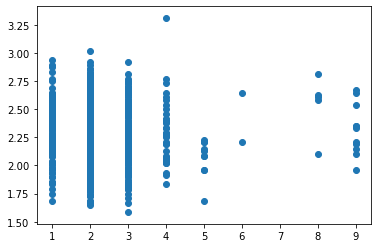

In [6]:
#Home teams vs PTS and PTS-
#g = games[0][(games[0]['MATCHUP'].str.contains('vs.')) & (games[0]['REST_RECENT'] != 0)]
  
g = games[5][(games[5]['MATCHUP'].str.contains('vs.')) & (games[5]['REST_RECENT'] != 0)]
X = pd.DataFrame(np.column_stack([np.ones(len(g)),g['REST_RECENT']]))

y = g['PTS'].tolist()

slr=sm.OLS(y, X).fit()
slr.summary()

plt.scatter(g['REST_RECENT'], g['PTS-'])
#plt.plot(games[4]['REST_RECENT'], np.poly1d(np.polyfit(games[4]['REST_RECENT'], games[4]['PTS'], 1))(np.unique(games[4]['REST_RECENT'])))

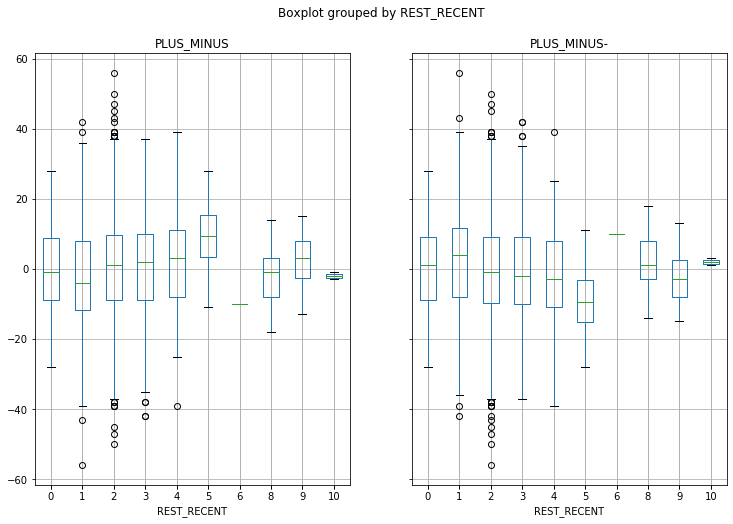

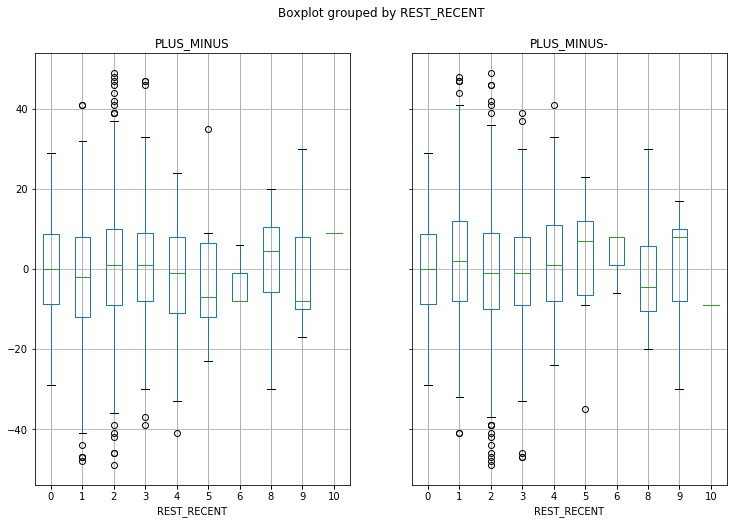

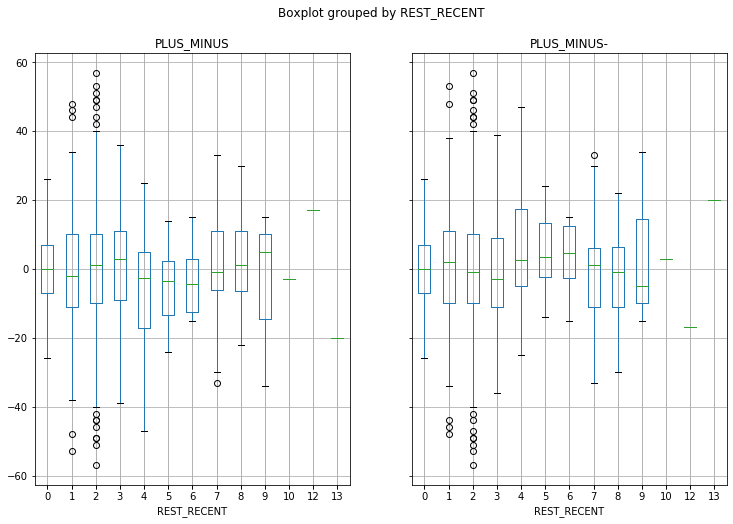

In [7]:
for i in range(4, len(games)):
    games[i].boxplot(column=['PLUS_MINUS', 'PLUS_MINUS-'], by='REST_RECENT', figsize=(12,8))

In [8]:
for i in range(4, len(games)):
    print(str(2014+i) + ":")
    print(games[i].groupby('REST_RECENT')['REST_RECENT'].count())

2018:
REST_RECENT
0       30
1      398
2     1490
3      445
4       58
5        4
6        1
8       19
9       11
10       2
Name: REST_RECENT, dtype: int64
2019:
REST_RECENT
0       30
1      293
2     1242
3      276
4       53
5       15
6        3
8       12
9       17
10       1
Name: REST_RECENT, dtype: int64
2020:
REST_RECENT
0       30
1      455
2     1377
3      229
4       20
5        8
6        6
7       17
8       11
9        3
10       1
12       1
13       1
Name: REST_RECENT, dtype: int64


In [9]:
for i in range(4,len(games)):
    g = games[i][(games[i]['REST_RECENT'] != 0) & (games[i]['REST_RECENT'] < 5)]
    X = pd.DataFrame(np.column_stack([np.ones(len(g)),g['REST_RECENT']]))

    y = g['PLUS_MINUS'].tolist()

    slr=sm.OLS(y, X).fit()
    print(slr.summary())
    
    #y = g['PTS-'].tolist()
    #slr=sm.OLS(y, X).fit()
    #print(slr.summary())


    #plt.scatter(g['REST_RECENT'], g['PTS-'])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     9.125
Date:                Wed, 08 Dec 2021   Prob (F-statistic):            0.00255
Time:                        14:57:46   Log-Likelihood:                -9819.6
No. Observations:                2391   AIC:                         1.964e+04
Df Residuals:                    2389   BIC:                         1.965e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -2.8179      0.980     -2.876      0.0

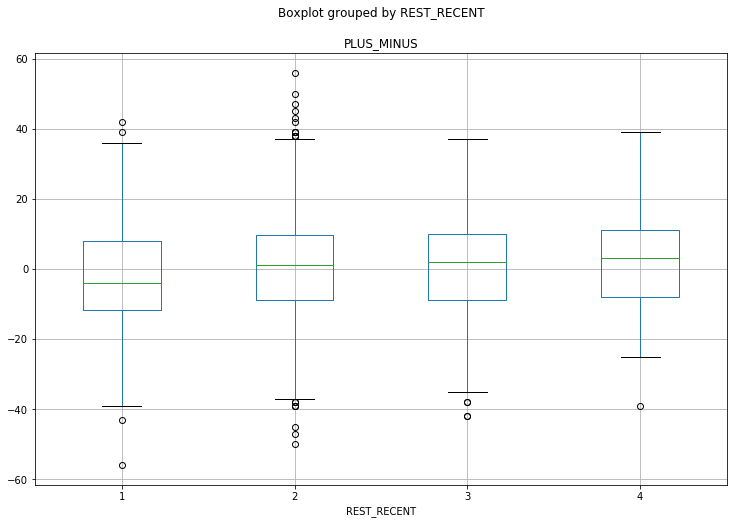

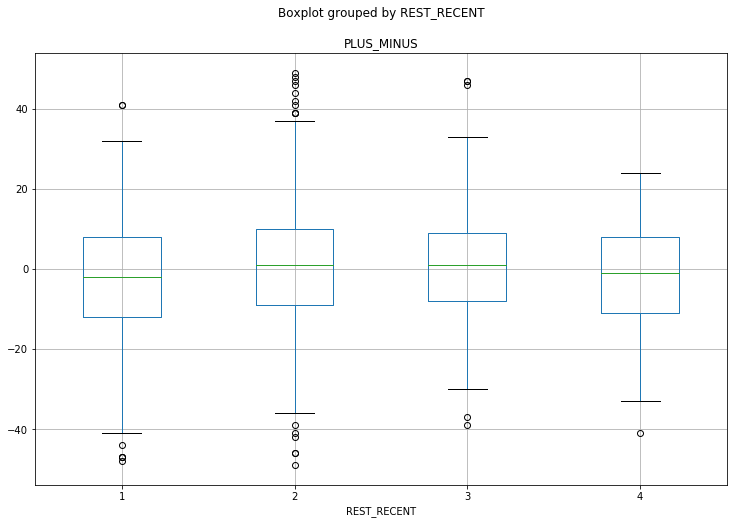

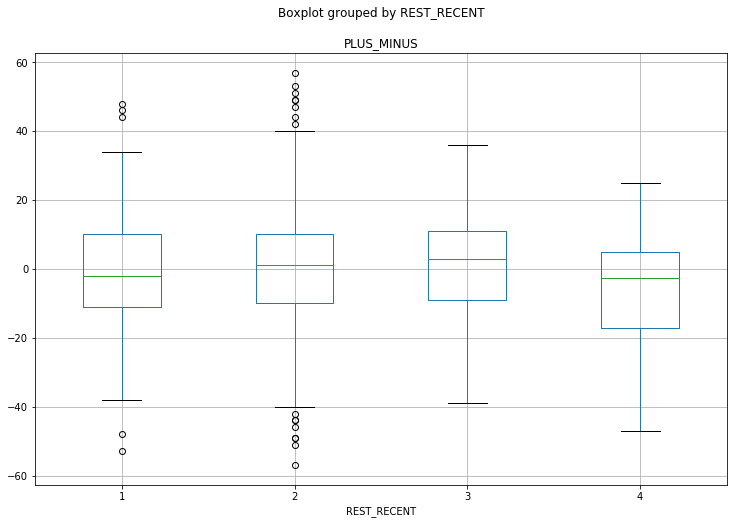

In [10]:

for i in range(4, len(games)):
    games[i][(games[i]['REST_RECENT'] != 0) & (games[i]['REST_RECENT'] < 5)].boxplot(column=['PLUS_MINUS'], by='REST_RECENT', figsize=(12,8))

In [11]:
for i in range(len(games)):
    games[i]['REST_RECENT_DIFF']=games[i]['REST_RECENT']-games[i]['REST_RECENT-']
    games[i]['REST_14_DIFF']=games[i]['REST_14']-games[i]['REST_14-']
    games[i]['REST_28_DIFF']=games[i]['REST_28']-games[i]['REST_28-']

In [12]:
for i in range(4, len(games)):
    print(str(2014+i) + ":")
    print(games[i].groupby('REST_RECENT_DIFF')['REST_RECENT_DIFF'].count())

2018:
REST_RECENT_DIFF
-6       2
-3      13
-2     115
-1     493
 0    1212
 1     493
 2     115
 3      13
 6       2
Name: REST_RECENT_DIFF, dtype: int64
2019:
REST_RECENT_DIFF
-8       1
-7       1
-5       1
-4       5
-3      19
-2      75
-1     354
 0    1030
 1     354
 2      75
 3      19
 4       5
 5       1
 7       1
 8       1
Name: REST_RECENT_DIFF, dtype: int64
2020:
REST_RECENT_DIFF
-11       2
-8        3
-6        4
-5        2
-4        1
-3       11
-2       57
-1      425
 0     1148
 1      426
 2       57
 3       11
 4        1
 5        2
 6        4
 8        3
 11       2
Name: REST_RECENT_DIFF, dtype: int64


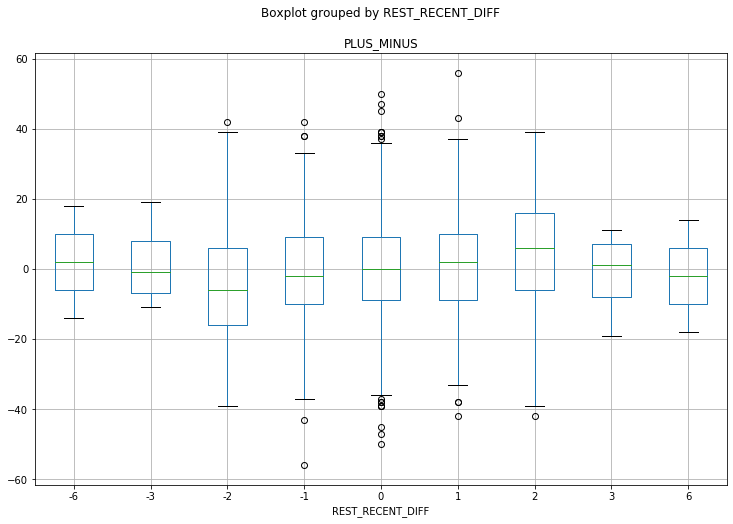

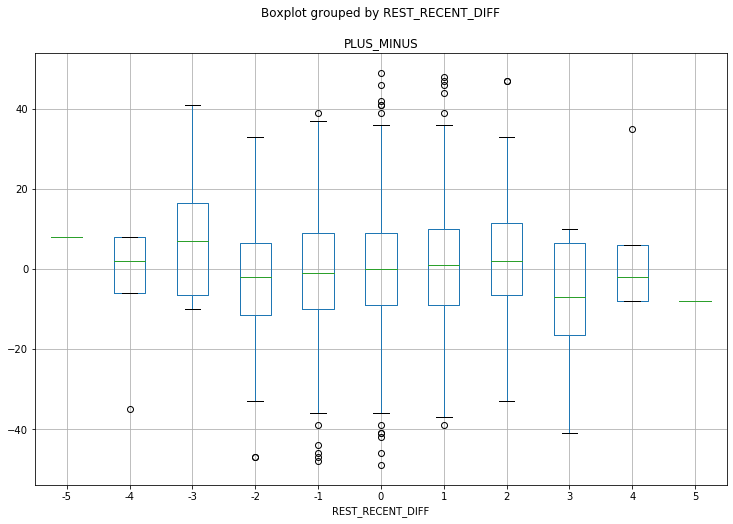

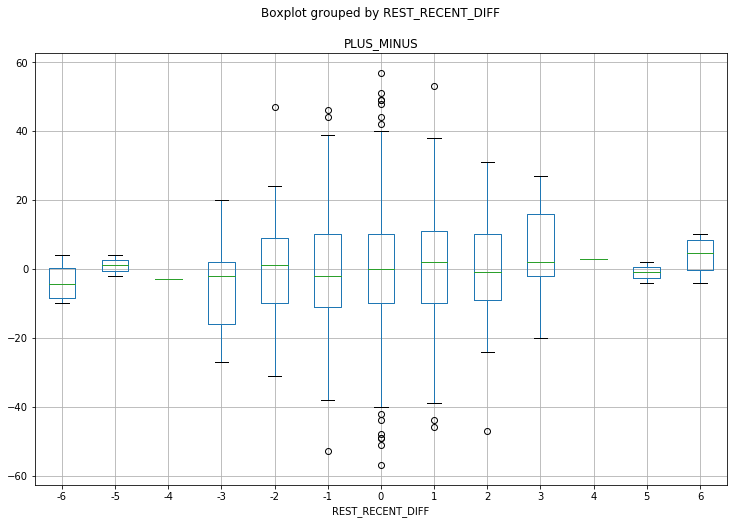

In [13]:

for i in range(4, len(games)):
    games[i][(games[i]['REST_RECENT_DIFF'] > -7) & (games[i]['REST_RECENT_DIFF'] < 7)].boxplot(column=['PLUS_MINUS'], by='REST_RECENT_DIFF', figsize=(12,8))

In [14]:
for i in range(4,len(games)):
    g = games[i][(games[i]['REST_RECENT_DIFF'] > -7) & (games[i]['REST_RECENT_DIFF'] < 7)]
    X = pd.DataFrame(np.column_stack([np.ones(len(g)),g['REST_RECENT_DIFF']]))

    y = g['PLUS_MINUS'].tolist()

    slr=sm.OLS(y, X).fit()
    print(slr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     19.71
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           9.40e-06
Time:                        14:57:48   Log-Likelihood:                -10078.
No. Observations:                2458   AIC:                         2.016e+04
Df Residuals:                    2456   BIC:                         2.017e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           1.665e-16      0.295   5.65e-16      1.0

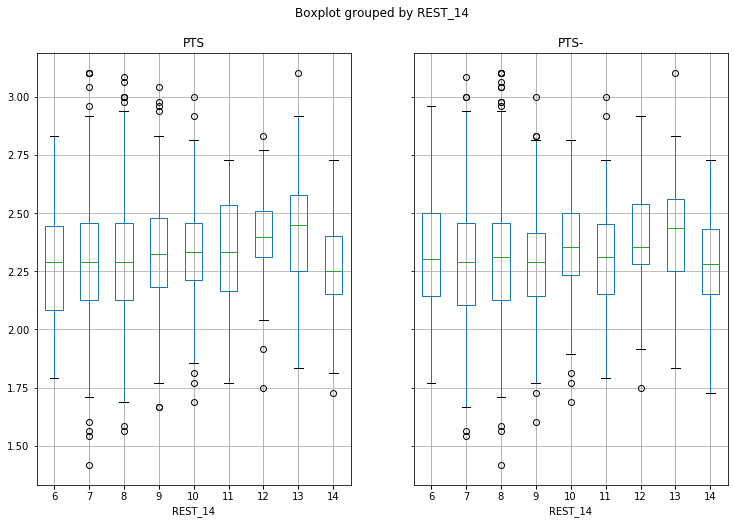

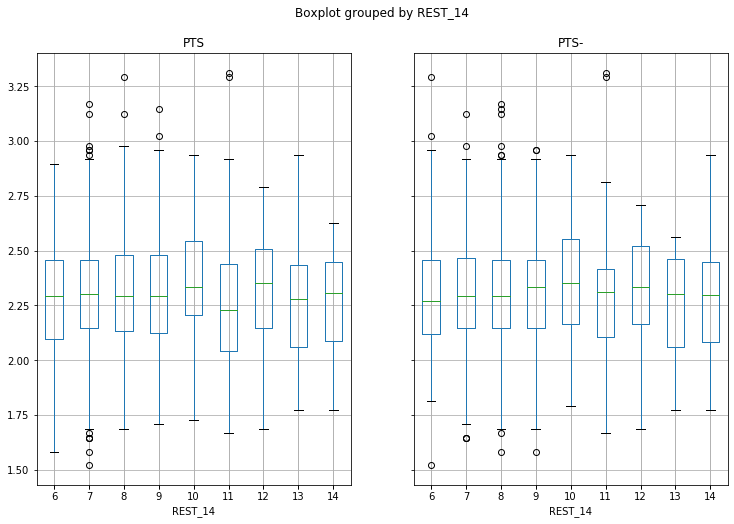

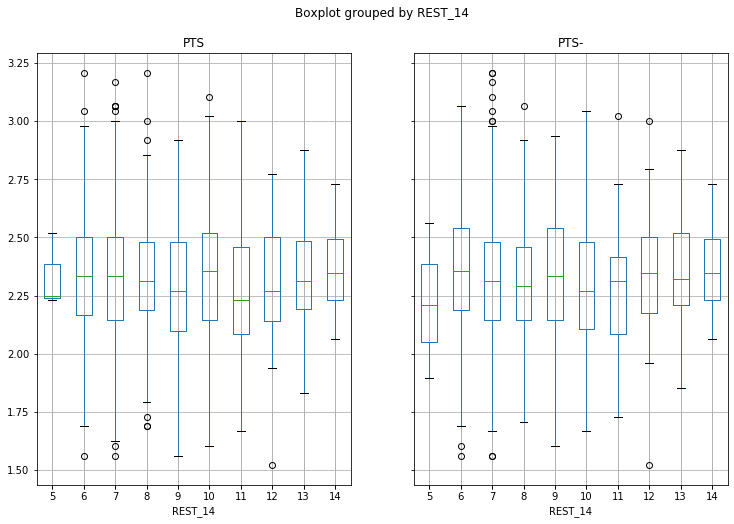

In [15]:
for i in range(4, len(games)):
    games[i].boxplot(column=['PTS', 'PTS-'], by='REST_14', figsize=(12,8))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.100
Date:                Wed, 08 Dec 2021   Prob (F-statistic):              0.147
Time:                        14:57:50   Log-Likelihood:                -26958.
No. Observations:                6559   AIC:                         5.392e+04
Df Residuals:                    6557   BIC:                         5.393e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0012      0.182     -0.007      0.9

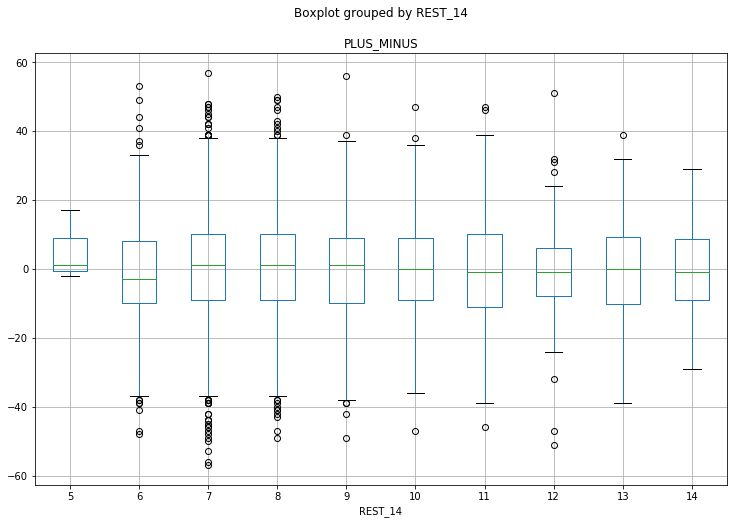

In [16]:

#for i in range(4,len(games)):
g = pd.concat([games[4],games[5],games[6]])#[(games[i]['REST_14_DIFF'] > -7) & (games[i]['REST_14_DIFF'] < 7)]
X = pd.DataFrame(np.column_stack([np.ones(len(g)),g['REST_14_DIFF']]))

y = (g['PLUS_MINUS']).tolist()

slr=sm.OLS(y, X).fit()
print(slr.summary())
g.boxplot(column=['PLUS_MINUS'], by='REST_14', figsize=(12,8))

In [17]:
for i in range(4, len(games)):
    print(str(2014+i) + ":")
    print(games[i].groupby('REST_14_DIFF')['REST_14_DIFF'].count())

2018:
REST_14_DIFF
-4      2
-3     21
-2    103
-1    605
 0    996
 1    605
 2    103
 3     21
 4      2
Name: REST_14_DIFF, dtype: int64
2019:
REST_14_DIFF
-4      1
-3     13
-2    102
-1    440
 0    830
 1    440
 2    102
 3     13
 4      1
Name: REST_14_DIFF, dtype: int64
2020:
REST_14_DIFF
-6      3
-5      6
-4      5
-3     16
-2     97
-1    504
 0    897
 1    504
 2     97
 3     16
 4      5
 5      6
 6      3
Name: REST_14_DIFF, dtype: int64


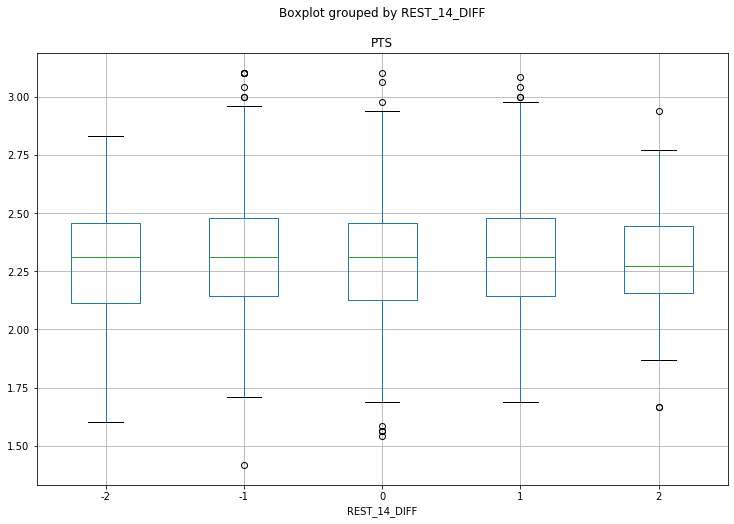

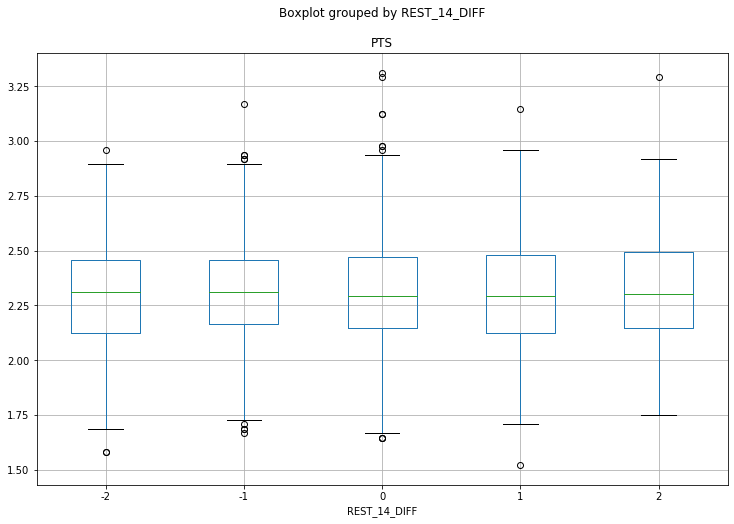

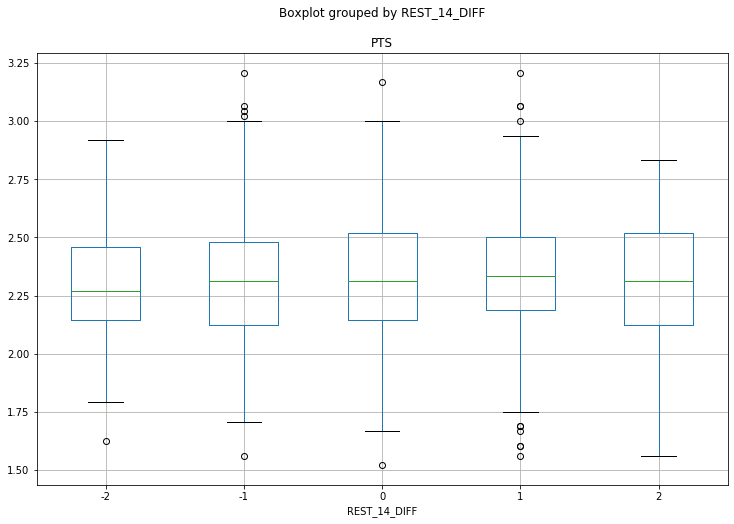

In [18]:
for i in range(4, len(games)):
    games[i][(games[i]['REST_14_DIFF'] > -3) & (games[i]['REST_14_DIFF'] < 3)].boxplot(column=['PTS'], by='REST_14_DIFF', figsize=(12,8))

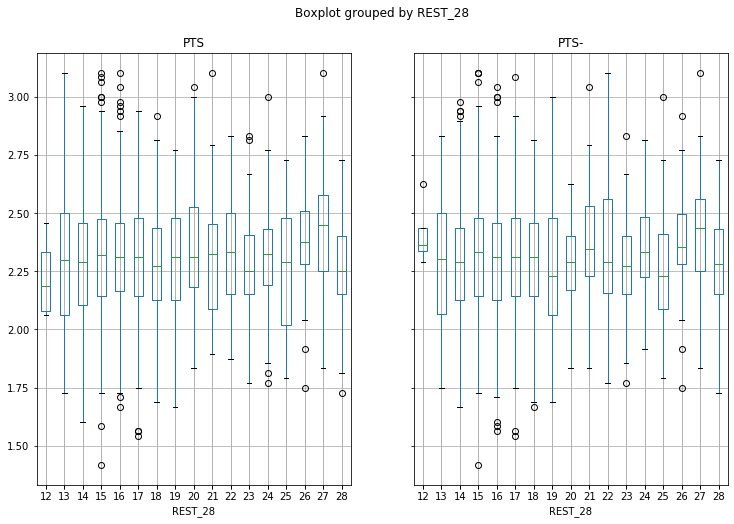

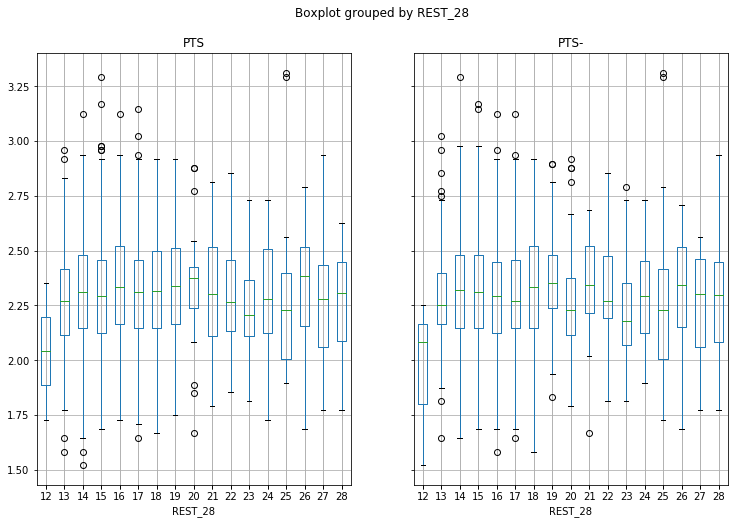

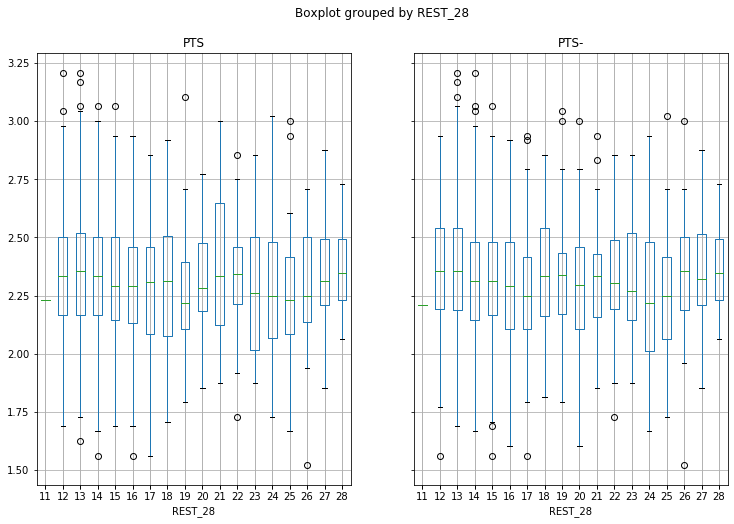

In [19]:
for i in range(4, len(games)):
    games[i].boxplot(column=['PTS', 'PTS-'], by='REST_28', figsize=(12,8))

In [20]:
for i in range(4, len(games)):
    print(str(2014+i) + ":")
    print(games[i].groupby('REST_28_DIFF')['REST_28_DIFF'].count())

2018:
REST_28_DIFF
-4     15
-3     44
-2    198
-1    583
 0    778
 1    583
 2    198
 3     44
 4     15
Name: REST_28_DIFF, dtype: int64
2019:
REST_28_DIFF
-5      1
-4      4
-3     39
-2    155
-1    408
 0    728
 1    408
 2    155
 3     39
 4      4
 5      1
Name: REST_28_DIFF, dtype: int64
2020:
REST_28_DIFF
-6      5
-5      7
-4     15
-3     45
-2    175
-1    483
 0    699
 1    483
 2    175
 3     45
 4     15
 5      7
 6      5
Name: REST_28_DIFF, dtype: int64


In [21]:
#for i in range(4,len(games)):
#g = games[i][(games[i]['REST_28_DIFF'] > -4) & (games[i]['REST_28_DIFF'] < 4)]
g = pd.concat([games[4],games[5],games[6]])
g = g[(g['REST_28_DIFF'] > -4) & (g['REST_28_DIFF'] < 4)]
X = pd.DataFrame(np.column_stack([np.ones(len(g)),g['REST_28_DIFF']]))

y = g['PLUS_MINUS'].tolist()

slr=sm.OLS(y, X).fit()
print(slr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.966
Date:                Wed, 08 Dec 2021   Prob (F-statistic):             0.0851
Time:                        14:57:54   Log-Likelihood:                -26564.
No. Observations:                6465   AIC:                         5.313e+04
Df Residuals:                    6463   BIC:                         5.314e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0012      0.183     -0.007      0.9

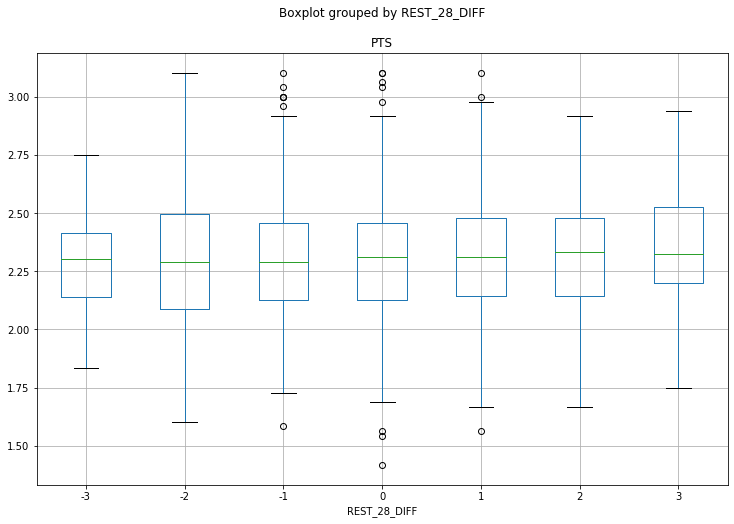

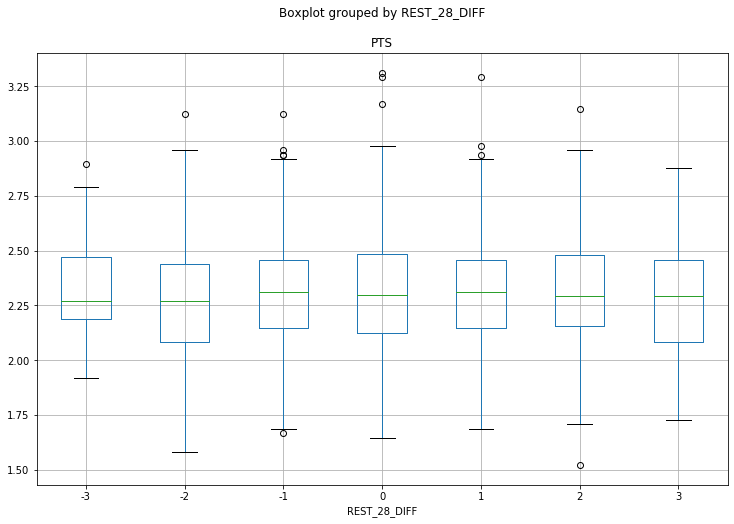

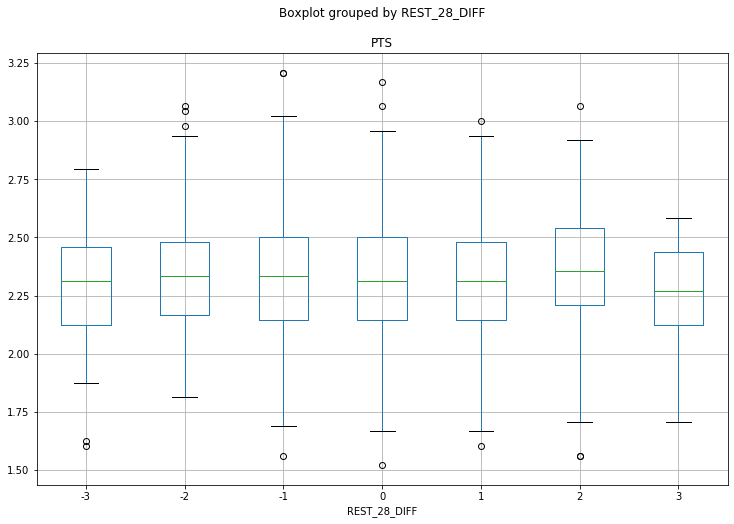

In [22]:
for i in range(4, len(games)):
    games[i][(games[i]['REST_28_DIFF'] > -4) & (games[i]['REST_28_DIFF'] < 4)].boxplot(column=['PTS'], by='REST_28_DIFF', figsize=(12,8))

In [23]:
g = pd.concat([games[4],games[5],games[6]])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B9C80AFC08>,
      dtype=object)

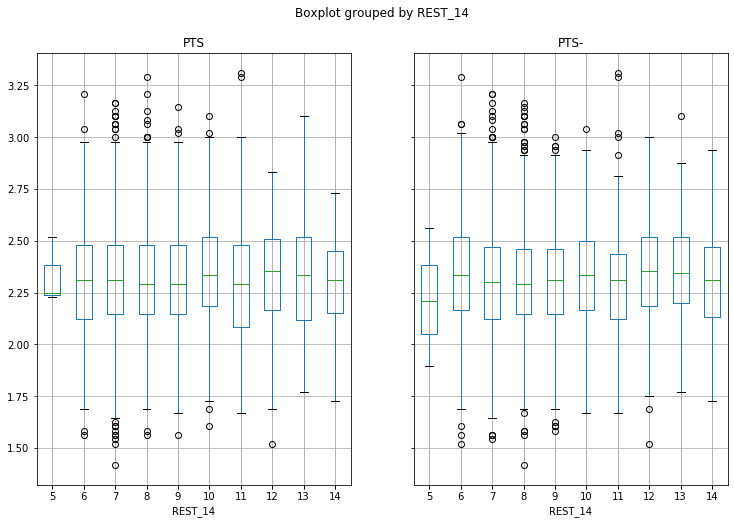

In [24]:
g.boxplot(column=['PTS', 'PTS-'], by='REST_14', figsize=(12,8))

In [25]:
def getTravellingDays(team, opp, gameDate, year):
    teamGames = games[year][games[year]['TEAM_ABBREVIATION']==team].copy()
    oppGames = games[year][games[year]['TEAM_ABBREVIATION']==opp].copy()
    teamGames['GAME_DATE'] = pd.to_datetime(teamGames['GAME_DATE'])
    oppGames['GAME_DATE'] = pd.to_datetime(oppGames['GAME_DATE'])
    
    past14 = (pd.to_datetime(gameDate) - pd.to_timedelta(14, unit='days')).round(freq='H')
    past28 = (pd.to_datetime(gameDate) - pd.to_timedelta(28, unit='days')).round(freq='H')
    
    team14 = teamGames[(teamGames['GAME_DATE'] < gameDate) & (teamGames['GAME_DATE'] >= str(past14))]
    team28 = teamGames[(teamGames['GAME_DATE'] < gameDate) & (teamGames['GAME_DATE'] >= str(past28))]
    opp14 = oppGames[(oppGames['GAME_DATE'] < gameDate) & (oppGames['GAME_DATE'] >= str(past14))]
    opp28 = oppGames[(oppGames['GAME_DATE'] < gameDate) & (oppGames['GAME_DATE'] >= str(past28))]
    
    team14['TRAV'] = (team14['MATCHUP'].str.contains('vs.')*1).diff()
    team14['TRAV_DAYS'] = team14['GAME_DATE'].diff().dt.days
    team14['TRAV_DAYS'][(team14['MATCHUP'].str.contains('vs.') & (team14['TRAV'] == 0))] = 0
    team28['TRAV'] = (team28['MATCHUP'].str.contains('vs.')*1).diff()
    team28['TRAV_DAYS'] = team28['GAME_DATE'].diff().dt.days
    team28['TRAV_DAYS'][(team28['MATCHUP'].str.contains('vs.') & (team28['TRAV'] == 0))] = 0
    
    opp14['TRAV'] = (opp14['MATCHUP'].str.contains('vs.')*1).diff()
    opp14['TRAV_DAYS'] = opp14['GAME_DATE'].diff().dt.days
    opp14['TRAV_DAYS'][(opp14['MATCHUP'].str.contains('vs.') & (opp14['TRAV'] == 0))] = 0
    opp28['TRAV'] = (opp28['MATCHUP'].str.contains('vs.')*1).diff()
    opp28['TRAV_DAYS'] = opp28['GAME_DATE'].diff().dt.days
    opp28['TRAV_DAYS'][(opp28['MATCHUP'].str.contains('vs.') & (opp28['TRAV'] == 0))] = 0
    #team14['TRAV_DAYS'] = [x['TRAV_DAYS'] if (((x['MATCHUP'].str.contains('@')) and (x['TRAV_DAYS'] == 0)) or (x['TRAV_DAYS']  != 0)) else 0 for x in team14]
    #team14['TRAV_DAYS'] = team14['TRAV_DAYS'].apply()
    #print(team14['TRAV_DAYS'])
    #print(str(teamSince) + '    ' + str(oppSince))
    #toreturn = pd.Series([len(team14['TRAV_DAYS'][team14['TRAV_DAYS'] > 0]), len(team28['TRAV_DAYS'][team28['TRAV_DAYS'] > 0]), len(opp14['TRAV_DAYS'][opp14['TRAV_DAYS'] > 0]), len(opp28['TRAV_DAYS'][opp28['TRAV_DAYS'] > 0])])
    toreturn = pd.Series([team14['TRAV_DAYS'].sum(), team28['TRAV_DAYS'].sum(), opp14['TRAV_DAYS'].sum(), opp28['TRAV_DAYS'].sum()])

    print(toreturn)
    return toreturn

In [26]:
for i in range(0,len(games)):
    games[i][['TRAV_DAYS_14', 'TRAV_DAYS_28', 'TRAV_DAYS_14-', 'TRAV_DAYS_28-']] = games[i].apply(lambda x: getTravellingDays(x['TEAM_ABBREVIATION'], x['TEAM_ABBREVIATION-'], x['GAME_DATE'], i), axis = 1)

C:\Users\Kyle\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Kyle\anaconda3\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Kyle\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Kyle\anaconda3\lib\site-packages\ipykernel_launcher.py:24:

0    0
1    0
2    0
3    0
dtype: int64
0    0
1    0
2    0
3    0
dtype: int64
0    0
1    0
2    0
3    0
dtype: int64
0    0
1    0
2    0
3    0
dtype: int64
0    0
1    0
2    0
3    0
dtype: int64
0    0
1    0
2    0
3    0
dtype: int64
0    0
1    0
2    0
3    0
dtype: int64
0    0
1    0
2    0
3    0
dtype: int64
0    0
1    0
2    0
3    0
dtype: int64
0    0
1    0
2    0
3    0
dtype: int64
0    0
1    0
2    0
3    0
dtype: int64
0    0
1    0
2    0
3    0
dtype: int64
0    0
1    0
2    0
3    0
dtype: int64
0    0
1    0
2    0
3    0
dtype: int64
0    0
1    0
2    0
3    0
dtype: int64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0
1    0
2    0
3    0
dtype: int64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0
1    0
2    0
3    0
dtype: int64


C:\Users\Kyle\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\Kyle\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\Kyle\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

0    0
1    0
2    0
3    0
dtype: int64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0
1    0
2    0
3    0
dtype: int64
0    0
1    0
2    0
3    0
dtype: int64
0    0
1    0
2    0
3    0
dtype: int64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0
1    0
2    0
3    0
dtype: int64
0    0
1    0
2    0
3    0
dtype: int64
0    0
1    0
2    0
3    0
dtype: int64
0    0
1    0
2    0
3    0
dtype: int64
0    0
1    0
2    0
3    0
dtype: int64
0    0
1    0
2    0
3    0
dtype: int64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3 

0    7.0
1    7.0
2    3.0
3    3.0
dtype: float64
0    9.0
1    9.0
2    7.0
3    7.0
dtype: float64
0     5.0
1     5.0
2    10.0
3    10.0
dtype: float64
0    5.0
1    5.0
2    8.0
3    8.0
dtype: float64
0    3.0
1    3.0
2    9.0
3    9.0
dtype: float64
0    4.0
1    4.0
2    7.0
3    7.0
dtype: float64
0    9.0
1    9.0
2    3.0
3    3.0
dtype: float64
0    10.0
1    10.0
2     3.0
3     3.0
dtype: float64
0    8.0
1    8.0
2    7.0
3    7.0
dtype: float64
0    8.0
1    8.0
2    9.0
3    9.0
dtype: float64
0    11.0
1    11.0
2     8.0
3     8.0
dtype: float64
0     8.0
1     8.0
2    11.0
3    11.0
dtype: float64
0     3.0
1     3.0
2    10.0
3    10.0
dtype: float64
0    9.0
1    9.0
2    8.0
3    8.0
dtype: float64
0    7.0
1    7.0
2    8.0
3    8.0
dtype: float64
0     8.0
1     8.0
2    10.0
3    10.0
dtype: float64
0    10.0
1    10.0
2     8.0
3     8.0
dtype: float64
0    10.0
1    10.0
2     7.0
3     7.0
dtype: float64
0    10.0
1    10.0
2     9.0
3     9.0
dtype: flo

0     2.0
1    10.0
2     9.0
3    17.0
dtype: float64
0    12.0
1    16.0
2    12.0
3    20.0
dtype: float64
0     9.0
1    18.0
2     8.0
3    11.0
dtype: float64
0    12.0
1    15.0
2     5.0
3    10.0
dtype: float64
0     6.0
1    15.0
2     7.0
3    14.0
dtype: float64
0    12.0
1    21.0
2     8.0
3    15.0
dtype: float64
0     5.0
1    11.0
2    11.0
3    20.0
dtype: float64
0    12.0
1    19.0
2    11.0
3    22.0
dtype: float64
0    12.0
1    20.0
2    12.0
3    16.0
dtype: float64
0     8.0
1    16.0
2     5.0
3    14.0
dtype: float64
0    11.0
1    20.0
2     5.0
3    11.0
dtype: float64
0    11.0
1    18.0
2     4.0
3    14.0
dtype: float64
0     7.0
1    14.0
2     6.0
3    15.0
dtype: float64
0     8.0
1    15.0
2    12.0
3    21.0
dtype: float64
0     9.0
1    18.0
2     0.0
3     9.0
dtype: float64
0     0.0
1     9.0
2     9.0
3    18.0
dtype: float64
0     8.0
1    15.0
2     6.0
3    16.0
dtype: float64
0    11.0
1    22.0
2    12.0
3    19.0
dtype: float64
0     8.0


0     7.0
1    15.0
2    12.0
3    22.0
dtype: float64
0     8.0
1    16.0
2    11.0
3    24.0
dtype: float64
0     7.0
1    19.0
2     5.0
3    15.0
dtype: float64
0     9.0
1    23.0
2     9.0
3    22.0
dtype: float64
0     4.0
1    18.0
2    12.0
3    17.0
dtype: float64
0    11.0
1    24.0
2     8.0
3    16.0
dtype: float64
0    12.0
1    17.0
2     4.0
3    18.0
dtype: float64
0     9.0
1    22.0
2     9.0
3    23.0
dtype: float64
0     5.0
1    15.0
2     7.0
3    19.0
dtype: float64
0    11.0
1    23.0
2     3.0
3    13.0
dtype: float64
0     5.0
1    16.0
2     4.0
3    11.0
dtype: float64
0    10.0
1    20.0
2     9.0
3    12.0
dtype: float64
0     3.0
1    14.0
2     8.0
3    19.0
dtype: float64
0    11.0
1    17.0
2     7.0
3    20.0
dtype: float64
0    10.0
1    24.0
2     8.0
3    15.0
dtype: float64
0    10.0
1    24.0
2     7.0
3    14.0
dtype: float64
0     9.0
1    21.0
2    11.0
3    26.0
dtype: float64
0    11.0
1    26.0
2     9.0
3    21.0
dtype: float64
0     9.0


0     3.0
1    13.0
2    12.0
3    17.0
dtype: float64
0    11.0
1    16.0
2     7.0
3    11.0
dtype: float64
0    12.0
1    17.0
2     3.0
3    13.0
dtype: float64
0     7.0
1    11.0
2    11.0
3    16.0
dtype: float64
0     4.0
1    17.0
2    10.0
3    24.0
dtype: float64
0     8.0
1    21.0
2    10.0
3    17.0
dtype: float64
0     8.0
1    15.0
2    11.0
3    16.0
dtype: float64
0     5.0
1    13.0
2     5.0
3    16.0
dtype: float64
0     8.0
1    15.0
2    10.0
3    21.0
dtype: float64
0    12.0
1    26.0
2     9.0
3    13.0
dtype: float64
0    12.0
1    20.0
2     7.0
3    14.0
dtype: float64
0     5.0
1    18.0
2     9.0
3    17.0
dtype: float64
0     6.0
1    12.0
2     8.0
3    20.0
dtype: float64
0     9.0
1    23.0
2     4.0
3    14.0
dtype: float64
0     8.0
1    17.0
2    12.0
3    26.0
dtype: float64
0    12.0
1    26.0
2     8.0
3    17.0
dtype: float64
0     8.0
1    20.0
2     6.0
3    12.0
dtype: float64
0     9.0
1    13.0
2    12.0
3    26.0
dtype: float64
0     5.0


0    10.0
1    19.0
2     9.0
3    21.0
dtype: float64
0     7.0
1    19.0
2     7.0
3    13.0
dtype: float64
0    10.0
1    17.0
2     3.0
3     8.0
dtype: float64
0     8.0
1    13.0
2    11.0
3    18.0
dtype: float64
0    11.0
1    20.0
2     9.0
3    20.0
dtype: float64
0     3.0
1    12.0
2     9.0
3    25.0
dtype: float64
0     8.0
1    22.0
2     5.0
3    15.0
dtype: float64
0    10.0
1    13.0
2    10.0
3    22.0
dtype: float64
0     9.0
1    21.0
2     8.0
3    14.0
dtype: float64
0     9.0
1    21.0
2    10.0
3    19.0
dtype: float64
0    11.0
1    22.0
2     7.0
3    19.0
dtype: float64
0    10.0
1    17.0
2     8.0
3    19.0
dtype: float64
0     3.0
1     8.0
2    10.0
3    21.0
dtype: float64
0     7.0
1    18.0
2    10.0
3    17.0
dtype: float64
0     9.0
1    22.0
2     8.0
3    20.0
dtype: float64
0     6.0
1    19.0
2    10.0
3    15.0
dtype: float64
0    10.0
1    21.0
2     3.0
3     8.0
dtype: float64
0     9.0
1    18.0
2     9.0
3    17.0
dtype: float64
0    10.0


0     8.0
1    15.0
2     8.0
3    22.0
dtype: float64
0    11.0
1    19.0
2     9.0
3    12.0
dtype: float64
0    10.0
1    16.0
2     6.0
3    15.0
dtype: float64
0     6.0
1    15.0
2    10.0
3    16.0
dtype: float64
0     9.0
1    12.0
2    11.0
3    19.0
dtype: float64
0     5.0
1    17.0
2    11.0
3    20.0
dtype: float64
0     9.0
1    20.0
2    11.0
3    26.0
dtype: float64
0     7.0
1    18.0
2     4.0
3    18.0
dtype: float64
0    11.0
1    20.0
2     5.0
3    17.0
dtype: float64
0     4.0
1    14.0
2    12.0
3    22.0
dtype: float64
0     7.0
1    14.0
2    11.0
3    23.0
dtype: float64
0    11.0
1    19.0
2    11.0
3    24.0
dtype: float64
0     7.0
1    20.0
2    11.0
3    22.0
dtype: float64
0     8.0
1    17.0
2     8.0
3    18.0
dtype: float64
0     8.0
1    18.0
2     8.0
3    17.0
dtype: float64
0    11.0
1    23.0
2     7.0
3    14.0
dtype: float64
0    11.0
1    19.0
2    11.0
3    23.0
dtype: float64
0     7.0
1    20.0
2    11.0
3    21.0
dtype: float64
0    11.0


0     0.0
1     9.0
2    10.0
3    24.0
dtype: float64
0    10.0
1    13.0
2     0.0
3     8.0
dtype: float64
0    12.0
1    17.0
2     9.0
3    16.0
dtype: float64
0     9.0
1    20.0
2    10.0
3    22.0
dtype: float64
0    10.0
1    24.0
2    10.0
3    20.0
dtype: float64
0     0.0
1     8.0
2    10.0
3    13.0
dtype: float64
0    10.0
1    24.0
2     0.0
3     9.0
dtype: float64
0     9.0
1    16.0
2    12.0
3    17.0
dtype: float64
0    10.0
1    22.0
2     9.0
3    20.0
dtype: float64
0     8.0
1    15.0
2     4.0
3    16.0
dtype: float64
0     7.0
1    21.0
2     8.0
3    22.0
dtype: float64
0    10.0
1    18.0
2     8.0
3    17.0
dtype: float64
0    10.0
1    23.0
2     9.0
3    22.0
dtype: float64
0     9.0
1    22.0
2    10.0
3    23.0
dtype: float64
0     8.0
1    22.0
2     7.0
3    21.0
dtype: float64
0     4.0
1    16.0
2     8.0
3    15.0
dtype: float64
0     8.0
1    17.0
2    10.0
3    18.0
dtype: float64
0     8.0
1    22.0
2     0.0
3     7.0
dtype: float64
0    10.0


0    12.0
1    25.0
2     8.0
3    16.0
dtype: float64
0    12.0
1    24.0
2     9.0
3    19.0
dtype: float64
0    12.0
1    20.0
2    12.0
3    18.0
dtype: float64
0     8.0
1    18.0
2    10.0
3    12.0
dtype: float64
0    10.0
1    18.0
2     8.0
3     8.0
dtype: float64
0     9.0
1    19.0
2     6.0
3    20.0
dtype: float64
0     6.0
1    18.0
2    11.0
3    11.0
dtype: float64
0     9.0
1    15.0
2     6.0
3    11.0
dtype: float64
0    11.0
1    11.0
2     6.0
3    18.0
dtype: float64
0     6.0
1    11.0
2     9.0
3    15.0
dtype: float64
0     8.0
1     8.0
2    10.0
3    18.0
dtype: float64
0     6.0
1    20.0
2     9.0
3    19.0
dtype: float64
0     9.0
1    14.0
2    11.0
3    22.0
dtype: float64
0     4.0
1    15.0
2    10.0
3    10.0
dtype: float64
0     3.0
1    15.0
2     9.0
3    21.0
dtype: float64
0     7.0
1    20.0
2     4.0
3    16.0
dtype: float64
0     9.0
1    21.0
2     3.0
3    15.0
dtype: float64
0    11.0
1    16.0
2     6.0
3    18.0
dtype: float64
0    11.0


0    11.0
1    21.0
2     3.0
3    18.0
dtype: float64
0     5.0
1    12.0
2    10.0
3    16.0
dtype: float64
0     2.0
1    16.0
2     9.0
3    18.0
dtype: float64
0     7.0
1    21.0
2     7.0
3    18.0
dtype: float64
0    10.0
1    23.0
2     6.0
3    15.0
dtype: float64
0     7.0
1    23.0
2    11.0
3    21.0
dtype: float64
0     6.0
1    15.0
2    10.0
3    23.0
dtype: float64
0    11.0
1    21.0
2     7.0
3    23.0
dtype: float64
0    10.0
1    22.0
2    10.0
3    19.0
dtype: float64
0    12.0
1    26.0
2    10.0
3    22.0
dtype: float64
0     9.0
1    19.0
2     9.0
3    17.0
dtype: float64
0    11.0
1    26.0
2     8.0
3    18.0
dtype: float64
0     1.0
1     8.0
2     3.0
3    15.0
dtype: float64
0    12.0
1    13.0
2     7.0
3    16.0
dtype: float64
0     4.0
1    18.0
2     8.0
3    17.0
dtype: float64
0     6.0
1    20.0
2     0.0
3    14.0
dtype: float64
0     7.0
1    16.0
2    12.0
3    13.0
dtype: float64
0     8.0
1    18.0
2    11.0
3    26.0
dtype: float64
0     8.0


dtype: float64
0    10.0
1    24.0
2    10.0
3    18.0
dtype: float64
0    12.0
1    23.0
2     9.0
3    19.0
dtype: float64
0    10.0
1    20.0
2    10.0
3    18.0
dtype: float64
0     7.0
1    18.0
2    10.0
3    23.0
dtype: float64
0     9.0
1    14.0
2    11.0
3    22.0
dtype: float64
0    10.0
1    23.0
2     8.0
3    14.0
dtype: float64
0     3.0
1    14.0
2     3.0
3    14.0
dtype: float64
0     8.0
1    22.0
2     3.0
3    10.0
dtype: float64
0     5.0
1    15.0
2     8.0
3    20.0
dtype: float64
0    11.0
1    22.0
2     9.0
3    14.0
dtype: float64
0     3.0
1    10.0
2     8.0
3    22.0
dtype: float64
0    10.0
1    18.0
2    10.0
3    20.0
dtype: float64
0     9.0
1    19.0
2    12.0
3    23.0
dtype: float64
0    12.0
1    22.0
2     9.0
3    21.0
dtype: float64
0     7.0
1    12.0
2     6.0
3    18.0
dtype: float64
0    10.0
1    18.0
2    10.0
3    24.0
dtype: float64
0     8.0
1    20.0
2     5.0
3    15.0
dtype: float64
0     8.0
1    14.0
2    10.0
3    23.0
dtype: flo

0     5.0
1    24.0
2     6.0
3    19.0
dtype: float64
0     2.0
1    21.0
2     5.0
3    14.0
dtype: float64
0     5.0
1    13.0
2     5.0
3    21.0
dtype: float64
0     5.0
1    22.0
2     4.0
3    12.0
dtype: float64
0     4.0
1    16.0
2     6.0
3    27.0
dtype: float64
0     5.0
1    23.0
2     0.0
3     9.0
dtype: float64
0     1.0
1    20.0
2     5.0
3    13.0
dtype: float64
0     4.0
1    18.0
2     6.0
3    21.0
dtype: float64
0     0.0
1     6.0
2     3.0
3    20.0
dtype: float64
0     3.0
1    23.0
2     2.0
3    14.0
dtype: float64
0     7.0
1    23.0
2     0.0
3     6.0
dtype: float64
0     7.0
1    18.0
2     5.0
3    22.0
dtype: float64
0     8.0
1    21.0
2     6.0
3    26.0
dtype: float64
0     5.0
1    12.0
2     2.0
3    19.0
dtype: float64
0     5.0
1    23.0
2     5.0
3    24.0
dtype: float64
0     5.0
1    25.0
2     7.0
3    14.0
dtype: float64
0     0.0
1     6.0
2     7.0
3    23.0
dtype: float64
0     7.0
1    25.0
2     2.0
3    17.0
dtype: float64
0     5.0


0    11.0
1    15.0
2    11.0
3    26.0
dtype: float64
0    12.0
1    13.0
2     5.0
3    17.0
dtype: float64
0    13.0
1    15.0
2     5.0
3     8.0
dtype: float64
0     4.0
1    18.0
2     7.0
3    21.0
dtype: float64
0     8.0
1    23.0
2    10.0
3    23.0
dtype: float64
0    10.0
1    23.0
2     8.0
3    23.0
dtype: float64
0     8.0
1    20.0
2     9.0
3    21.0
dtype: float64
0     9.0
1    22.0
2     9.0
3    10.0
dtype: float64
0    11.0
1    24.0
2    10.0
3    19.0
dtype: float64
0     7.0
1    19.0
2     5.0
3    20.0
dtype: float64
0    12.0
1    25.0
2     7.0
3    21.0
dtype: float64
0     9.0
1    10.0
2     9.0
3    22.0
dtype: float64
0     5.0
1    20.0
2     7.0
3    19.0
dtype: float64
0    10.0
1    19.0
2    11.0
3    24.0
dtype: float64
0    11.0
1    20.0
2     9.0
3    21.0
dtype: float64
0     7.0
1    21.0
2    12.0
3    25.0
dtype: float64
0     4.0
1    17.0
2     4.0
3     4.0
dtype: float64
0     4.0
1     4.0
2     4.0
3    17.0
dtype: float64
0     9.0


0    10.0
1    24.0
2    12.0
3    14.0
dtype: float64
0     9.0
1    19.0
2    10.0
3    14.0
dtype: float64
0    10.0
1    20.0
2     3.0
3    15.0
dtype: float64
0     8.0
1    22.0
2     8.0
3    21.0
dtype: float64
0    10.0
1    20.0
2     4.0
3    18.0
dtype: float64
0     9.0
1    21.0
2     4.0
3    12.0
dtype: float64
0     7.0
1    13.0
2     6.0
3    14.0
dtype: float64
0    10.0
1    18.0
2     6.0
3    18.0
dtype: float64
0     6.0
1    13.0
2    12.0
3    26.0
dtype: float64
0     7.0
1    20.0
2    10.0
3    20.0
dtype: float64
0     7.0
1    20.0
2     8.0
3    18.0
dtype: float64
0    12.0
1    21.0
2     3.0
3    16.0
dtype: float64
0     8.0
1    21.0
2     8.0
3    22.0
dtype: float64
0     4.0
1    12.0
2     9.0
3    21.0
dtype: float64
0    10.0
1    14.0
2     9.0
3    19.0
dtype: float64
0    12.0
1    26.0
2     6.0
3    13.0
dtype: float64
0     6.0
1    18.0
2    10.0
3    18.0
dtype: float64
0    12.0
1    14.0
2    10.0
3    24.0
dtype: float64
0     4.0


0     3.0
1    10.0
2     7.0
3    14.0
dtype: float64
0     8.0
1    19.0
2    12.0
3    20.0
dtype: float64
0     8.0
1    12.0
2     7.0
3    15.0
dtype: float64
0    11.0
1    24.0
2     8.0
3    22.0
dtype: float64
0     7.0
1    15.0
2    10.0
3    23.0
dtype: float64
0     8.0
1    22.0
2    11.0
3    24.0
dtype: float64
0     8.0
1    20.0
2     9.0
3    21.0
dtype: float64
0    13.0
1    24.0
2    12.0
3    21.0
dtype: float64
0     3.0
1    10.0
2    12.0
3    22.0
dtype: float64
0     3.0
1    16.0
2    11.0
3    22.0
dtype: float64
0    10.0
1    16.0
2    11.0
3    17.0
dtype: float64
0     5.0
1    15.0
2    12.0
3    22.0
dtype: float64
0    12.0
1    22.0
2     3.0
3    10.0
dtype: float64
0    11.0
1    22.0
2     3.0
3    16.0
dtype: float64
0    12.0
1    21.0
2    13.0
3    24.0
dtype: float64
0    11.0
1    17.0
2    10.0
3    16.0
dtype: float64
0     9.0
1    21.0
2     8.0
3    20.0
dtype: float64
0    12.0
1    22.0
2     5.0
3    15.0
dtype: float64
0    13.0


0     9.0
1    19.0
2    11.0
3    24.0
dtype: float64
0    11.0
1    24.0
2     9.0
3    19.0
dtype: float64
0     8.0
1    22.0
2    11.0
3    16.0
dtype: float64
0     6.0
1    19.0
2     5.0
3    14.0
dtype: float64
0     9.0
1    16.0
2     7.0
3    15.0
dtype: float64
0     8.0
1    15.0
2     8.0
3    14.0
dtype: float64
0     8.0
1    22.0
2     8.0
3    19.0
dtype: float64
0     7.0
1    14.0
2     9.0
3    19.0
dtype: float64
0    12.0
1    20.0
2     8.0
3    18.0
dtype: float64
0     9.0
1    23.0
2     8.0
3    22.0
dtype: float64
0     8.0
1    22.0
2     8.0
3    17.0
dtype: float64
0     9.0
1    19.0
2     7.0
3    14.0
dtype: float64
0     8.0
1    20.0
2     6.0
3    13.0
dtype: float64
0     8.0
1    17.0
2     8.0
3    22.0
dtype: float64
0    10.0
1    18.0
2    10.0
3    13.0
dtype: float64
0     8.0
1    14.0
2     8.0
3    15.0
dtype: float64
0     7.0
1    15.0
2     9.0
3    16.0
dtype: float64
0     8.0
1    18.0
2    12.0
3    20.0
dtype: float64
0     8.0


0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    2.0
3    2.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    1.0
3    1.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    1.0
1    1.0
2    0.0
3    0.0
dtype: float64
0    2.0
1    2.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    1.0
1    1.0
2    1.0
3    1.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    2.0
3    2.0
dtype: float64
0    2.0
1    2.0
2    1.0
3    1.0
dtype: float64
0    3.0
1    3.0
2    1.0
3    1.0
dtype: float64
0    2.0
1    2.0
2    1.0
3   

0    11.0
1    11.0
2     9.0
3     9.0
dtype: float64
0    9.0
1    9.0
2    9.0
3    9.0
dtype: float64
0     8.0
1     8.0
2    10.0
3    10.0
dtype: float64
0    11.0
1    11.0
2     6.0
3     6.0
dtype: float64
0    6.0
1    6.0
2    5.0
3    5.0
dtype: float64
0     9.0
1     9.0
2    11.0
3    11.0
dtype: float64
0    9.0
1    9.0
2    9.0
3    9.0
dtype: float64
0    9.0
1    9.0
2    8.0
3    8.0
dtype: float64
0    8.0
1    8.0
2    9.0
3    9.0
dtype: float64
0    10.0
1    10.0
2     8.0
3     8.0
dtype: float64
0    5.0
1    5.0
2    8.0
3    8.0
dtype: float64
0    5.0
1    5.0
2    6.0
3    6.0
dtype: float64
0    8.0
1    8.0
2    5.0
3    5.0
dtype: float64
0     6.0
1     6.0
2    11.0
3    11.0
dtype: float64
0    12.0
1    12.0
2     8.0
3     8.0
dtype: float64
0    9.0
1    9.0
2    8.0
3    8.0
dtype: float64
0    12.0
1    12.0
2     9.0
3     9.0
dtype: float64
0    11.0
1    11.0
2    11.0
3    11.0
dtype: float64
0    13.0
1    13.0
2     7.0
3     7.0
dtype:

0     6.0
1    11.0
2     8.0
3    17.0
dtype: float64
0     5.0
1    14.0
2     8.0
3    19.0
dtype: float64
0    11.0
1    19.0
2     6.0
3    12.0
dtype: float64
0    10.0
1    15.0
2    12.0
3    21.0
dtype: float64
0     8.0
1    17.0
2     6.0
3    11.0
dtype: float64
0     9.0
1    15.0
2    11.0
3    21.0
dtype: float64
0    10.0
1    17.0
2    12.0
3    21.0
dtype: float64
0     9.0
1    16.0
2    11.0
3    15.0
dtype: float64
0    10.0
1    16.0
2     8.0
3    17.0
dtype: float64
0     8.0
1    19.0
2     5.0
3    14.0
dtype: float64
0    10.0
1    18.0
2     5.0
3    11.0
dtype: float64
0    12.0
1    16.0
2     7.0
3    17.0
dtype: float64
0     9.0
1    15.0
2     8.0
3    17.0
dtype: float64
0     3.0
1     9.0
2    12.0
3    18.0
dtype: float64
0     7.0
1    14.0
2     0.0
3     9.0
dtype: float64
0     7.0
1    17.0
2     9.0
3    19.0
dtype: float64
0     4.0
1    11.0
2     9.0
3    17.0
dtype: float64
0     8.0
1    17.0
2     9.0
3    15.0
dtype: float64
0     9.0


0    11.0
1    19.0
2    10.0
3    24.0
dtype: float64
0     6.0
1    18.0
2    11.0
3    19.0
dtype: float64
0     9.0
1    19.0
2     4.0
3     9.0
dtype: float64
0     4.0
1    14.0
2    10.0
3    22.0
dtype: float64
0     7.0
1    18.0
2     9.0
3    20.0
dtype: float64
0     7.0
1    14.0
2    11.0
3    17.0
dtype: float64
0    11.0
1    19.0
2     7.0
3    24.0
dtype: float64
0     7.0
1    17.0
2     4.0
3    17.0
dtype: float64
0     8.0
1    19.0
2    12.0
3    21.0
dtype: float64
0    11.0
1    17.0
2     7.0
3    14.0
dtype: float64
0     9.0
1    20.0
2     7.0
3    18.0
dtype: float64
0    12.0
1    25.0
2     9.0
3    15.0
dtype: float64
0     9.0
1    15.0
2    12.0
3    25.0
dtype: float64
0     7.0
1    24.0
2    11.0
3    19.0
dtype: float64
0    12.0
1    21.0
2     8.0
3    19.0
dtype: float64
0     4.0
1    17.0
2     7.0
3    17.0
dtype: float64
0     6.0
1    16.0
2    11.0
3    23.0
dtype: float64
0     0.0
1    13.0
2    11.0
3    21.0
dtype: float64
0    10.0


0    10.0
1    19.0
2     8.0
3    18.0
dtype: float64
0    11.0
1    18.0
2     4.0
3    13.0
dtype: float64
0    11.0
1    25.0
2     5.0
3     9.0
dtype: float64
0     5.0
1    15.0
2     5.0
3    10.0
dtype: float64
0    11.0
1    23.0
2     6.0
3    19.0
dtype: float64
0    12.0
1    19.0
2     8.0
3    19.0
dtype: float64
0    12.0
1    17.0
2    11.0
3    24.0
dtype: float64
0    12.0
1    22.0
2    11.0
3    21.0
dtype: float64
0     4.0
1    19.0
2    13.0
3    19.0
dtype: float64
0     6.0
1    17.0
2     3.0
3    17.0
dtype: float64
0    13.0
1    24.0
2     8.0
3    21.0
dtype: float64
0    13.0
1    19.0
2     8.0
3    21.0
dtype: float64
0     9.0
1    22.0
2     6.0
3    21.0
dtype: float64
0     6.0
1    16.0
2    11.0
3    20.0
dtype: float64
0     9.0
1    20.0
2    11.0
3    25.0
dtype: float64
0    11.0
1    20.0
2     6.0
3    16.0
dtype: float64
0     5.0
1    11.0
2     6.0
3    20.0
dtype: float64
0    10.0
1    20.0
2     7.0
3    10.0
dtype: float64
0     8.0


0    11.0
1    17.0
2     9.0
3    20.0
dtype: float64
0    11.0
1    18.0
2     7.0
3    18.0
dtype: float64
0     4.0
1    13.0
2     4.0
3    10.0
dtype: float64
0    10.0
1    15.0
2    11.0
3    22.0
dtype: float64
0     5.0
1    20.0
2    12.0
3    21.0
dtype: float64
0     9.0
1    16.0
2     5.0
3    13.0
dtype: float64
0     6.0
1    17.0
2     8.0
3    23.0
dtype: float64
0    11.0
1    18.0
2    10.0
3    23.0
dtype: float64
0     4.0
1    19.0
2     7.0
3    15.0
dtype: float64
0     8.0
1    23.0
2     6.0
3    17.0
dtype: float64
0     5.0
1    13.0
2     9.0
3    16.0
dtype: float64
0     7.0
1    15.0
2     4.0
3    19.0
dtype: float64
0    10.0
1    23.0
2    11.0
3    18.0
dtype: float64
0     8.0
1    22.0
2     5.0
3    14.0
dtype: float64
0     7.0
1    19.0
2    12.0
3    17.0
dtype: float64
0    11.0
1    21.0
2    12.0
3    25.0
dtype: float64
0    12.0
1    18.0
2     5.0
3    19.0
dtype: float64
0    11.0
1    22.0
2     8.0
3    21.0
dtype: float64
0     6.0


0    12.0
1    23.0
2     9.0
3    22.0
dtype: float64
0    10.0
1    13.0
2     9.0
3    23.0
dtype: float64
0     4.0
1    16.0
2    10.0
3    15.0
dtype: float64
0    12.0
1    25.0
2    12.0
3    26.0
dtype: float64
0     8.0
1    22.0
2     5.0
3    14.0
dtype: float64
0    12.0
1    26.0
2    12.0
3    25.0
dtype: float64
0     6.0
1    17.0
2     7.0
3    11.0
dtype: float64
0     8.0
1    19.0
2     8.0
3    19.0
dtype: float64
0     9.0
1    21.0
2    12.0
3    19.0
dtype: float64
0    12.0
1    19.0
2     9.0
3    21.0
dtype: float64
0     3.0
1    14.0
2     8.0
3    17.0
dtype: float64
0     6.0
1    18.0
2     5.0
3    16.0
dtype: float64
0     5.0
1    14.0
2     8.0
3    22.0
dtype: float64
0     8.0
1    17.0
2     8.0
3    19.0
dtype: float64
0     6.0
1    17.0
2    11.0
3    20.0
dtype: float64
0     6.0
1    14.0
2    10.0
3    18.0
dtype: float64
0     7.0
1    11.0
2     6.0
3    17.0
dtype: float64
0     6.0
1    16.0
2     6.0
3    18.0
dtype: float64
0     8.0


0     9.0
1    21.0
2     7.0
3    14.0
dtype: float64
0     8.0
1    17.0
2     7.0
3    19.0
dtype: float64
0     7.0
1    19.0
2    10.0
3    21.0
dtype: float64
0     8.0
1    23.0
2     5.0
3    16.0
dtype: float64
0     7.0
1    12.0
2    11.0
3    24.0
dtype: float64
0    10.0
1    18.0
2     8.0
3    18.0
dtype: float64
0     8.0
1    17.0
2    12.0
3    23.0
dtype: float64
0     8.0
1    18.0
2    12.0
3    23.0
dtype: float64
0     7.0
1    14.0
2     9.0
3    21.0
dtype: float64
0     8.0
1    18.0
2    10.0
3    18.0
dtype: float64
0    12.0
1    23.0
2     8.0
3    18.0
dtype: float64
0     5.0
1    16.0
2     8.0
3    23.0
dtype: float64
0    12.0
1    23.0
2     8.0
3    17.0
dtype: float64
0     7.0
1    19.0
2     8.0
3    17.0
dtype: float64
0    10.0
1    21.0
2     7.0
3    19.0
dtype: float64
0     5.0
1    17.0
2    10.0
3    25.0
dtype: float64
0     9.0
1    23.0
2     8.0
3    19.0
dtype: float64
0    10.0
1    12.0
2    11.0
3    21.0
dtype: float64
0     6.0


0     9.0
1    19.0
2    12.0
3    21.0
dtype: float64
0    10.0
1    15.0
2     5.0
3    15.0
dtype: float64
0    12.0
1    21.0
2     9.0
3    19.0
dtype: float64
0     8.0
1    17.0
2     9.0
3    17.0
dtype: float64
0     8.0
1    17.0
2    11.0
3    20.0
dtype: float64
0     8.0
1    14.0
2    10.0
3    16.0
dtype: float64
0     8.0
1    21.0
2     3.0
3    18.0
dtype: float64
0    10.0
1    16.0
2     8.0
3    14.0
dtype: float64
0     8.0
1    19.0
2    11.0
3    24.0
dtype: float64
0    12.0
1    24.0
2    10.0
3    19.0
dtype: float64
0    11.0
1    20.0
2     8.0
3    17.0
dtype: float64
0    10.0
1    19.0
2    12.0
3    24.0
dtype: float64
0     5.0
1    15.0
2    10.0
3    15.0
dtype: float64
0     9.0
1    22.0
2    12.0
3    27.0
dtype: float64
0     7.0
1    20.0
2    10.0
3    24.0
dtype: float64
0     8.0
1    16.0
2    12.0
3    25.0
dtype: float64
0     0.0
1    15.0
2     7.0
3    21.0
dtype: float64
0     7.0
1    16.0
2     5.0
3    13.0
dtype: float64
0    11.0


dtype: float64
0    11.0
1    25.0
2     9.0
3    21.0
dtype: float64
0    10.0
1    19.0
2     6.0
3    12.0
dtype: float64
0    10.0
1    19.0
2     5.0
3    13.0
dtype: float64
0     5.0
1    13.0
2    10.0
3    19.0
dtype: float64
0     7.0
1    20.0
2    13.0
3    24.0
dtype: float64
0    13.0
1    24.0
2     7.0
3    19.0
dtype: float64
0     8.0
1    19.0
2     2.0
3    14.0
dtype: float64
0     6.0
1    14.0
2    12.0
3    25.0
dtype: float64
0     0.0
1     7.0
2    13.0
3    27.0
dtype: float64
0     7.0
1    15.0
2    12.0
3    19.0
dtype: float64
0    12.0
1    25.0
2     6.0
3    14.0
dtype: float64
0     7.0
1    18.0
2     9.0
3    21.0
dtype: float64
0     2.0
1    14.0
2     8.0
3    19.0
dtype: float64
0     9.0
1    21.0
2     7.0
3    18.0
dtype: float64
0    13.0
1    27.0
2     0.0
3     7.0
dtype: float64
0    12.0
1    19.0
2     7.0
3    15.0
dtype: float64
0    11.0
1    23.0
2    10.0
3    19.0
dtype: float64
0     7.0
1    15.0
2     6.0
3    18.0
dtype: flo

0     0.0
1     9.0
2     5.0
3    19.0
dtype: float64
0     6.0
1    15.0
2     5.0
3     8.0
dtype: float64
0     5.0
1    15.0
2     5.0
3    18.0
dtype: float64
0     5.0
1     8.0
2     6.0
3    15.0
dtype: float64
0     5.0
1    19.0
2     0.0
3     9.0
dtype: float64
0    13.0
1    25.0
2     4.0
3    15.0
dtype: float64
0     5.0
1    16.0
2     5.0
3    14.0
dtype: float64
0     5.0
1    17.0
2    13.0
3    16.0
dtype: float64
0     1.0
1    11.0
2     4.0
3     6.0
dtype: float64
0     2.0
1    11.0
2    13.0
3    27.0
dtype: float64
0     2.0
1    16.0
2     5.0
3    18.0
dtype: float64
0     2.0
1    14.0
2    13.0
3    22.0
dtype: float64
0     0.0
1    14.0
2     3.0
3    11.0
dtype: float64
0     2.0
1    14.0
2     4.0
3    18.0
dtype: float64
0     1.0
1     7.0
2     5.0
3    10.0
dtype: float64
0     4.0
1    14.0
2     3.0
3    17.0
dtype: float64
0     0.0
1    10.0
2     3.0
3     9.0
dtype: float64
0     1.0
1     9.0
2     5.0
3    15.0
dtype: float64
0     4.0


0     2.0
1     8.0
2     5.0
3    19.0
dtype: float64
0     7.0
1    20.0
2     4.0
3    21.0
dtype: float64
0     5.0
1    19.0
2     2.0
3     8.0
dtype: float64
0     7.0
1    19.0
2     5.0
3    13.0
dtype: float64
0     0.0
1    19.0
2     7.0
3    21.0
dtype: float64
0     7.0
1    22.0
2     6.0
3    10.0
dtype: float64
0     5.0
1    13.0
2     7.0
3    19.0
dtype: float64
0     8.0
1    24.0
2     5.0
3    23.0
dtype: float64
0     2.0
1    19.0
2     6.0
3    21.0
dtype: float64
0     8.0
1    24.0
2     5.0
3    23.0
dtype: float64
0     2.0
1    17.0
2     6.0
3     9.0
dtype: float64
0     5.0
1    23.0
2     8.0
3    24.0
dtype: float64
0     8.0
1    12.0
2     5.0
3    19.0
dtype: float64
0     6.0
1    23.0
2     5.0
3    18.0
dtype: float64
0     8.0
1    16.0
2     8.0
3    25.0
dtype: float64
0     5.0
1    18.0
2     6.0
3    23.0
dtype: float64
0     6.0
1    14.0
2     5.0
3    21.0
dtype: float64
0     8.0
1    25.0
2     8.0
3    16.0
dtype: float64
0     6.0


0     9.0
1    23.0
2    10.0
3    25.0
dtype: float64
0     4.0
1     6.0
2    11.0
3    25.0
dtype: float64
0     1.0
1    16.0
2     8.0
3    22.0
dtype: float64
0     9.0
1    23.0
2     5.0
3    20.0
dtype: float64
0    11.0
1    14.0
2     7.0
3    15.0
dtype: float64
0     8.0
1    12.0
2     9.0
3    14.0
dtype: float64
0     3.0
1     9.0
2     9.0
3    10.0
dtype: float64
0     7.0
1    21.0
2     5.0
3     9.0
dtype: float64
0     7.0
1    15.0
2    11.0
3    14.0
dtype: float64
0     9.0
1    14.0
2     8.0
3    12.0
dtype: float64
0     3.0
1    10.0
2     5.0
3    11.0
dtype: float64
0    12.0
1    19.0
2     8.0
3    11.0
dtype: float64
0     3.0
1     8.0
2    11.0
3    15.0
dtype: float64
0     5.0
1    10.0
2     9.0
3     9.0
dtype: float64
0     9.0
1     9.0
2     5.0
3    10.0
dtype: float64
0     8.0
1    11.0
2    12.0
3    19.0
dtype: float64
0    11.0
1    15.0
2     3.0
3     8.0
dtype: float64
0     5.0
1    11.0
2     3.0
3    10.0
dtype: float64
0     7.0


0    10.0
1    23.0
2    11.0
3    21.0
dtype: float64
0     3.0
1    16.0
2     5.0
3    18.0
dtype: float64
0    10.0
1    24.0
2    10.0
3    19.0
dtype: float64
0     9.0
1    18.0
2    10.0
3    20.0
dtype: float64
0    10.0
1    23.0
2    11.0
3    24.0
dtype: float64
0     9.0
1    20.0
2    11.0
3    17.0
dtype: float64
0    11.0
1    17.0
2     8.0
3    17.0
dtype: float64
0    11.0
1    21.0
2    10.0
3    23.0
dtype: float64
0     9.0
1    14.0
2    11.0
3    21.0
dtype: float64
0     5.0
1    11.0
2     1.0
3    13.0
dtype: float64
0    11.0
1    24.0
2    10.0
3    23.0
dtype: float64
0     8.0
1    17.0
2    11.0
3    17.0
dtype: float64
0    10.0
1    19.0
2    10.0
3    24.0
dtype: float64
0    10.0
1    20.0
2     9.0
3    18.0
dtype: float64
0     5.0
1    18.0
2     3.0
3    16.0
dtype: float64
0    11.0
1    21.0
2     9.0
3    14.0
dtype: float64
0    12.0
1    22.0
2     7.0
3    10.0
dtype: float64
0     7.0
1    16.0
2     8.0
3    20.0
dtype: float64
0    10.0


0     8.0
1    23.0
2     8.0
3    16.0
dtype: float64
0     5.0
1    13.0
2    11.0
3    21.0
dtype: float64
0     6.0
1    17.0
2     6.0
3    20.0
dtype: float64
0     8.0
1    11.0
2     9.0
3    17.0
dtype: float64
0    11.0
1    23.0
2     9.0
3    21.0
dtype: float64
0     8.0
1    17.0
2     7.0
3    19.0
dtype: float64
0     3.0
1    16.0
2     6.0
3    19.0
dtype: float64
0     7.0
1    11.0
2     9.0
3    21.0
dtype: float64
0     9.0
1    17.0
2     8.0
3    11.0
dtype: float64
0     0.0
1    14.0
2     8.0
3    20.0
dtype: float64
0     8.0
1    20.0
2     0.0
3    14.0
dtype: float64
0     6.0
1    19.0
2     3.0
3    16.0
dtype: float64
0     9.0
1    21.0
2     7.0
3    11.0
dtype: float64
0     7.0
1    19.0
2     8.0
3    17.0
dtype: float64
0     9.0
1    21.0
2    11.0
3    23.0
dtype: float64
0    12.0
1    22.0
2    11.0
3    16.0
dtype: float64
0    11.0
1    16.0
2    12.0
3    22.0
dtype: float64
0     9.0
1    23.0
2     6.0
3    12.0
dtype: float64
0    10.0


0     7.0
1    21.0
2    12.0
3    23.0
dtype: float64
0     8.0
1    17.0
2     6.0
3    20.0
dtype: float64
0     7.0
1    12.0
2    11.0
3    20.0
dtype: float64
0    11.0
1    20.0
2    12.0
3    19.0
dtype: float64
0     6.0
1    19.0
2     7.0
3    18.0
dtype: float64
0    10.0
1    14.0
2     8.0
3    21.0
dtype: float64
0     1.0
1     9.0
2    11.0
3    24.0
dtype: float64
0     9.0
1    20.0
2     6.0
3     9.0
dtype: float64
0    12.0
1    22.0
2     5.0
3    10.0
dtype: float64
0    11.0
1    20.0
2     7.0
3    12.0
dtype: float64
0     6.0
1    18.0
2     7.0
3    18.0
dtype: float64
0    12.0
1    19.0
2    11.0
3    20.0
dtype: float64
0    11.0
1    24.0
2     1.0
3     9.0
dtype: float64
0     6.0
1    20.0
2     8.0
3    17.0
dtype: float64
0     8.0
1    21.0
2    10.0
3    14.0
dtype: float64
0    12.0
1    23.0
2     7.0
3    21.0
dtype: float64
0     9.0
1    20.0
2    12.0
3    18.0
dtype: float64
0    11.0
1    20.0
2     6.0
3    15.0
dtype: float64
0     3.0


0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    2.0
3    2.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    2.0
1    2.0
2    3.0
3    3.0
dtype: float64
0    0.0
1    0.0
2    1.0
3    1.0
dtype: float64
0    2.0
1    2.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    3.0
1    3.0
2    0.0
3    0.0
dtype: float64
0    2.0
1    2.0
2    2.0
3    2.0
dtype: float64
0    2.0
1    2.0
2    2.0
3    2.0
dtype: float64
0    4.0
1    4.0
2    2.0
3    2.0
dtype: float64
0    3.0
1    3.0
2    2.0
3    2.0
dtype: float64
0    0.0
1    0.0
2    3.0
3    3.0
dtype: float64
0    2.0
1    2.0
2    3.0
3    3.0
dtype: float64
0    3.0
1    3.0
2    0.0
3    0.0
dtype: float64
0    2.0
1    2.0
2    2.0
3    2.0
dtype: float64
0    0.0
1    0.0
2    3.0
3    3.0
dtype: float64
0    2.0
1    2.0
2    4.0
3   

0     9.0
1     9.0
2    10.0
3    10.0
dtype: float64
0    11.0
1    11.0
2     9.0
3     9.0
dtype: float64
0    12.0
1    12.0
2     8.0
3     8.0
dtype: float64
0    11.0
1    11.0
2    10.0
3    13.0
dtype: float64
0    4.0
1    4.0
2    8.0
3    8.0
dtype: float64
0     5.0
1     5.0
2     8.0
3    12.0
dtype: float64
0     8.0
1    11.0
2     8.0
3     8.0
dtype: float64
0    12.0
1    12.0
2     9.0
3    11.0
dtype: float64
0     8.0
1     8.0
2    13.0
3    13.0
dtype: float64
0     9.0
1    11.0
2    12.0
3    12.0
dtype: float64
0    11.0
1    11.0
2     6.0
3     8.0
dtype: float64
0    11.0
1    11.0
2     6.0
3     6.0
dtype: float64
0     7.0
1     9.0
2    10.0
3    11.0
dtype: float64
0    10.0
1    13.0
2    10.0
3    13.0
dtype: float64
0     6.0
1     8.0
2    11.0
3    11.0
dtype: float64
0    10.0
1    11.0
2     7.0
3     9.0
dtype: float64
0    10.0
1    13.0
2    10.0
3    13.0
dtype: float64
0     6.0
1     6.0
2    11.0
3    11.0
dtype: float64
0    10.0
1   

dtype: float64
0     9.0
1    17.0
2    12.0
3    21.0
dtype: float64
0     7.0
1    15.0
2     9.0
3    19.0
dtype: float64
0    10.0
1    15.0
2     9.0
3    22.0
dtype: float64
0     8.0
1    18.0
2    10.0
3    20.0
dtype: float64
0     6.0
1    14.0
2     8.0
3    15.0
dtype: float64
0     9.0
1    15.0
2    12.0
3    19.0
dtype: float64
0    12.0
1    19.0
2     9.0
3    15.0
dtype: float64
0    10.0
1    14.0
2     9.0
3    20.0
dtype: float64
0     9.0
1    22.0
2    10.0
3    15.0
dtype: float64
0     8.0
1    17.0
2    12.0
3    16.0
dtype: float64
0     8.0
1    19.0
2    10.0
3    20.0
dtype: float64
0     3.0
1    11.0
2     5.0
3    17.0
dtype: float64
0     6.0
1    18.0
2     7.0
3    17.0
dtype: float64
0     7.0
1    17.0
2     6.0
3    18.0
dtype: float64
0    10.0
1    20.0
2     8.0
3    19.0
dtype: float64
0    12.0
1    21.0
2     7.0
3    16.0
dtype: float64
0    12.0
1    16.0
2     8.0
3    17.0
dtype: float64
0     8.0
1    18.0
2    10.0
3    15.0
dtype: flo

0     5.0
1    16.0
2     5.0
3    15.0
dtype: float64
0     5.0
1    16.0
2     9.0
3    18.0
dtype: float64
0     3.0
1    12.0
2     8.0
3    19.0
dtype: float64
0    13.0
1    19.0
2    11.0
3    23.0
dtype: float64
0     6.0
1    14.0
2     8.0
3    14.0
dtype: float64
0    12.0
1    20.0
2    12.0
3    24.0
dtype: float64
0     7.0
1    16.0
2    11.0
3    20.0
dtype: float64
0     9.0
1    18.0
2     5.0
3    16.0
dtype: float64
0    12.0
1    23.0
2     9.0
3    20.0
dtype: float64
0     5.0
1    14.0
2     8.0
3    23.0
dtype: float64
0     9.0
1    20.0
2    12.0
3    23.0
dtype: float64
0    12.0
1    24.0
2    12.0
3    20.0
dtype: float64
0    11.0
1    20.0
2     7.0
3    16.0
dtype: float64
0     8.0
1    19.0
2     3.0
3    12.0
dtype: float64
0     7.0
1    21.0
2    10.0
3    24.0
dtype: float64
0     8.0
1    23.0
2     5.0
3    14.0
dtype: float64
0    11.0
1    23.0
2    13.0
3    19.0
dtype: float64
0     8.0
1    14.0
2     6.0
3    14.0
dtype: float64
0    10.0


0    10.0
1    19.0
2     8.0
3    20.0
dtype: float64
0     7.0
1    20.0
2    10.0
3    16.0
dtype: float64
0    11.0
1    19.0
2    10.0
3    18.0
dtype: float64
0    12.0
1    17.0
2     7.0
3    18.0
dtype: float64
0    12.0
1    26.0
2     4.0
3    16.0
dtype: float64
0    12.0
1    19.0
2     9.0
3    18.0
dtype: float64
0     6.0
1    24.0
2    11.0
3    23.0
dtype: float64
0     8.0
1    18.0
2     6.0
3    15.0
dtype: float64
0     8.0
1    22.0
2     3.0
3    16.0
dtype: float64
0     4.0
1    16.0
2    12.0
3    26.0
dtype: float64
0     6.0
1    15.0
2     8.0
3    18.0
dtype: float64
0    10.0
1    21.0
2     3.0
3    16.0
dtype: float64
0     7.0
1    18.0
2     5.0
3    17.0
dtype: float64
0     4.0
1    15.0
2    12.0
3    14.0
dtype: float64
0     5.0
1    17.0
2     7.0
3    18.0
dtype: float64
0     9.0
1    18.0
2    12.0
3    19.0
dtype: float64
0    12.0
1    15.0
2     5.0
3    15.0
dtype: float64
0    11.0
1    23.0
2     6.0
3    24.0
dtype: float64
0     3.0


0     6.0
1    17.0
2     8.0
3    17.0
dtype: float64
0     7.0
1    15.0
2     6.0
3    18.0
dtype: float64
0    11.0
1    23.0
2    10.0
3    17.0
dtype: float64
0     8.0
1    21.0
2     8.0
3    18.0
dtype: float64
0     8.0
1    17.0
2     6.0
3    17.0
dtype: float64
0     8.0
1    18.0
2     8.0
3    21.0
dtype: float64
0     2.0
1     9.0
2     8.0
3    13.0
dtype: float64
0    11.0
1    19.0
2    10.0
3    15.0
dtype: float64
0    10.0
1    20.0
2    11.0
3    20.0
dtype: float64
0    11.0
1    23.0
2     4.0
3    15.0
dtype: float64
0     8.0
1    21.0
2     6.0
3    17.0
dtype: float64
0    11.0
1    20.0
2    10.0
3    20.0
dtype: float64
0    10.0
1    17.0
2    11.0
3    23.0
dtype: float64
0     8.0
1    14.0
2     8.0
3    18.0
dtype: float64
0     8.0
1    15.0
2    13.0
3    19.0
dtype: float64
0     7.0
1    19.0
2     8.0
3    17.0
dtype: float64
0     4.0
1    15.0
2    12.0
3    22.0
dtype: float64
0    13.0
1    25.0
2     4.0
3    11.0
dtype: float64
0    11.0


0     5.0
1    14.0
2     6.0
3    19.0
dtype: float64
0     8.0
1    18.0
2    13.0
3    18.0
dtype: float64
0    11.0
1    22.0
2     5.0
3    14.0
dtype: float64
0     7.0
1    19.0
2     4.0
3    18.0
dtype: float64
0    12.0
1    24.0
2     5.0
3    17.0
dtype: float64
0     9.0
1    18.0
2     9.0
3    22.0
dtype: float64
0    10.0
1    20.0
2     9.0
3    14.0
dtype: float64
0     8.0
1    21.0
2    13.0
3    17.0
dtype: float64
0     8.0
1    16.0
2     9.0
3    21.0
dtype: float64
0    10.0
1    21.0
2     7.0
3    15.0
dtype: float64
0     9.0
1    15.0
2    10.0
3    21.0
dtype: float64
0    13.0
1    17.0
2     8.0
3    21.0
dtype: float64
0     7.0
1    15.0
2    10.0
3    21.0
dtype: float64
0    10.0
1    21.0
2     9.0
3    15.0
dtype: float64
0    10.0
1    24.0
2     9.0
3    16.0
dtype: float64
0     9.0
1    21.0
2     8.0
3    16.0
dtype: float64
0     9.0
1    16.0
2    10.0
3    24.0
dtype: float64
0     9.0
1    14.0
2    10.0
3    20.0
dtype: float64
0     7.0


0     8.0
1    19.0
2     9.0
3    22.0
dtype: float64
0     9.0
1    17.0
2     8.0
3    16.0
dtype: float64
0     6.0
1    17.0
2     8.0
3    19.0
dtype: float64
0     2.0
1    12.0
2    12.0
3    17.0
dtype: float64
0     3.0
1    14.0
2     8.0
3    16.0
dtype: float64
0    11.0
1    25.0
2     3.0
3    16.0
dtype: float64
0     8.0
1    20.0
2    10.0
3    19.0
dtype: float64
0     8.0
1    16.0
2     3.0
3    14.0
dtype: float64
0     6.0
1    21.0
2     9.0
3    23.0
dtype: float64
0     9.0
1    16.0
2     7.0
3    21.0
dtype: float64
0    10.0
1    16.0
2    10.0
3    21.0
dtype: float64
0     4.0
1    19.0
2    11.0
3    19.0
dtype: float64
0     9.0
1    20.0
2     9.0
3    14.0
dtype: float64
0    10.0
1    19.0
2    10.0
3    18.0
dtype: float64
0    11.0
1    24.0
2    10.0
3    19.0
dtype: float64
0     8.0
1    17.0
2     5.0
3    19.0
dtype: float64
0    10.0
1    18.0
2    10.0
3    19.0
dtype: float64
0    11.0
1    19.0
2     4.0
3    19.0
dtype: float64
0    10.0


0    11.0
1    23.0
2     5.0
3    13.0
dtype: float64
0    12.0
1    25.0
2    10.0
3    17.0
dtype: float64
0    10.0
1    19.0
2     7.0
3    16.0
dtype: float64
0    11.0
1    19.0
2     8.0
3    21.0
dtype: float64
0    11.0
1    20.0
2     2.0
3    11.0
dtype: float64
0    12.0
1    23.0
2     3.0
3    16.0
dtype: float64
0     0.0
1    12.0
2     8.0
3    16.0
dtype: float64
0     7.0
1    16.0
2    10.0
3    19.0
dtype: float64
0     2.0
1    11.0
2    11.0
3    20.0
dtype: float64
0    13.0
1    21.0
2     9.0
3    18.0
dtype: float64
0     8.0
1    21.0
2    11.0
3    19.0
dtype: float64
0    10.0
1    17.0
2    12.0
3    25.0
dtype: float64
0    10.0
1    18.0
2     9.0
3    14.0
dtype: float64
0     8.0
1    16.0
2     0.0
3    12.0
dtype: float64
0     3.0
1    16.0
2    12.0
3    23.0
dtype: float64
0    12.0
1    23.0
2     9.0
3    21.0
dtype: float64
0     5.0
1    13.0
2    11.0
3    23.0
dtype: float64
0     6.0
1    17.0
2    11.0
3    21.0
dtype: float64
0     5.0


0     9.0
1    23.0
2    11.0
3    22.0
dtype: float64
0     0.0
1    13.0
2     8.0
3    15.0
dtype: float64
0     9.0
1    17.0
2     6.0
3    14.0
dtype: float64
0    11.0
1    25.0
2    10.0
3    19.0
dtype: float64
0     7.0
1    16.0
2     7.0
3    13.0
dtype: float64
0    13.0
1    27.0
2     5.0
3    19.0
dtype: float64
0     9.0
1    15.0
2     9.0
3    13.0
dtype: float64
0    11.0
1    15.0
2     6.0
3    20.0
dtype: float64
0     8.0
1    20.0
2     9.0
3    20.0
dtype: float64
0     5.0
1    19.0
2    13.0
3    27.0
dtype: float64
0     4.0
1    15.0
2     8.0
3    20.0
dtype: float64
0     8.0
1    15.0
2    11.0
3    25.0
dtype: float64
0     6.0
1    18.0
2    10.0
3    20.0
dtype: float64
0     5.0
1    18.0
2     6.0
3    18.0
dtype: float64
0    10.0
1    20.0
2     7.0
3    21.0
dtype: float64
0     5.0
1    20.0
2     7.0
3    14.0
dtype: float64
0     7.0
1    20.0
2     2.0
3    15.0
dtype: float64
0    11.0
1    25.0
2     8.0
3    15.0
dtype: float64
0     8.0


0     5.0
1    18.0
2     8.0
3    12.0
dtype: float64
0     7.0
1    16.0
2     6.0
3    15.0
dtype: float64
0     7.0
1    19.0
2    10.0
3    21.0
dtype: float64
0    11.0
1    21.0
2    10.0
3    19.0
dtype: float64
0    11.0
1    18.0
2    11.0
3    21.0
dtype: float64
0     6.0
1    11.0
2    11.0
3    24.0
dtype: float64
0     6.0
1    11.0
2     5.0
3    15.0
dtype: float64
0     9.0
1    20.0
2     7.0
3    16.0
dtype: float64
0    11.0
1    21.0
2    11.0
3    18.0
dtype: float64
0    11.0
1    22.0
2     8.0
3    19.0
dtype: float64
0     9.0
1    21.0
2     4.0
3    16.0
dtype: float64
0    11.0
1    20.0
2    10.0
3    15.0
dtype: float64
0    11.0
1    24.0
2     6.0
3    11.0
dtype: float64
0     4.0
1    16.0
2     9.0
3    21.0
dtype: float64
0    13.0
1    23.0
2     7.0
3    21.0
dtype: float64
0     7.0
1    16.0
2     9.0
3    20.0
dtype: float64
0    10.0
1    15.0
2    11.0
3    20.0
dtype: float64
0     5.0
1    15.0
2     6.0
3    11.0
dtype: float64
0     8.0


0    11.0
1    16.0
2     9.0
3    15.0
dtype: float64
0     2.0
1    14.0
2    12.0
3    26.0
dtype: float64
0     1.0
1    15.0
2    10.0
3    17.0
dtype: float64
0    11.0
1    21.0
2     1.0
3    16.0
dtype: float64
0    12.0
1    20.0
2    13.0
3    21.0
dtype: float64
0    12.0
1    21.0
2    12.0
3    18.0
dtype: float64
0    10.0
1    14.0
2     4.0
3    10.0
dtype: float64
0     4.0
1    10.0
2    10.0
3    14.0
dtype: float64
0    12.0
1    26.0
2     2.0
3    14.0
dtype: float64
0     9.0
1    20.0
2     1.0
3    14.0
dtype: float64
0     2.0
1    16.0
2    10.0
3    17.0
dtype: float64
0    11.0
1    23.0
2    11.0
3    21.0
dtype: float64
0    11.0
1    18.0
2     0.0
3     9.0
dtype: float64
0    11.0
1    20.0
2    12.0
3    26.0
dtype: float64
0    12.0
1    26.0
2    11.0
3    20.0
dtype: float64
0     0.0
1     9.0
2    11.0
3    18.0
dtype: float64
0     0.0
1     8.0
2    11.0
3    19.0
dtype: float64
0    11.0
1    19.0
2     0.0
3     8.0
dtype: float64
0    10.0


0     7.0
1    11.0
2     8.0
3    22.0
dtype: float64
0     8.0
1    20.0
2    10.0
3    24.0
dtype: float64
0     8.0
1    22.0
2     7.0
3    11.0
dtype: float64
0     4.0
1    18.0
2     6.0
3    18.0
dtype: float64
0     7.0
1    22.0
2    10.0
3    20.0
dtype: float64
0     7.0
1    13.0
2     8.0
3    13.0
dtype: float64
0     5.0
1    16.0
2    12.0
3    21.0
dtype: float64
0     7.0
1    21.0
2    12.0
3    16.0
dtype: float64
0     8.0
1    12.0
2     9.0
3    19.0
dtype: float64
0    11.0
1    23.0
2     3.0
3     7.0
dtype: float64
0     6.0
1    18.0
2    10.0
3    23.0
dtype: float64
0    12.0
1    22.0
2    11.0
3    16.0
dtype: float64
0     5.0
1    19.0
2    10.0
3    13.0
dtype: float64
0     8.0
1    19.0
2     3.0
3    14.0
dtype: float64
0     3.0
1    14.0
2     8.0
3    19.0
dtype: float64
0    10.0
1    23.0
2     6.0
3    18.0
dtype: float64
0     3.0
1     7.0
2    11.0
3    23.0
dtype: float64
0     9.0
1    19.0
2     8.0
3    12.0
dtype: float64
0    12.0


0     6.0
1    16.0
2    10.0
3    19.0
dtype: float64
0     6.0
1    16.0
2     9.0
3    19.0
dtype: float64
0    11.0
1    18.0
2     9.0
3    16.0
dtype: float64
0     7.0
1    13.0
2     3.0
3     9.0
dtype: float64
0    12.0
1    14.0
2    10.0
3    17.0
dtype: float64
0     9.0
1    19.0
2     6.0
3    11.0
dtype: float64
0     6.0
1    14.0
2    10.0
3    10.0
dtype: float64
0    10.0
1    10.0
2     6.0
3    14.0
dtype: float64
0    12.0
1    20.0
2     7.0
3    19.0
dtype: float64
0     9.0
1    20.0
2     6.0
3    11.0
dtype: float64
0    10.0
1    18.0
2     9.0
3    16.0
dtype: float64
0    12.0
1    18.0
2     8.0
3    17.0
dtype: float64
0     9.0
1    12.0
2    11.0
3    18.0
dtype: float64
0     7.0
1    14.0
2     8.0
3    17.0
dtype: float64
0    13.0
1    23.0
2    12.0
3    20.0
dtype: float64
0    12.0
1    20.0
2    13.0
3    23.0
dtype: float64
0     6.0
1    11.0
2     9.0
3    20.0
dtype: float64
0     3.0
1    10.0
2     9.0
3    18.0
dtype: float64
0     9.0


0     8.0
1    20.0
2     6.0
3    12.0
dtype: float64
0    12.0
1    19.0
2    12.0
3    24.0
dtype: float64
0     8.0
1    14.0
2     8.0
3    20.0
dtype: float64
0    12.0
1    17.0
2     9.0
3    23.0
dtype: float64
0     7.0
1    18.0
2     7.0
3    17.0
dtype: float64
0    11.0
1    24.0
2     5.0
3    16.0
dtype: float64
0     5.0
1    16.0
2    11.0
3    19.0
dtype: float64
0    12.0
1    24.0
2    12.0
3    19.0
dtype: float64
0     9.0
1    22.0
2     8.0
3    14.0
dtype: float64
0     0.0
1    12.0
2    11.0
3    22.0
dtype: float64
0     6.0
1    18.0
2     3.0
3    13.0
dtype: float64
0    11.0
1    22.0
2     7.0
3    20.0
dtype: float64
0     6.0
1    17.0
2     9.0
3    18.0
dtype: float64
0     7.0
1    20.0
2    11.0
3    14.0
dtype: float64
0     3.0
1    13.0
2     6.0
3    18.0
dtype: float64
0    11.0
1    14.0
2     7.0
3    20.0
dtype: float64
0     7.0
1    20.0
2    11.0
3    22.0
dtype: float64
0     9.0
1    18.0
2     6.0
3    17.0
dtype: float64
0    11.0


0     8.0
1    18.0
2    10.0
3    24.0
dtype: float64
0     8.0
1    17.0
2     6.0
3    11.0
dtype: float64
0    12.0
1    22.0
2    10.0
3    17.0
dtype: float64
0    10.0
1    22.0
2     7.0
3    19.0
dtype: float64
0     6.0
1    21.0
2    10.0
3    15.0
dtype: float64
0     8.0
1    16.0
2    12.0
3    20.0
dtype: float64
0    12.0
1    20.0
2     8.0
3    16.0
dtype: float64
0     8.0
1    13.0
2    10.0
3    23.0
dtype: float64
0     7.0
1    20.0
2    10.0
3    21.0
dtype: float64
0     9.0
1    18.0
2     8.0
3    21.0
dtype: float64
0     7.0
1    16.0
2    11.0
3    19.0
dtype: float64
0     5.0
1    14.0
2     5.0
3    18.0
dtype: float64
0    10.0
1    21.0
2     7.0
3    20.0
dtype: float64
0    10.0
1    15.0
2     6.0
3    21.0
dtype: float64
0     8.0
1    21.0
2     9.0
3    18.0
dtype: float64
0    11.0
1    19.0
2     7.0
3    16.0
dtype: float64
0     5.0
1    18.0
2     5.0
3    14.0
dtype: float64
0    10.0
1    23.0
2     8.0
3    13.0
dtype: float64
0     6.0


0    1.0
1    1.0
2    4.0
3    4.0
dtype: float64
0    3.0
1    3.0
2    0.0
3    0.0
dtype: float64
0    3.0
1    3.0
2    2.0
3    2.0
dtype: float64
0    2.0
1    2.0
2    3.0
3    3.0
dtype: float64
0    4.0
1    4.0
2    3.0
3    3.0
dtype: float64
0    2.0
1    2.0
2    3.0
3    3.0
dtype: float64
0    1.0
1    1.0
2    4.0
3    4.0
dtype: float64
0    2.0
1    2.0
2    4.0
3    4.0
dtype: float64
0    2.0
1    2.0
2    3.0
3    3.0
dtype: float64
0    3.0
1    3.0
2    2.0
3    2.0
dtype: float64
0    3.0
1    3.0
2    4.0
3    4.0
dtype: float64
0    4.0
1    4.0
2    1.0
3    1.0
dtype: float64
0    4.0
1    4.0
2    2.0
3    2.0
dtype: float64
0    3.0
1    3.0
2    2.0
3    2.0
dtype: float64
0    6.0
1    6.0
2    5.0
3    5.0
dtype: float64
0    6.0
1    6.0
2    3.0
3    3.0
dtype: float64
0    4.0
1    4.0
2    3.0
3    3.0
dtype: float64
0    4.0
1    4.0
2    5.0
3    5.0
dtype: float64
0    4.0
1    4.0
2    4.0
3    4.0
dtype: float64
0    2.0
1    2.0
2    3.0
3   

0    7.0
1    9.0
2    8.0
3    9.0
dtype: float64
0     0.0
1     3.0
2     9.0
3    12.0
dtype: float64
0     9.0
1    13.0
2    10.0
3    12.0
dtype: float64
0     6.0
1     8.0
2     9.0
3    11.0
dtype: float64
0    10.0
1    10.0
2     9.0
3    11.0
dtype: float64
0    4.0
1    6.0
2    5.0
3    5.0
dtype: float64
0    11.0
1    13.0
2     8.0
3    12.0
dtype: float64
0    11.0
1    12.0
2    10.0
3    14.0
dtype: float64
0    5.0
1    5.0
2    4.0
3    6.0
dtype: float64
0     8.0
1    11.0
2    11.0
3    14.0
dtype: float64
0    11.0
1    14.0
2     8.0
3    11.0
dtype: float64
0     8.0
1    12.0
2     9.0
3    12.0
dtype: float64
0     9.0
1    12.0
2     8.0
3    12.0
dtype: float64
0     8.0
1    12.0
2    11.0
3    13.0
dtype: float64
0    10.0
1    14.0
2    11.0
3    12.0
dtype: float64
0    11.0
1    15.0
2     4.0
3    10.0
dtype: float64
0     6.0
1    11.0
2     8.0
3    12.0
dtype: float64
0    2.0
1    5.0
2    4.0
3    6.0
dtype: float64
0    13.0
1    17.0
2     

0     4.0
1    14.0
2     4.0
3    15.0
dtype: float64
0    11.0
1    21.0
2    12.0
3    17.0
dtype: float64
0    10.0
1    21.0
2    12.0
3    24.0
dtype: float64
0     4.0
1    16.0
2    11.0
3    14.0
dtype: float64
0     7.0
1    18.0
2     1.0
3     9.0
dtype: float64
0     9.0
1    19.0
2    10.0
3    16.0
dtype: float64
0     9.0
1    20.0
2    10.0
3    20.0
dtype: float64
0    10.0
1    21.0
2     7.0
3    19.0
dtype: float64
0    10.0
1    24.0
2     9.0
3    18.0
dtype: float64
0     3.0
1    18.0
2    11.0
3    25.0
dtype: float64
0    12.0
1    17.0
2    11.0
3    21.0
dtype: float64
0    12.0
1    24.0
2    10.0
3    21.0
dtype: float64
0    11.0
1    25.0
2     3.0
3    18.0
dtype: float64
0     7.0
1    19.0
2    10.0
3    21.0
dtype: float64
0    10.0
1    18.0
2     0.0
3    14.0
dtype: float64
0     9.0
1    18.0
2    10.0
3    24.0
dtype: float64
0    10.0
1    20.0
2     9.0
3    20.0
dtype: float64
0     1.0
1     9.0
2     7.0
3    18.0
dtype: float64
0     7.0


0    12.0
1    21.0
2    12.0
3    24.0
dtype: float64
0     9.0
1    13.0
2     7.0
3    20.0
dtype: float64
0     9.0
1    20.0
2    11.0
3    17.0
dtype: float64
0     9.0
1    16.0
2     9.0
3    12.0
dtype: float64
0     5.0
1    19.0
2     7.0
3    20.0
dtype: float64
0    11.0
1    19.0
2     7.0
3    12.0
dtype: float64
0     5.0
1    22.0
2     8.0
3    12.0
dtype: float64
0    12.0
1    24.0
2    12.0
3    21.0
dtype: float64
0    11.0
1    19.0
2     7.0
3    17.0
dtype: float64
0     9.0
1    22.0
2     3.0
3     9.0
dtype: float64
0     9.0
1    23.0
2     9.0
3    20.0
dtype: float64
0     4.0
1    16.0
2     5.0
3    19.0
dtype: float64
0     5.0
1    19.0
2     4.0
3    16.0
dtype: float64
0     9.0
1    20.0
2     9.0
3    23.0
dtype: float64
0     3.0
1     9.0
2     9.0
3    22.0
dtype: float64
0    10.0
1    13.0
2     8.0
3    12.0
dtype: float64
0    10.0
1    19.0
2     9.0
3    24.0
dtype: float64
0     9.0
1    19.0
2     5.0
3    17.0
dtype: float64
0     7.0


0     8.0
1    20.0
2     6.0
3    20.0
dtype: float64
0    10.0
1    23.0
2     7.0
3    18.0
dtype: float64
0     9.0
1    20.0
2    10.0
3    18.0
dtype: float64
0    12.0
1    20.0
2     9.0
3    18.0
dtype: float64
0     9.0
1    18.0
2    12.0
3    20.0
dtype: float64
0     7.0
1    18.0
2    10.0
3    23.0
dtype: float64
0    10.0
1    22.0
2    12.0
3    20.0
dtype: float64
0     7.0
1    12.0
2     5.0
3    15.0
dtype: float64
0    10.0
1    21.0
2    12.0
3    19.0
dtype: float64
0     7.0
1    15.0
2    10.0
3    19.0
dtype: float64
0     4.0
1    15.0
2     4.0
3    13.0
dtype: float64
0    11.0
1    14.0
2    10.0
3    22.0
dtype: float64
0     3.0
1    12.0
2     6.0
3    18.0
dtype: float64
0    10.0
1    22.0
2    11.0
3    14.0
dtype: float64
0    10.0
1    19.0
2     7.0
3    15.0
dtype: float64
0     4.0
1    13.0
2     4.0
3    15.0
dtype: float64
0     6.0
1    18.0
2     3.0
3    12.0
dtype: float64
0     5.0
1    15.0
2    12.0
3    18.0
dtype: float64
0     9.0


0    10.0
1    19.0
2     9.0
3    14.0
dtype: float64
0     6.0
1    18.0
2     6.0
3    18.0
dtype: float64
0    10.0
1    19.0
2     8.0
3    19.0
dtype: float64
0     8.0
1    19.0
2    12.0
3    21.0
dtype: float64
0    11.0
1    18.0
2     7.0
3    17.0
dtype: float64
0     7.0
1    22.0
2     8.0
3    19.0
dtype: float64
0     9.0
1    24.0
2     5.0
3    17.0
dtype: float64
0     0.0
1    12.0
2     4.0
3    19.0
dtype: float64
0     5.0
1    17.0
2     9.0
3    24.0
dtype: float64
0     8.0
1    19.0
2     7.0
3    22.0
dtype: float64
0     6.0
1    17.0
2    10.0
3    20.0
dtype: float64
0     4.0
1    19.0
2     0.0
3    12.0
dtype: float64
0    10.0
1    20.0
2     6.0
3    17.0
dtype: float64
0    10.0
1    22.0
2    11.0
3    17.0
dtype: float64
0    10.0
1    20.0
2    12.0
3    21.0
dtype: float64
0     7.0
1    16.0
2     7.0
3    23.0
dtype: float64
0     8.0
1    11.0
2     7.0
3    15.0
dtype: float64
0    12.0
1    17.0
2     4.0
3    12.0
dtype: float64
0     8.0


0     6.0
1    18.0
2    11.0
3    21.0
dtype: float64
0    11.0
1    17.0
2    11.0
3    20.0
dtype: float64
0     8.0
1    18.0
2    11.0
3    19.0
dtype: float64
0     7.0
1    18.0
2    13.0
3    24.0
dtype: float64
0    12.0
1    23.0
2     9.0
3    18.0
dtype: float64
0    11.0
1    16.0
2    10.0
3    20.0
dtype: float64
0     7.0
1    21.0
2     6.0
3    20.0
dtype: float64
0    12.0
1    23.0
2     9.0
3    24.0
dtype: float64
0     8.0
1    15.0
2     5.0
3    14.0
dtype: float64
0     7.0
1    15.0
2    10.0
3    18.0
dtype: float64
0    11.0
1    20.0
2    11.0
3    17.0
dtype: float64
0     6.0
1    20.0
2     7.0
3    21.0
dtype: float64
0    13.0
1    24.0
2     7.0
3    18.0
dtype: float64
0     9.0
1    18.0
2    12.0
3    23.0
dtype: float64
0    11.0
1    21.0
2     8.0
3    17.0
dtype: float64
0     6.0
1    12.0
2     8.0
3    18.0
dtype: float64
0     8.0
1    20.0
2     9.0
3    18.0
dtype: float64
0    10.0
1    17.0
2     3.0
3    11.0
dtype: float64
0     9.0


0     6.0
1    17.0
2     5.0
3    16.0
dtype: float64
0     4.0
1    14.0
2     8.0
3    17.0
dtype: float64
0     9.0
1    20.0
2     5.0
3    16.0
dtype: float64
0     5.0
1    16.0
2     6.0
3    17.0
dtype: float64
0     8.0
1    17.0
2     4.0
3    14.0
dtype: float64
0     5.0
1    16.0
2     9.0
3    20.0
dtype: float64
0     8.0
1    22.0
2    11.0
3    24.0
dtype: float64
0    11.0
1    20.0
2     5.0
3    20.0
dtype: float64
0     7.0
1    20.0
2     6.0
3    13.0
dtype: float64
0     5.0
1    19.0
2     7.0
3    13.0
dtype: float64
0     7.0
1    18.0
2    12.0
3    15.0
dtype: float64
0    12.0
1    21.0
2    12.0
3    19.0
dtype: float64
0    12.0
1    15.0
2     7.0
3    18.0
dtype: float64
0     1.0
1    15.0
2    10.0
3    22.0
dtype: float64
0     7.0
1    17.0
2    11.0
3    22.0
dtype: float64
0    11.0
1    21.0
2     7.0
3    23.0
dtype: float64
0    10.0
1    22.0
2     1.0
3    15.0
dtype: float64
0     7.0
1    23.0
2    11.0
3    21.0
dtype: float64
0     5.0


0    11.0
1    16.0
2     0.0
3    13.0
dtype: float64
0    11.0
1    24.0
2     3.0
3    16.0
dtype: float64
0     3.0
1    16.0
2    11.0
3    24.0
dtype: float64
0     6.0
1    12.0
2     6.0
3    20.0
dtype: float64
0     8.0
1    18.0
2    12.0
3    23.0
dtype: float64
0     5.0
1    15.0
2    10.0
3    15.0
dtype: float64
0    12.0
1    21.0
2    12.0
3    26.0
dtype: float64
0    10.0
1    15.0
2     5.0
3    15.0
dtype: float64
0    10.0
1    18.0
2     4.0
3    12.0
dtype: float64
0    12.0
1    22.0
2     3.0
3    12.0
dtype: float64
0     9.0
1    13.0
2     5.0
3    18.0
dtype: float64
0    12.0
1    26.0
2    12.0
3    21.0
dtype: float64
0    12.0
1    23.0
2     8.0
3    18.0
dtype: float64
0     4.0
1    12.0
2    10.0
3    18.0
dtype: float64
0     5.0
1    18.0
2     9.0
3    13.0
dtype: float64
0     3.0
1    12.0
2    12.0
3    22.0
dtype: float64
0     6.0
1    20.0
2     6.0
3    12.0
dtype: float64
0     4.0
1    18.0
2    12.0
3    17.0
dtype: float64
0     3.0


0     3.0
1    13.0
2    11.0
3    18.0
dtype: float64
0     3.0
1    13.0
2    12.0
3    18.0
dtype: float64
0    12.0
1    19.0
2     3.0
3    11.0
dtype: float64
0     9.0
1    14.0
2     6.0
3    18.0
dtype: float64
0     6.0
1    21.0
2    11.0
3    21.0
dtype: float64
0     8.0
1    21.0
2    11.0
3    20.0
dtype: float64
0    13.0
1    18.0
2     7.0
3    17.0
dtype: float64
0     8.0
1    22.0
2     6.0
3    18.0
dtype: float64
0     3.0
1    17.0
2     6.0
3    19.0
dtype: float64
0     9.0
1    24.0
2     8.0
3    13.0
dtype: float64
0     7.0
1    17.0
2    13.0
3    18.0
dtype: float64
0     3.0
1    12.0
2     7.0
3    22.0
dtype: float64
0     6.0
1    18.0
2     8.0
3    22.0
dtype: float64
0    11.0
1    20.0
2     8.0
3    21.0
dtype: float64
0     6.0
1    19.0
2     3.0
3    17.0
dtype: float64
0     8.0
1    13.0
2     9.0
3    24.0
dtype: float64
0     9.0
1    21.0
2    10.0
3    15.0
dtype: float64
0     6.0
1    18.0
2     9.0
3    14.0
dtype: float64
0     7.0


0    12.0
1    25.0
2    13.0
3    17.0
dtype: float64
0     5.0
1    20.0
2    13.0
3    23.0
dtype: float64
0     3.0
1    10.0
2    10.0
3    20.0
dtype: float64
0     7.0
1    16.0
2     9.0
3    11.0
dtype: float64
0     4.0
1    11.0
2     3.0
3     9.0
dtype: float64
0     6.0
1    18.0
2    11.0
3    22.0
dtype: float64
0    13.0
1    17.0
2    12.0
3    25.0
dtype: float64
0     4.0
1    18.0
2     8.0
3    14.0
dtype: float64
0     9.0
1    22.0
2     8.0
3    17.0
dtype: float64
0    11.0
1    21.0
2     9.0
3    20.0
dtype: float64
0    10.0
1    20.0
2     4.0
3    15.0
dtype: float64
0    12.0
1    22.0
2     9.0
3    20.0
dtype: float64
0     9.0
1    22.0
2     6.0
3    15.0
dtype: float64
0     7.0
1    18.0
2    12.0
3    22.0
dtype: float64
0     9.0
1    20.0
2    12.0
3    22.0
dtype: float64
0     6.0
1    20.0
2     7.0
3    13.0
dtype: float64
0    12.0
1    22.0
2     7.0
3    18.0
dtype: float64
0    10.0
1    20.0
2     5.0
3    15.0
dtype: float64
0     4.0


0     2.0
1     5.0
2    10.0
3    18.0
dtype: float64
0     3.0
1    15.0
2     0.0
3    13.0
dtype: float64
0    11.0
1    21.0
2     4.0
3    10.0
dtype: float64
0    10.0
1    18.0
2     2.0
3     5.0
dtype: float64
0     4.0
1    10.0
2    11.0
3    21.0
dtype: float64
0    10.0
1    17.0
2     1.0
3    17.0
dtype: float64
0     4.0
1    17.0
2    11.0
3    18.0
dtype: float64
0     0.0
1    13.0
2     3.0
3    15.0
dtype: float64
0    12.0
1    23.0
2    10.0
3    17.0
dtype: float64
0     8.0
1    13.0
2     2.0
3    11.0
dtype: float64
0     9.0
1    16.0
2     9.0
3    20.0
dtype: float64
0    10.0
1    21.0
2    10.0
3    22.0
dtype: float64
0    11.0
1    26.0
2     9.0
3    21.0
dtype: float64
0    10.0
1    22.0
2    10.0
3    21.0
dtype: float64
0    11.0
1    18.0
2     4.0
3    17.0
dtype: float64
0    10.0
1    17.0
2    12.0
3    23.0
dtype: float64
0     2.0
1    11.0
2     8.0
3    13.0
dtype: float64
0     9.0
1    21.0
2    11.0
3    26.0
dtype: float64
0     9.0


0     2.0
1    16.0
2    12.0
3    20.0
dtype: float64
0    10.0
1    20.0
2     5.0
3    18.0
dtype: float64
0     7.0
1    17.0
2     8.0
3    18.0
dtype: float64
0    12.0
1    24.0
2     9.0
3    22.0
dtype: float64
0    12.0
1    20.0
2    10.0
3    24.0
dtype: float64
0     8.0
1    21.0
2     8.0
3    20.0
dtype: float64
0     5.0
1     8.0
2    10.0
3    13.0
dtype: float64
0    10.0
1    20.0
2     7.0
3    18.0
dtype: float64
0    12.0
1    17.0
2     3.0
3    16.0
dtype: float64
0     3.0
1    16.0
2    12.0
3    17.0
dtype: float64
0     5.0
1    17.0
2    10.0
3    24.0
dtype: float64
0    10.0
1    23.0
2     8.0
3    22.0
dtype: float64
0     7.0
1    19.0
2    12.0
3    15.0
dtype: float64
0    12.0
1    15.0
2     7.0
3    19.0
dtype: float64
0    10.0
1    24.0
2     5.0
3    17.0
dtype: float64
0     8.0
1    22.0
2    10.0
3    23.0
dtype: float64
0     5.0
1    19.0
2     4.0
3    18.0
dtype: float64
0     7.0
1    18.0
2    10.0
3    20.0
dtype: float64
0     3.0


0    10.0
1    18.0
2     5.0
3    15.0
dtype: float64
0     7.0
1    17.0
2     8.0
3    18.0
dtype: float64
0     7.0
1    15.0
2     9.0
3    21.0
dtype: float64
0     7.0
1    14.0
2     9.0
3    10.0
dtype: float64
0     7.0
1    17.0
2     8.0
3    13.0
dtype: float64
0     8.0
1    13.0
2     7.0
3    17.0
dtype: float64
0     9.0
1    21.0
2     7.0
3    15.0
dtype: float64
0     5.0
1    15.0
2    10.0
3    18.0
dtype: float64
0     8.0
1    11.0
2    10.0
3    20.0
dtype: float64
0    10.0
1    22.0
2     7.0
3    17.0
dtype: float64
0     8.0
1    18.0
2     7.0
3    17.0
dtype: float64
0     9.0
1    10.0
2     7.0
3    14.0
dtype: float64
0    10.0
1    16.0
2    12.0
3    15.0
dtype: float64
0    12.0
1    15.0
2    10.0
3    16.0
dtype: float64
0     6.0
1    11.0
2     7.0
3    12.0
dtype: float64
0     7.0
1    18.0
2     6.0
3    13.0
dtype: float64
0     7.0
1    17.0
2    10.0
3    16.0
dtype: float64
0     1.0
1     8.0
2     9.0
3    20.0
dtype: float64
0     7.0


0     7.0
1    15.0
2     4.0
3    12.0
dtype: float64
0     7.0
1    17.0
2    10.0
3    21.0
dtype: float64
0     6.0
1    17.0
2     9.0
3    20.0
dtype: float64
0    10.0
1    21.0
2     7.0
3    17.0
dtype: float64
0     5.0
1    14.0
2     7.0
3    19.0
dtype: float64
0    11.0
1    21.0
2     8.0
3    19.0
dtype: float64
0     6.0
1    21.0
2     5.0
3    16.0
dtype: float64
0    10.0
1    21.0
2    11.0
3    19.0
dtype: float64
0    10.0
1    20.0
2     0.0
3    11.0
dtype: float64
0    12.0
1    23.0
2    12.0
3    21.0
dtype: float64
0    12.0
1    18.0
2     8.0
3    11.0
dtype: float64
0    12.0
1    21.0
2    12.0
3    23.0
dtype: float64
0     7.0
1    19.0
2     5.0
3    14.0
dtype: float64
0    11.0
1    19.0
2    10.0
3    21.0
dtype: float64
0     0.0
1    11.0
2    10.0
3    20.0
dtype: float64
0     8.0
1    19.0
2    11.0
3    21.0
dtype: float64
0    11.0
1    20.0
2     3.0
3    17.0
dtype: float64
0    10.0
1    17.0
2     7.0
3    19.0
dtype: float64
0     5.0


0     9.0
1    23.0
2     8.0
3    17.0
dtype: float64
0    10.0
1    21.0
2     9.0
3    21.0
dtype: float64
0     8.0
1    21.0
2     9.0
3    16.0
dtype: float64
0     9.0
1    16.0
2     8.0
3    21.0
dtype: float64
0     4.0
1    14.0
2     5.0
3    12.0
dtype: float64
0     8.0
1    17.0
2     9.0
3    23.0
dtype: float64
0     9.0
1    24.0
2     3.0
3    16.0
dtype: float64
0     6.0
1    13.0
2     8.0
3    13.0
dtype: float64
0     7.0
1     8.0
2     9.0
3    24.0
dtype: float64
0     8.0
1    13.0
2     6.0
3    13.0
dtype: float64
0     9.0
1    21.0
2    10.0
3    21.0
dtype: float64
0    11.0
1    20.0
2     9.0
3    20.0
dtype: float64
0     9.0
1    24.0
2     7.0
3     8.0
dtype: float64
0     9.0
1    20.0
2    11.0
3    20.0
dtype: float64
0     5.0
1    12.0
2     4.0
3    14.0
dtype: float64
0     8.0
1    19.0
2     8.0
3    16.0
dtype: float64
0     8.0
1    16.0
2     8.0
3    19.0
dtype: float64
0    11.0
1    24.0
2    12.0
3    24.0
dtype: float64
0     9.0


0    5.0
1    5.0
2    2.0
3    2.0
dtype: float64
0    5.0
1    5.0
2    3.0
3    3.0
dtype: float64
0    3.0
1    3.0
2    4.0
3    4.0
dtype: float64
0    5.0
1    5.0
2    4.0
3    4.0
dtype: float64
0    2.0
1    2.0
2    4.0
3    4.0
dtype: float64
0    2.0
1    2.0
2    6.0
3    6.0
dtype: float64
0    5.0
1    5.0
2    2.0
3    2.0
dtype: float64
0    5.0
1    5.0
2    5.0
3    5.0
dtype: float64
0    5.0
1    5.0
2    6.0
3    6.0
dtype: float64
0    3.0
1    3.0
2    4.0
3    4.0
dtype: float64
0    2.0
1    2.0
2    5.0
3    5.0
dtype: float64
0    5.0
1    5.0
2    3.0
3    3.0
dtype: float64
0    4.0
1    4.0
2    3.0
3    3.0
dtype: float64
0    3.0
1    3.0
2    0.0
3    0.0
dtype: float64
0    5.0
1    5.0
2    6.0
3    6.0
dtype: float64
0    6.0
1    6.0
2    4.0
3    4.0
dtype: float64
0    0.0
1    0.0
2    3.0
3    3.0
dtype: float64
0    3.0
1    3.0
2    4.0
3    4.0
dtype: float64
0    6.0
1    6.0
2    5.0
3    5.0
dtype: float64
0    4.0
1    4.0
2    6.0
3   

0     8.0
1    13.0
2     9.0
3    14.0
dtype: float64
0     6.0
1    11.0
2    10.0
3    10.0
dtype: float64
0     9.0
1    14.0
2     8.0
3    13.0
dtype: float64
0     7.0
1    12.0
2     7.0
3    14.0
dtype: float64
0     9.0
1    13.0
2     6.0
3     8.0
dtype: float64
0     6.0
1    11.0
2    11.0
3    13.0
dtype: float64
0     8.0
1    11.0
2     7.0
3    12.0
dtype: float64
0    11.0
1    13.0
2     6.0
3    11.0
dtype: float64
0     7.0
1    10.0
2    12.0
3    14.0
dtype: float64
0    12.0
1    14.0
2     7.0
3    10.0
dtype: float64
0    10.0
1    13.0
2     5.0
3     9.0
dtype: float64
0     7.0
1    13.0
2     5.0
3     8.0
dtype: float64
0     8.0
1    13.0
2     7.0
3    11.0
dtype: float64
0     7.0
1    13.0
2    10.0
3    15.0
dtype: float64
0    3.0
1    8.0
2    7.0
3    9.0
dtype: float64
0    11.0
1    14.0
2    10.0
3    16.0
dtype: float64
0    10.0
1    12.0
2     8.0
3    13.0
dtype: float64
0    12.0
1    17.0
2     4.0
3    11.0
dtype: float64
0     9.0
1   

0    12.0
1    21.0
2     9.0
3    15.0
dtype: float64
0    10.0
1    18.0
2     5.0
3    18.0
dtype: float64
0     9.0
1    15.0
2    12.0
3    21.0
dtype: float64
0    10.0
1    19.0
2     9.0
3    20.0
dtype: float64
0     6.0
1    15.0
2     8.0
3    18.0
dtype: float64
0     9.0
1    20.0
2    10.0
3    19.0
dtype: float64
0     3.0
1    13.0
2    11.0
3    18.0
dtype: float64
0     8.0
1    18.0
2     6.0
3    15.0
dtype: float64
0    11.0
1    18.0
2     3.0
3    13.0
dtype: float64
0     8.0
1    15.0
2    12.0
3    21.0
dtype: float64
0     5.0
1    19.0
2     6.0
3    11.0
dtype: float64
0    10.0
1    19.0
2     3.0
3    13.0
dtype: float64
0    11.0
1    24.0
2     8.0
3    18.0
dtype: float64
0    10.0
1    19.0
2     9.0
3    18.0
dtype: float64
0    11.0
1    21.0
2     8.0
3    19.0
dtype: float64
0     8.0
1    21.0
2    10.0
3    22.0
dtype: float64
0     7.0
1    18.0
2     3.0
3    17.0
dtype: float64
0     3.0
1    17.0
2     7.0
3    18.0
dtype: float64
0    12.0


0     7.0
1    19.0
2    11.0
3    22.0
dtype: float64
0     8.0
1    13.0
2     8.0
3    17.0
dtype: float64
0     9.0
1    19.0
2     6.0
3    11.0
dtype: float64
0    12.0
1    23.0
2    11.0
3    19.0
dtype: float64
0    11.0
1    19.0
2    12.0
3    23.0
dtype: float64
0     8.0
1    21.0
2    12.0
3    15.0
dtype: float64
0    11.0
1    22.0
2     7.0
3    19.0
dtype: float64
0    12.0
1    21.0
2    11.0
3    22.0
dtype: float64
0     8.0
1    17.0
2     8.0
3    13.0
dtype: float64
0     9.0
1    21.0
2     9.0
3    18.0
dtype: float64
0    11.0
1    22.0
2    12.0
3    21.0
dtype: float64
0    12.0
1    15.0
2     8.0
3    21.0
dtype: float64
0    12.0
1    24.0
2     8.0
3    15.0
dtype: float64
0     4.0
1    18.0
2    13.0
3    21.0
dtype: float64
0     6.0
1    13.0
2    12.0
3    25.0
dtype: float64
0     4.0
1    15.0
2     5.0
3    19.0
dtype: float64
0    13.0
1    21.0
2     4.0
3    18.0
dtype: float64
0     8.0
1    15.0
2     0.0
3    16.0
dtype: float64
0     9.0


0     6.0
1    17.0
2    11.0
3    25.0
dtype: float64
0     5.0
1    13.0
2     7.0
3    12.0
dtype: float64
0    11.0
1    25.0
2     6.0
3    17.0
dtype: float64
0    11.0
1    25.0
2    10.0
3    19.0
dtype: float64
0     8.0
1    21.0
2     8.0
3    20.0
dtype: float64
0    10.0
1    19.0
2    11.0
3    25.0
dtype: float64
0    11.0
1    23.0
2     6.0
3    18.0
dtype: float64
0     6.0
1    18.0
2    11.0
3    23.0
dtype: float64
0     8.0
1    20.0
2     8.0
3    21.0
dtype: float64
0     9.0
1    20.0
2    11.0
3    15.0
dtype: float64
0     5.0
1    16.0
2    11.0
3    16.0
dtype: float64
0     8.0
1    17.0
2     3.0
3    17.0
dtype: float64
0    12.0
1    20.0
2     6.0
3    16.0
dtype: float64
0     4.0
1    13.0
2    13.0
3    23.0
dtype: float64
0    10.0
1    21.0
2     8.0
3    18.0
dtype: float64
0     4.0
1    14.0
2    10.0
3    23.0
dtype: float64
0     4.0
1    16.0
2    10.0
3    23.0
dtype: float64
0    12.0
1    20.0
2    11.0
3    22.0
dtype: float64
0    10.0


0    10.0
1    23.0
2     6.0
3    21.0
dtype: float64
0     7.0
1    13.0
2     6.0
3    14.0
dtype: float64
0     7.0
1    21.0
2     9.0
3    20.0
dtype: float64
0    11.0
1    22.0
2    10.0
3    19.0
dtype: float64
0     6.0
1    18.0
2     8.0
3    13.0
dtype: float64
0     8.0
1    13.0
2     6.0
3    18.0
dtype: float64
0     7.0
1    15.0
2     3.0
3    16.0
dtype: float64
0     9.0
1    24.0
2    10.0
3    22.0
dtype: float64
0    10.0
1    22.0
2     9.0
3    24.0
dtype: float64
0     9.0
1    16.0
2     7.0
3    21.0
dtype: float64
0     7.0
1    21.0
2     9.0
3    16.0
dtype: float64
0     6.0
1    21.0
2    12.0
3    23.0
dtype: float64
0    12.0
1    19.0
2     8.0
3    19.0
dtype: float64
0    12.0
1    26.0
2     8.0
3    17.0
dtype: float64
0    12.0
1    23.0
2     6.0
3    21.0
dtype: float64
0    10.0
1    14.0
2     7.0
3    18.0
dtype: float64
0     3.0
1    16.0
2     7.0
3    15.0
dtype: float64
0    10.0
1    19.0
2    10.0
3    17.0
dtype: float64
0    10.0


0     7.0
1    17.0
2    11.0
3    22.0
dtype: float64
0     6.0
1    19.0
2    10.0
3    20.0
dtype: float64
0     9.0
1    19.0
2    12.0
3    21.0
dtype: float64
0    10.0
1    18.0
2    10.0
3    20.0
dtype: float64
0     4.0
1    15.0
2    10.0
3    21.0
dtype: float64
0    10.0
1    20.0
2    10.0
3    19.0
dtype: float64
0    10.0
1    19.0
2     6.0
3    16.0
dtype: float64
0     5.0
1    15.0
2     3.0
3    13.0
dtype: float64
0    10.0
1    20.0
2     6.0
3    19.0
dtype: float64
0    12.0
1    26.0
2     9.0
3    21.0
dtype: float64
0     9.0
1    21.0
2    12.0
3    26.0
dtype: float64
0     6.0
1    16.0
2    10.0
3    19.0
dtype: float64
0     3.0
1    13.0
2     5.0
3    15.0
dtype: float64
0    10.0
1    19.0
2    10.0
3    20.0
dtype: float64
0     9.0
1    23.0
2    11.0
3    21.0
dtype: float64
0     9.0
1    14.0
2     8.0
3    18.0
dtype: float64
0    10.0
1    21.0
2     4.0
3    15.0
dtype: float64
0     8.0
1    18.0
2     9.0
3    14.0
dtype: float64
0    12.0


0     5.0
1    18.0
2    10.0
3    24.0
dtype: float64
0     7.0
1    14.0
2     6.0
3    16.0
dtype: float64
0    11.0
1    16.0
2     8.0
3    17.0
dtype: float64
0     6.0
1    16.0
2     7.0
3    14.0
dtype: float64
0     7.0
1    19.0
2     5.0
3    18.0
dtype: float64
0     9.0
1    19.0
2    10.0
3    19.0
dtype: float64
0     8.0
1    17.0
2    11.0
3    16.0
dtype: float64
0    10.0
1    24.0
2     5.0
3    18.0
dtype: float64
0    10.0
1    21.0
2     5.0
3    14.0
dtype: float64
0    10.0
1    18.0
2     9.0
3    16.0
dtype: float64
0     5.0
1    18.0
2     7.0
3    19.0
dtype: float64
0     9.0
1    16.0
2    10.0
3    18.0
dtype: float64
0     9.0
1    14.0
2     8.0
3    18.0
dtype: float64
0    11.0
1    19.0
2     6.0
3    20.0
dtype: float64
0     7.0
1    17.0
2     8.0
3    20.0
dtype: float64
0     9.0
1    22.0
2    11.0
3    25.0
dtype: float64
0     2.0
1    15.0
2     6.0
3    14.0
dtype: float64
0     9.0
1    19.0
2    13.0
3    22.0
dtype: float64
0     7.0


0     5.0
1    16.0
2     9.0
3    21.0
dtype: float64
0     7.0
1    14.0
2     8.0
3    20.0
dtype: float64
0     8.0
1    22.0
2    11.0
3    21.0
dtype: float64
0     7.0
1    15.0
2    12.0
3    21.0
dtype: float64
0    11.0
1    18.0
2    12.0
3    21.0
dtype: float64
0     9.0
1    21.0
2     7.0
3    16.0
dtype: float64
0     6.0
1    16.0
2     8.0
3    17.0
dtype: float64
0     9.0
1    21.0
2     5.0
3    16.0
dtype: float64
0    11.0
1    21.0
2     8.0
3    22.0
dtype: float64
0    12.0
1    21.0
2    11.0
3    18.0
dtype: float64
0    12.0
1    21.0
2     7.0
3    15.0
dtype: float64
0     7.0
1    16.0
2     9.0
3    21.0
dtype: float64
0     8.0
1    17.0
2     6.0
3    16.0
dtype: float64
0     8.0
1    20.0
2     7.0
3    14.0
dtype: float64
0     5.0
1    14.0
2     9.0
3    16.0
dtype: float64
0     6.0
1    20.0
2     9.0
3    20.0
dtype: float64
0    13.0
1    21.0
2     7.0
3    19.0
dtype: float64
0     9.0
1    24.0
2     9.0
3    23.0
dtype: float64
0     7.0


0     5.0
1    12.0
2     7.0
3    19.0
dtype: float64
0    11.0
1    19.0
2     3.0
3    10.0
dtype: float64
0     6.0
1    13.0
2    10.0
3    22.0
dtype: float64
0     8.0
1    22.0
2     8.0
3    17.0
dtype: float64
0    11.0
1    22.0
2    10.0
3    17.0
dtype: float64
0     6.0
1    19.0
2     8.0
3    16.0
dtype: float64
0     6.0
1    15.0
2     7.0
3    18.0
dtype: float64
0    10.0
1    17.0
2    11.0
3    22.0
dtype: float64
0    10.0
1    22.0
2     6.0
3    13.0
dtype: float64
0     3.0
1    10.0
2    11.0
3    19.0
dtype: float64
0     8.0
1    17.0
2     8.0
3    22.0
dtype: float64
0     8.0
1    16.0
2     6.0
3    19.0
dtype: float64
0     7.0
1    18.0
2     6.0
3    15.0
dtype: float64
0    10.0
1    23.0
2     7.0
3    18.0
dtype: float64
0     7.0
1    18.0
2    10.0
3    23.0
dtype: float64
0     5.0
1    17.0
2     7.0
3    20.0
dtype: float64
0    10.0
1    16.0
2     7.0
3    18.0
dtype: float64
0     8.0
1    13.0
2     4.0
3    11.0
dtype: float64
0     5.0


0     6.0
1    10.0
2     8.0
3    17.0
dtype: float64
0     8.0
1    15.0
2     7.0
3    16.0
dtype: float64
0     5.0
1    11.0
2     6.0
3    20.0
dtype: float64
0     7.0
1    10.0
2    12.0
3    23.0
dtype: float64
0    13.0
1    27.0
2    10.0
3    19.0
dtype: float64
0     7.0
1    16.0
2     8.0
3    15.0
dtype: float64
0     7.0
1    20.0
2    12.0
3    22.0
dtype: float64
0     9.0
1    19.0
2     8.0
3    15.0
dtype: float64
0     6.0
1    20.0
2     5.0
3    11.0
dtype: float64
0    12.0
1    22.0
2     7.0
3    20.0
dtype: float64
0     8.0
1    17.0
2     6.0
3    10.0
dtype: float64
0     5.0
1    19.0
2    12.0
3    17.0
dtype: float64
0    10.0
1    13.0
2     5.0
3    19.0
dtype: float64
0    12.0
1    17.0
2     5.0
3    19.0
dtype: float64
0     5.0
1    19.0
2    10.0
3    13.0
dtype: float64
0    12.0
1    23.0
2     7.0
3    10.0
dtype: float64
0     8.0
1    15.0
2     9.0
3    19.0
dtype: float64
0    10.0
1    19.0
2    13.0
3    27.0
dtype: float64
0    10.0


0     9.0
1    16.0
2     9.0
3    23.0
dtype: float64
0    12.0
1    16.0
2     0.0
3     6.0
dtype: float64
0    10.0
1    23.0
2    12.0
3    21.0
dtype: float64
0    10.0
1    19.0
2    10.0
3    13.0
dtype: float64
0    11.0
1    23.0
2    11.0
3    25.0
dtype: float64
0    10.0
1    23.0
2    10.0
3    21.0
dtype: float64
0    12.0
1    21.0
2    10.0
3    23.0
dtype: float64
0    11.0
1    21.0
2     9.0
3    16.0
dtype: float64
0     0.0
1     6.0
2    12.0
3    16.0
dtype: float64
0    12.0
1    16.0
2     1.0
3     9.0
dtype: float64
0    13.0
1    24.0
2     3.0
3    11.0
dtype: float64
0    10.0
1    21.0
2    10.0
3    23.0
dtype: float64
0    12.0
1    23.0
2     0.0
3    10.0
dtype: float64
0    12.0
1    22.0
2    12.0
3    22.0
dtype: float64
0     9.0
1    23.0
2     9.0
3    16.0
dtype: float64
0     9.0
1    17.0
2     4.0
3    14.0
dtype: float64
0    11.0
1    22.0
2     0.0
3     8.0
dtype: float64
0     4.0
1    14.0
2     9.0
3    17.0
dtype: float64
0    11.0


0     5.0
1    20.0
2     8.0
3    11.0
dtype: float64
0     4.0
1    17.0
2     9.0
3    23.0
dtype: float64
0    10.0
1    22.0
2     4.0
3     6.0
dtype: float64
0     4.0
1     6.0
2    10.0
3    22.0
dtype: float64
0    10.0
1    20.0
2     9.0
3    20.0
dtype: float64
0     9.0
1    19.0
2     6.0
3    19.0
dtype: float64
0    12.0
1    25.0
2    10.0
3    23.0
dtype: float64
0     9.0
1    20.0
2    10.0
3    20.0
dtype: float64
0     9.0
1    23.0
2     4.0
3    17.0
dtype: float64
0     8.0
1    17.0
2    10.0
3    22.0
dtype: float64
0     9.0
1    12.0
2    11.0
3    16.0
dtype: float64
0     8.0
1    11.0
2     5.0
3    20.0
dtype: float64
0     6.0
1    19.0
2     9.0
3    19.0
dtype: float64
0    10.0
1    23.0
2    12.0
3    25.0
dtype: float64
0    10.0
1    22.0
2     8.0
3    17.0
dtype: float64
0    11.0
1    16.0
2     9.0
3    12.0
dtype: float64
0    10.0
1    24.0
2    11.0
3    21.0
dtype: float64
0     7.0
1    20.0
2     7.0
3    21.0
dtype: float64
0     9.0


0    10.0
1    19.0
2    10.0
3    18.0
dtype: float64
0     4.0
1     9.0
2    11.0
3    21.0
dtype: float64
0    13.0
1    17.0
2    12.0
3    16.0
dtype: float64
0     9.0
1    18.0
2    10.0
3    18.0
dtype: float64
0     9.0
1    21.0
2     9.0
3    15.0
dtype: float64
0    10.0
1    17.0
2     6.0
3    14.0
dtype: float64
0     4.0
1    13.0
2     6.0
3    18.0
dtype: float64
0    11.0
1    22.0
2     8.0
3    18.0
dtype: float64
0    11.0
1    17.0
2    11.0
3    18.0
dtype: float64
0     9.0
1    13.0
2     7.0
3    14.0
dtype: float64
0     0.0
1    14.0
2    11.0
3    17.0
dtype: float64
0    11.0
1    18.0
2    11.0
3    17.0
dtype: float64
0     8.0
1    17.0
2     8.0
3    20.0
dtype: float64
0     7.0
1    14.0
2     9.0
3    13.0
dtype: float64
0     8.0
1    18.0
2    11.0
3    22.0
dtype: float64
0     8.0
1    20.0
2     8.0
3    17.0
dtype: float64
0     6.0
1    18.0
2     4.0
3    13.0
dtype: float64
0    11.0
1    17.0
2     0.0
3    14.0
dtype: float64
0     5.0


0     8.0
1    17.0
2     7.0
3    16.0
dtype: float64
0     9.0
1    22.0
2     8.0
3    17.0
dtype: float64
0     9.0
1    19.0
2     7.0
3    14.0
dtype: float64
0     7.0
1    21.0
2    12.0
3    22.0
dtype: float64
0     8.0
1    19.0
2    11.0
3    20.0
dtype: float64
0    11.0
1    20.0
2     8.0
3    19.0
dtype: float64
0     6.0
1    14.0
2     5.0
3    17.0
dtype: float64
0    11.0
1    22.0
2    12.0
3    24.0
dtype: float64
0     9.0
1    22.0
2    11.0
3    18.0
dtype: float64
0     5.0
1    16.0
2    11.0
3    19.0
dtype: float64
0     3.0
1    15.0
2    13.0
3    22.0
dtype: float64
0     6.0
1    17.0
2    11.0
3    21.0
dtype: float64
0     9.0
1    13.0
2     3.0
3    17.0
dtype: float64
0     7.0
1    16.0
2     8.0
3    18.0
dtype: float64
0     8.0
1    21.0
2     9.0
3    14.0
dtype: float64
0     7.0
1    21.0
2     7.0
3    19.0
dtype: float64
0    11.0
1    18.0
2     9.0
3    22.0
dtype: float64
0     8.0
1    18.0
2     7.0
3    16.0
dtype: float64
0    13.0


0     6.0
1    14.0
2     8.0
3    19.0
dtype: float64
0     8.0
1    17.0
2     2.0
3    12.0
dtype: float64
0    11.0
1    21.0
2    10.0
3    21.0
dtype: float64
0    12.0
1    20.0
2    10.0
3    16.0
dtype: float64
0    12.0
1    20.0
2     4.0
3    18.0
dtype: float64
0     7.0
1    18.0
2     4.0
3    12.0
dtype: float64
0    10.0
1    20.0
2     6.0
3    16.0
dtype: float64
0    11.0
1    19.0
2    12.0
3    22.0
dtype: float64
0    12.0
1    22.0
2    12.0
3    19.0
dtype: float64
0     4.0
1    18.0
2    12.0
3    20.0
dtype: float64
0    12.0
1    22.0
2    11.0
3    19.0
dtype: float64
0     8.0
1    19.0
2     6.0
3    14.0
dtype: float64
0     2.0
1    12.0
2     8.0
3    17.0
dtype: float64
0     4.0
1    12.0
2     7.0
3    18.0
dtype: float64
0     8.0
1    20.0
2     2.0
3    13.0
dtype: float64
0    10.0
1    21.0
2    11.0
3    21.0
dtype: float64
0     6.0
1    16.0
2    10.0
3    20.0
dtype: float64
0    12.0
1    19.0
2    12.0
3    22.0
dtype: float64
0    10.0


0    5.0
1    5.0
2    2.0
3    2.0
dtype: float64
0    6.0
1    6.0
2    5.0
3    5.0
dtype: float64
0    3.0
1    3.0
2    5.0
3    5.0
dtype: float64
0    2.0
1    2.0
2    3.0
3    3.0
dtype: float64
0    1.0
1    1.0
2    6.0
3    6.0
dtype: float64
0    0.0
1    0.0
2    3.0
3    3.0
dtype: float64
0    4.0
1    4.0
2    5.0
3    5.0
dtype: float64
0    5.0
1    5.0
2    3.0
3    3.0
dtype: float64
0    3.0
1    3.0
2    2.0
3    2.0
dtype: float64
0    3.0
1    3.0
2    6.0
3    6.0
dtype: float64
0    6.0
1    6.0
2    6.0
3    6.0
dtype: float64
0    6.0
1    6.0
2    3.0
3    3.0
dtype: float64
0    0.0
1    0.0
2    8.0
3    8.0
dtype: float64
0    6.0
1    6.0
2    6.0
3    6.0
dtype: float64
0    8.0
1    8.0
2    0.0
3    0.0
dtype: float64
0    3.0
1    3.0
2    6.0
3    6.0
dtype: float64
0    5.0
1    5.0
2    7.0
3    7.0
dtype: float64
0    6.0
1    6.0
2    3.0
3    3.0
dtype: float64
0    5.0
1    5.0
2    2.0
3    2.0
dtype: float64
0    7.0
1    7.0
2    7.0
3   

0     9.0
1    15.0
2    12.0
3    12.0
dtype: float64
0     3.0
1     9.0
2    11.0
3    17.0
dtype: float64
0    12.0
1    12.0
2     9.0
3    15.0
dtype: float64
0     9.0
1    15.0
2     8.0
3    15.0
dtype: float64
0     9.0
1    16.0
2    11.0
3    12.0
dtype: float64
0     7.0
1    11.0
2    10.0
3    10.0
dtype: float64
0    11.0
1    17.0
2     3.0
3     9.0
dtype: float64
0     8.0
1    15.0
2     9.0
3    15.0
dtype: float64
0     4.0
1     7.0
2     9.0
3    15.0
dtype: float64
0     9.0
1    14.0
2    10.0
3    17.0
dtype: float64
0    11.0
1    16.0
2    10.0
3    17.0
dtype: float64
0     9.0
1    16.0
2    11.0
3    18.0
dtype: float64
0     9.0
1    16.0
2     7.0
3    12.0
dtype: float64
0    12.0
1    15.0
2    10.0
3    16.0
dtype: float64
0    10.0
1    13.0
2     5.0
3    10.0
dtype: float64
0    11.0
1    18.0
2     9.0
3    16.0
dtype: float64
0     7.0
1    14.0
2     4.0
3     9.0
dtype: float64
0     5.0
1    10.0
2    10.0
3    13.0
dtype: float64
0    10.0


0     9.0
1    22.0
2    10.0
3    21.0
dtype: float64
0     8.0
1    20.0
2     9.0
3    20.0
dtype: float64
0     5.0
1    10.0
2     9.0
3    21.0
dtype: float64
0    12.0
1    21.0
2     9.0
3    20.0
dtype: float64
0     4.0
1    19.0
2     8.0
3    21.0
dtype: float64
0    12.0
1    23.0
2    12.0
3    15.0
dtype: float64
0     9.0
1    16.0
2     3.0
3    13.0
dtype: float64
0    12.0
1    24.0
2    12.0
3    19.0
dtype: float64
0    10.0
1    22.0
2     9.0
3    19.0
dtype: float64
0    10.0
1    21.0
2     9.0
3    22.0
dtype: float64
0     3.0
1    13.0
2     9.0
3    16.0
dtype: float64
0     8.0
1    19.0
2     3.0
3    13.0
dtype: float64
0     7.0
1    19.0
2     3.0
3    10.0
dtype: float64
0     8.0
1    23.0
2     6.0
3    23.0
dtype: float64
0     4.0
1    18.0
2    11.0
3    20.0
dtype: float64
0     6.0
1    16.0
2     6.0
3    15.0
dtype: float64
0     7.0
1    18.0
2    11.0
3    25.0
dtype: float64
0     8.0
1    21.0
2    12.0
3    17.0
dtype: float64
0    11.0


0     7.0
1    21.0
2    12.0
3    22.0
dtype: float64
0    11.0
1    22.0
2     7.0
3    15.0
dtype: float64
0     6.0
1    15.0
2     6.0
3    17.0
dtype: float64
0     9.0
1     9.0
2    12.0
3    19.0
dtype: float64
0     6.0
1    17.0
2     6.0
3    15.0
dtype: float64
0     8.0
1    18.0
2     7.0
3    12.0
dtype: float64
0    11.0
1    22.0
2     9.0
3    21.0
dtype: float64
0     9.0
1    17.0
2    12.0
3    18.0
dtype: float64
0     9.0
1    15.0
2     7.0
3    21.0
dtype: float64
0    10.0
1    16.0
2     4.0
3    14.0
dtype: float64
0     9.0
1    23.0
2     3.0
3    15.0
dtype: float64
0     7.0
1    12.0
2     8.0
3    18.0
dtype: float64
0     9.0
1    21.0
2    11.0
3    22.0
dtype: float64
0     7.0
1    21.0
2     9.0
3    15.0
dtype: float64
0     3.0
1    15.0
2     9.0
3    23.0
dtype: float64
0     4.0
1    14.0
2    10.0
3    16.0
dtype: float64
0    12.0
1    18.0
2     9.0
3    17.0
dtype: float64
0     7.0
1    18.0
2     4.0
3    16.0
dtype: float64
0     4.0


0    10.0
1    15.0
2    10.0
3    22.0
dtype: float64
0    10.0
1    22.0
2     7.0
3    20.0
dtype: float64
0    10.0
1    22.0
2     9.0
3    18.0
dtype: float64
0     7.0
1    20.0
2    10.0
3    22.0
dtype: float64
0    10.0
1    21.0
2    10.0
3    18.0
dtype: float64
0     8.0
1    15.0
2     4.0
3    18.0
dtype: float64
0     5.0
1    12.0
2    12.0
3    16.0
dtype: float64
0     8.0
1    18.0
2     9.0
3    22.0
dtype: float64
0     9.0
1    18.0
2    10.0
3    22.0
dtype: float64
0     7.0
1    16.0
2    10.0
3    20.0
dtype: float64
0     8.0
1    19.0
2     8.0
3    19.0
dtype: float64
0     9.0
1    22.0
2     8.0
3    18.0
dtype: float64
0    10.0
1    18.0
2    10.0
3    21.0
dtype: float64
0     8.0
1    19.0
2     8.0
3    19.0
dtype: float64
0    12.0
1    16.0
2     5.0
3    12.0
dtype: float64
0     5.0
1    15.0
2    10.0
3    17.0
dtype: float64
0     6.0
1    17.0
2     7.0
3    16.0
dtype: float64
0     6.0
1    12.0
2     6.0
3    14.0
dtype: float64
0     7.0


0     8.0
1    18.0
2    10.0
3    20.0
dtype: float64
0     7.0
1    11.0
2     9.0
3    21.0
dtype: float64
0     4.0
1    18.0
2     5.0
3    15.0
dtype: float64
0     5.0
1    19.0
2     9.0
3    21.0
dtype: float64
0     6.0
1    14.0
2     6.0
3    16.0
dtype: float64
0     7.0
1    19.0
2     9.0
3    21.0
dtype: float64
0     9.0
1    17.0
2     8.0
3    15.0
dtype: float64
0    10.0
1    17.0
2    10.0
3    22.0
dtype: float64
0     6.0
1    13.0
2     8.0
3    18.0
dtype: float64
0     5.0
1    15.0
2     9.0
3    18.0
dtype: float64
0     8.0
1    18.0
2     6.0
3    13.0
dtype: float64
0     3.0
1    15.0
2    10.0
3    20.0
dtype: float64
0    10.0
1    19.0
2     9.0
3    21.0
dtype: float64
0     9.0
1    21.0
2    10.0
3    19.0
dtype: float64
0    11.0
1    23.0
2     9.0
3    21.0
dtype: float64
0     9.0
1    18.0
2     5.0
3    15.0
dtype: float64
0    10.0
1    20.0
2     3.0
3    15.0
dtype: float64
0     9.0
1    21.0
2    11.0
3    23.0
dtype: float64
0     2.0


0    12.0
1    23.0
2    11.0
3    25.0
dtype: float64
0    10.0
1    24.0
2     5.0
3    16.0
dtype: float64
0    13.0
1    24.0
2     9.0
3    17.0
dtype: float64
0     5.0
1    16.0
2    10.0
3    24.0
dtype: float64
0     7.0
1    20.0
2     7.0
3    13.0
dtype: float64
0     7.0
1    17.0
2     9.0
3    16.0
dtype: float64
0     7.0
1    15.0
2    11.0
3    22.0
dtype: float64
0     7.0
1    19.0
2    12.0
3    20.0
dtype: float64
0     5.0
1    14.0
2     7.0
3    17.0
dtype: float64
0    11.0
1    16.0
2     7.0
3    14.0
dtype: float64
0    12.0
1    23.0
2    10.0
3    21.0
dtype: float64
0    10.0
1    21.0
2     7.0
3    15.0
dtype: float64
0    11.0
1    25.0
2    12.0
3    23.0
dtype: float64
0    11.0
1    22.0
2     7.0
3    15.0
dtype: float64
0     7.0
1    13.0
2     7.0
3    20.0
dtype: float64
0    11.0
1    22.0
2    11.0
3    23.0
dtype: float64
0     8.0
1    16.0
2    10.0
3    19.0
dtype: float64
0     9.0
1    19.0
2     4.0
3    18.0
dtype: float64
0     9.0


0     3.0
1    18.0
2     4.0
3    10.0
dtype: float64
0     7.0
1    20.0
2     5.0
3    14.0
dtype: float64
0    10.0
1    17.0
2    10.0
3    17.0
dtype: float64
0     4.0
1    10.0
2     3.0
3    18.0
dtype: float64
0    12.0
1    24.0
2    11.0
3    22.0
dtype: float64
0     9.0
1    18.0
2     9.0
3    24.0
dtype: float64
0     8.0
1    21.0
2     7.0
3    17.0
dtype: float64
0     9.0
1    19.0
2     4.0
3    14.0
dtype: float64
0     9.0
1    16.0
2    10.0
3    21.0
dtype: float64
0     7.0
1    17.0
2     8.0
3    21.0
dtype: float64
0     9.0
1    24.0
2     9.0
3    18.0
dtype: float64
0    11.0
1    23.0
2    10.0
3    17.0
dtype: float64
0    11.0
1    22.0
2    12.0
3    24.0
dtype: float64
0    10.0
1    17.0
2    10.0
3    17.0
dtype: float64
0     4.0
1    14.0
2     9.0
3    19.0
dtype: float64
0     7.0
1    17.0
2     6.0
3    13.0
dtype: float64
0    10.0
1    17.0
2    11.0
3    23.0
dtype: float64
0    10.0
1    21.0
2     9.0
3    16.0
dtype: float64
0     6.0


0     9.0
1    21.0
2     4.0
3    14.0
dtype: float64
0    11.0
1    18.0
2     9.0
3    18.0
dtype: float64
0     8.0
1    13.0
2     8.0
3    21.0
dtype: float64
0    10.0
1    15.0
2     9.0
3    20.0
dtype: float64
0     4.0
1    14.0
2     9.0
3    21.0
dtype: float64
0    10.0
1    21.0
2     9.0
3    21.0
dtype: float64
0    11.0
1    15.0
2     8.0
3    17.0
dtype: float64
0    10.0
1    20.0
2    12.0
3    24.0
dtype: float64
0     7.0
1    20.0
2     5.0
3    16.0
dtype: float64
0     5.0
1    16.0
2     7.0
3    20.0
dtype: float64
0     3.0
1    16.0
2     9.0
3    22.0
dtype: float64
0    10.0
1    14.0
2     4.0
3    13.0
dtype: float64
0     6.0
1    14.0
2     8.0
3    17.0
dtype: float64
0    10.0
1    14.0
2     9.0
3    18.0
dtype: float64
0     8.0
1    17.0
2     6.0
3    14.0
dtype: float64
0    12.0
1    24.0
2    10.0
3    20.0
dtype: float64
0    11.0
1    22.0
2     7.0
3    19.0
dtype: float64
0     8.0
1    17.0
2    11.0
3    15.0
dtype: float64
0     9.0


0    12.0
1    22.0
2     9.0
3    18.0
dtype: float64
0    10.0
1    12.0
2    11.0
3    19.0
dtype: float64
0     8.0
1    22.0
2    10.0
3    16.0
dtype: float64
0    13.0
1    23.0
2     8.0
3    18.0
dtype: float64
0    10.0
1    20.0
2     9.0
3    13.0
dtype: float64
0     3.0
1    14.0
2     9.0
3    17.0
dtype: float64
0    11.0
1    19.0
2    10.0
3    12.0
dtype: float64
0     7.0
1    15.0
2    12.0
3    23.0
dtype: float64
0     6.0
1    20.0
2     6.0
3    18.0
dtype: float64
0     6.0
1    18.0
2     6.0
3    15.0
dtype: float64
0     8.0
1    16.0
2    10.0
3    22.0
dtype: float64
0    10.0
1    22.0
2     8.0
3    16.0
dtype: float64
0     6.0
1    15.0
2     6.0
3    18.0
dtype: float64
0     6.0
1    18.0
2     6.0
3    20.0
dtype: float64
0     9.0
1    21.0
2     9.0
3    19.0
dtype: float64
0    12.0
1    23.0
2     7.0
3    15.0
dtype: float64
0     9.0
1    19.0
2     9.0
3    21.0
dtype: float64
0    10.0
1    14.0
2     9.0
3    21.0
dtype: float64
0     9.0


0    11.0
1    25.0
2    11.0
3    25.0
dtype: float64
0     9.0
1    19.0
2     3.0
3    14.0
dtype: float64
0     9.0
1    18.0
2    11.0
3    23.0
dtype: float64
0    13.0
1    25.0
2    11.0
3    26.0
dtype: float64
0     0.0
1    10.0
2    12.0
3    18.0
dtype: float64
0    12.0
1    17.0
2     5.0
3    12.0
dtype: float64
0     3.0
1    14.0
2     9.0
3    19.0
dtype: float64
0    11.0
1    25.0
2    11.0
3    25.0
dtype: float64
0    12.0
1    23.0
2    12.0
3    22.0
dtype: float64
0    12.0
1    18.0
2     0.0
3    10.0
dtype: float64
0     9.0
1    16.0
2    11.0
3    21.0
dtype: float64
0     2.0
1    13.0
2     9.0
3    24.0
dtype: float64
0    10.0
1    14.0
2    11.0
3    24.0
dtype: float64
0    11.0
1    23.0
2    10.0
3    19.0
dtype: float64
0    10.0
1    20.0
2    12.0
3    23.0
dtype: float64
0     9.0
1    24.0
2     2.0
3    13.0
dtype: float64
0    10.0
1    21.0
2     8.0
3    24.0
dtype: float64
0    12.0
1    23.0
2    10.0
3    20.0
dtype: float64
0    12.0


0    10.0
1    22.0
2     7.0
3    17.0
dtype: float64
0     5.0
1    20.0
2     2.0
3    16.0
dtype: float64
0    10.0
1    26.0
2     5.0
3    22.0
dtype: float64
0     7.0
1    22.0
2     3.0
3    16.0
dtype: float64
0     7.0
1    22.0
2     9.0
3    13.0
dtype: float64
0     8.0
1    19.0
2    11.0
3    25.0
dtype: float64
0     7.0
1    20.0
2    10.0
3    24.0
dtype: float64
0     3.0
1     8.0
2     8.0
3    14.0
dtype: float64
0    10.0
1    13.0
2     6.0
3    21.0
dtype: float64
0     6.0
1    20.0
2    11.0
3    15.0
dtype: float64
0     9.0
1    19.0
2     6.0
3    21.0
dtype: float64
0     8.0
1    22.0
2     6.0
3    19.0
dtype: float64
0    11.0
1    15.0
2     6.0
3    20.0
dtype: float64
0    10.0
1    25.0
2    12.0
3    27.0
dtype: float64
0     8.0
1    14.0
2     3.0
3     8.0
dtype: float64
0     6.0
1    19.0
2     8.0
3    22.0
dtype: float64
0    10.0
1    23.0
2     9.0
3    19.0
dtype: float64
0     6.0
1    21.0
2    10.0
3    13.0
dtype: float64
0     6.0


0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64
0    3.0
1    3.0
2    3.0
3    3.0
dtype: float64
0    0.0
1    0.0
2    3.0
3    3.0
dtype: float64
0    3.0
1    3.0
2    3.0
3    3.0
dtype: float64
0    3.0
1    3.0
2    3.0
3    3.0
dtype: float64
0    2.0
1    2.0
2    3.0
3    3.0
dtype: float64
0    3.0
1    3.0
2    2.0
3    2.0
dtype: float64
0    3.0
1    3.0
2    3.0
3    3.0
dtype: float64
0    3.0
1    3.0
2    3.0
3    3.0
dtype: float64
0    2.0
1    2.0
2    3.0
3    3.0
dtype: float64
0    3.0
1    3.0
2    0.0
3   

0    9.0
1    9.0
2    9.0
3    9.0
dtype: float64
0    10.0
1    10.0
2     6.0
3     6.0
dtype: float64
0     6.0
1     6.0
2    10.0
3    10.0
dtype: float64
0    11.0
1    11.0
2    12.0
3    12.0
dtype: float64
0    11.0
1    11.0
2    12.0
3    12.0
dtype: float64
0    12.0
1    12.0
2    11.0
3    11.0
dtype: float64
0    10.0
1    10.0
2     7.0
3     7.0
dtype: float64
0    10.0
1    10.0
2     8.0
3     8.0
dtype: float64
0    9.0
1    9.0
2    9.0
3    9.0
dtype: float64
0     6.0
1     6.0
2    10.0
3    10.0
dtype: float64
0    7.0
1    7.0
2    9.0
3    9.0
dtype: float64
0    5.0
1    5.0
2    6.0
3    6.0
dtype: float64
0    11.0
1    11.0
2    10.0
3    10.0
dtype: float64
0     8.0
1    11.0
2     7.0
3    10.0
dtype: float64
0    12.0
1    12.0
2    11.0
3    11.0
dtype: float64
0     8.0
1     8.0
2     8.0
3    10.0
dtype: float64
0    8.0
1    8.0
2    6.0
3    9.0
dtype: float64
0    10.0
1    10.0
2     8.0
3    11.0
dtype: float64
0     3.0
1     6.0
2     7.0


0     7.0
1    13.0
2     9.0
3    18.0
dtype: float64
0     5.0
1    14.0
2     7.0
3    18.0
dtype: float64
0     9.0
1    18.0
2     7.0
3    13.0
dtype: float64
0    10.0
1    17.0
2     7.0
3    14.0
dtype: float64
0    10.0
1    22.0
2    13.0
3    23.0
dtype: float64
0     4.0
1    15.0
2    10.0
3    20.0
dtype: float64
0     8.0
1    16.0
2     5.0
3    16.0
dtype: float64
0     7.0
1    13.0
2     6.0
3    15.0
dtype: float64
0     5.0
1    16.0
2     8.0
3    16.0
dtype: float64
0    10.0
1    20.0
2     4.0
3    15.0
dtype: float64
0    12.0
1    21.0
2     8.0
3    13.0
dtype: float64
0     9.0
1    17.0
2     2.0
3    12.0
dtype: float64
0    10.0
1    18.0
2     9.0
3    20.0
dtype: float64
0     9.0
1    18.0
2     7.0
3    17.0
dtype: float64
0     8.0
1    13.0
2    12.0
3    21.0
dtype: float64
0     2.0
1    12.0
2     9.0
3    17.0
dtype: float64
0     7.0
1    14.0
2    10.0
3    17.0
dtype: float64
0    13.0
1    23.0
2    10.0
3    22.0
dtype: float64
0     6.0


0     4.0
1    19.0
2    10.0
3    12.0
dtype: float64
0     7.0
1    14.0
2    12.0
3    22.0
dtype: float64
0     8.0
1    19.0
2     6.0
3    17.0
dtype: float64
0     6.0
1    17.0
2     9.0
3    18.0
dtype: float64
0     3.0
1    12.0
2    11.0
3    20.0
dtype: float64
0     9.0
1    15.0
2    12.0
3    19.0
dtype: float64
0     5.0
1    17.0
2    11.0
3    22.0
dtype: float64
0     9.0
1    17.0
2     6.0
3    17.0
dtype: float64
0     9.0
1    19.0
2     3.0
3    24.0
dtype: float64
0    10.0
1    14.0
2     5.0
3    17.0
dtype: float64
0    10.0
1    24.0
2     4.0
3    18.0
dtype: float64
0    12.0
1    22.0
2     7.0
3    14.0
dtype: float64
0    12.0
1    19.0
2     9.0
3    15.0
dtype: float64
0     5.0
1    17.0
2    10.0
3    14.0
dtype: float64
0    11.0
1    22.0
2     5.0
3    17.0
dtype: float64
0     3.0
1    24.0
2     9.0
3    19.0
dtype: float64
0     9.0
1    18.0
2     6.0
3    17.0
dtype: float64
0    11.0
1    20.0
2     3.0
3    12.0
dtype: float64
0     6.0


0     8.0
1    21.0
2     7.0
3    18.0
dtype: float64
0     7.0
1    17.0
2    12.0
3    16.0
dtype: float64
0     8.0
1    19.0
2    12.0
3    19.0
dtype: float64
0     7.0
1    18.0
2     8.0
3    21.0
dtype: float64
0    12.0
1    16.0
2     7.0
3    17.0
dtype: float64
0    11.0
1    25.0
2     2.0
3    13.0
dtype: float64
0     9.0
1    18.0
2     7.0
3    16.0
dtype: float64
0     8.0
1    21.0
2    12.0
3    20.0
dtype: float64
0     8.0
1    23.0
2     3.0
3    11.0
dtype: float64
0     4.0
1    14.0
2    10.0
3    20.0
dtype: float64
0     7.0
1    19.0
2     3.0
3    11.0
dtype: float64
0     5.0
1     8.0
2     8.0
3    19.0
dtype: float64
0     9.0
1    23.0
2     6.0
3    18.0
dtype: float64
0     8.0
1    14.0
2     7.0
3    24.0
dtype: float64
0    10.0
1    19.0
2     8.0
3    18.0
dtype: float64
0     8.0
1    18.0
2    10.0
3    19.0
dtype: float64
0    10.0
1    20.0
2     4.0
3    14.0
dtype: float64
0     7.0
1    24.0
2     8.0
3    14.0
dtype: float64
0    12.0


0     8.0
1    15.0
2    10.0
3    15.0
dtype: float64
0     5.0
1    11.0
2     9.0
3    19.0
dtype: float64
0    12.0
1    24.0
2    10.0
3    22.0
dtype: float64
0     7.0
1    20.0
2     8.0
3     9.0
dtype: float64
0    12.0
1    26.0
2     8.0
3    19.0
dtype: float64
0     7.0
1    16.0
2    10.0
3    17.0
dtype: float64
0     9.0
1    20.0
2     8.0
3    16.0
dtype: float64
0    11.0
1    21.0
2    11.0
3    21.0
dtype: float64
0    11.0
1    20.0
2     4.0
3    18.0
dtype: float64
0    11.0
1    21.0
2    11.0
3    21.0
dtype: float64
0     3.0
1    15.0
2    12.0
3    17.0
dtype: float64
0     4.0
1    18.0
2    11.0
3    20.0
dtype: float64
0    12.0
1    17.0
2     3.0
3    15.0
dtype: float64
0    13.0
1    23.0
2    11.0
3    22.0
dtype: float64
0     8.0
1    11.0
2    11.0
3    24.0
dtype: float64
0    10.0
1    21.0
2     8.0
3    15.0
dtype: float64
0     0.0
1     8.0
2     9.0
3    15.0
dtype: float64
0     5.0
1    14.0
2    11.0
3    17.0
dtype: float64
0     6.0


0     8.0
1    13.0
2     9.0
3    18.0
dtype: float64
0     9.0
1    20.0
2    10.0
3    18.0
dtype: float64
0     9.0
1    19.0
2    11.0
3    19.0
dtype: float64
0     8.0
1    12.0
2    10.0
3    24.0
dtype: float64
0     6.0
1    18.0
2    12.0
3    22.0
dtype: float64
0    11.0
1    19.0
2     9.0
3    19.0
dtype: float64
0     3.0
1    15.0
2     2.0
3    13.0
dtype: float64
0     7.0
1    18.0
2    11.0
3    25.0
dtype: float64
0     6.0
1    12.0
2     8.0
3    13.0
dtype: float64
0    10.0
1    18.0
2     9.0
3    20.0
dtype: float64
0     9.0
1    18.0
2     8.0
3    13.0
dtype: float64
0    10.0
1    22.0
2     8.0
3    14.0
dtype: float64
0     4.0
1    15.0
2     4.0
3     7.0
dtype: float64
0     8.0
1    18.0
2    12.0
3    23.0
dtype: float64
0    13.0
1    27.0
2     7.0
3    16.0
dtype: float64
0     4.0
1    14.0
2    10.0
3    17.0
dtype: float64
0     3.0
1    23.0
2     8.0
3    18.0
dtype: float64
0    10.0
1    17.0
2     4.0
3    14.0
dtype: float64
0     7.0


0    10.0
1    20.0
2    11.0
3    20.0
dtype: float64
0    11.0
1    11.0
2     8.0
3    21.0
dtype: float64
0    11.0
1    23.0
2     4.0
3    13.0
dtype: float64
0    11.0
1    20.0
2    10.0
3    20.0
dtype: float64
0    12.0
1    19.0
2     5.0
3    11.0
dtype: float64
0    12.0
1    26.0
2    12.0
3    23.0
dtype: float64
0    10.0
1    22.0
2    10.0
3    13.0
dtype: float64
0    10.0
1    16.0
2    11.0
3    25.0
dtype: float64
0     4.0
1    13.0
2    11.0
3    23.0
dtype: float64
0    10.0
1    13.0
2    10.0
3    22.0
dtype: float64
0    10.0
1    20.0
2    10.0
3    19.0
dtype: float64
0    11.0
1    23.0
2    10.0
3    17.0
dtype: float64
0    13.0
1    20.0
2    11.0
3    17.0
dtype: float64
0    11.0
1    22.0
2    11.0
3    24.0
dtype: float64
0     8.0
1    18.0
2     8.0
3    17.0
dtype: float64
0    10.0
1    19.0
2    13.0
3    19.0
dtype: float64
0    11.0
1    24.0
2    11.0
3    22.0
dtype: float64
0     0.0
1     6.0
2     3.0
3    16.0
dtype: float64
0     8.0


0     6.0
1    14.0
2     7.0
3    17.0
dtype: float64
0     5.0
1     8.0
2     8.0
3    17.0
dtype: float64
0     5.0
1    18.0
2     7.0
3    19.0
dtype: float64
0    10.0
1    18.0
2    11.0
3    25.0
dtype: float64
0    11.0
1    24.0
2    13.0
3    24.0
dtype: float64
0    11.0
1    25.0
2    10.0
3    18.0
dtype: float64
0     7.0
1    17.0
2     6.0
3    14.0
dtype: float64
0     7.0
1    19.0
2     5.0
3    18.0
dtype: float64
0    13.0
1    24.0
2    11.0
3    24.0
dtype: float64
0     8.0
1    17.0
2     5.0
3     8.0
dtype: float64
0     9.0
1    16.0
2    12.0
3    26.0
dtype: float64
0    10.0
1    26.0
2    10.0
3    25.0
dtype: float64
0     9.0
1    11.0
2     4.0
3    17.0
dtype: float64
0    10.0
1    25.0
2    10.0
3    26.0
dtype: float64
0    12.0
1    26.0
2     9.0
3    16.0
dtype: float64
0    11.0
1    21.0
2     3.0
3    18.0
dtype: float64
0     8.0
1    19.0
2     2.0
3    13.0
dtype: float64
0    11.0
1    20.0
2     5.0
3    10.0
dtype: float64
0    12.0


0     6.0
1    15.0
2    10.0
3    19.0
dtype: float64
0     8.0
1    15.0
2     8.0
3    16.0
dtype: float64
0     7.0
1    15.0
2    10.0
3    15.0
dtype: float64
0    10.0
1    15.0
2     7.0
3    15.0
dtype: float64
0     7.0
1    14.0
2     9.0
3    12.0
dtype: float64
0     6.0
1    11.0
2     5.0
3    14.0
dtype: float64
0     9.0
1    16.0
2     8.0
3    16.0
dtype: float64
0    10.0
1    20.0
2     9.0
3    10.0
dtype: float64
0     9.0
1    14.0
2    13.0
3    17.0
dtype: float64
0     9.0
1    12.0
2     7.0
3    14.0
dtype: float64
0     8.0
1    14.0
2    10.0
3    14.0
dtype: float64
0     8.0
1    16.0
2     9.0
3    16.0
dtype: float64
0     7.0
1    18.0
2    11.0
3    21.0
dtype: float64
0    11.0
1    21.0
2     7.0
3    18.0
dtype: float64
0     5.0
1    14.0
2     6.0
3    11.0
dtype: float64
0     9.0
1    10.0
2    10.0
3    20.0
dtype: float64
0    13.0
1    17.0
2     9.0
3    14.0
dtype: float64
0    10.0
1    14.0
2     8.0
3    14.0
dtype: float64
0    12.0


0     9.0
1    17.0
2     2.0
3    13.0
dtype: float64
0    12.0
1    23.0
2    12.0
3    17.0
dtype: float64
0     4.0
1    16.0
2    11.0
3    21.0
dtype: float64
0     7.0
1    17.0
2     5.0
3    13.0
dtype: float64
0     8.0
1    22.0
2     0.0
3     8.0
dtype: float64
0    11.0
1    21.0
2     4.0
3    16.0
dtype: float64
0    10.0
1    23.0
2     9.0
3    19.0
dtype: float64
0    11.0
1    22.0
2    11.0
3    22.0
dtype: float64
0     7.0
1    17.0
2     7.0
3    12.0
dtype: float64
0     4.0
1    13.0
2     6.0
3    14.0
dtype: float64
0     9.0
1    16.0
2    10.0
3    24.0
dtype: float64
0     8.0
1    20.0
2     2.0
3    10.0
dtype: float64
0     9.0
1    18.0
2     8.0
3    22.0
dtype: float64
0    10.0
1    20.0
2     9.0
3    15.0
dtype: float64
0    12.0
1    24.0
2     6.0
3    17.0
dtype: float64
0    11.0
1    19.0
2    11.0
3    18.0
dtype: float64
0    10.0
1    22.0
2     7.0
3    19.0
dtype: float64
0     6.0
1    17.0
2    12.0
3    24.0
dtype: float64
0    11.0


0     8.0
1    11.0
2    11.0
3    18.0
dtype: float64
0    10.0
1    17.0
2     9.0
3    17.0
dtype: float64
0     9.0
1    21.0
2     7.0
3    21.0
dtype: float64
0     7.0
1    21.0
2     9.0
3    21.0
dtype: float64
0    10.0
1    21.0
2    10.0
3    10.0
dtype: float64
0     7.0
1    16.0
2     9.0
3    18.0
dtype: float64
0    11.0
1    16.0
2     7.0
3    17.0
dtype: float64
0    10.0
1    22.0
2    10.0
3    25.0
dtype: float64
0     9.0
1    17.0
2    10.0
3    17.0
dtype: float64
0     9.0
1    18.0
2     7.0
3    16.0
dtype: float64
0    11.0
1    18.0
2     8.0
3    11.0
dtype: float64
0     6.0
1    19.0
2     3.0
3    10.0
dtype: float64
0     9.0
1    23.0
2    10.0
3    16.0
dtype: float64
0     4.0
1    16.0
2     8.0
3    18.0
dtype: float64
0    11.0
1    17.0
2     8.0
3    23.0
dtype: float64
0     8.0
1    18.0
2    10.0
3    19.0
dtype: float64
0    12.0
1    17.0
2     9.0
3    20.0
dtype: float64
0    10.0
1    16.0
2     9.0
3    23.0
dtype: float64
0     8.0


0     9.0
1    14.0
2    11.0
3    22.0
dtype: float64
0    10.0
1    19.0
2     6.0
3    17.0
dtype: float64
0     5.0
1    15.0
2    10.0
3    24.0
dtype: float64
0     9.0
1    20.0
2     8.0
3    18.0
dtype: float64
0     8.0
1    15.0
2     9.0
3    21.0
dtype: float64
0    12.0
1    26.0
2    12.0
3    18.0
dtype: float64
0     7.0
1    15.0
2    11.0
3    20.0
dtype: float64
0     9.0
1    15.0
2     7.0
3    18.0
dtype: float64
0    12.0
1    18.0
2    12.0
3    26.0
dtype: float64
0     9.0
1    21.0
2     7.0
3    15.0
dtype: float64
0    12.0
1    22.0
2     7.0
3    15.0
dtype: float64
0     7.0
1    18.0
2     5.0
3    17.0
dtype: float64
0    11.0
1    20.0
2     7.0
3    15.0
dtype: float64
0    10.0
1    20.0
2     4.0
3    14.0
dtype: float64
0     7.0
1    18.0
2     9.0
3    15.0
dtype: float64
0     5.0
1    17.0
2     7.0
3    18.0
dtype: float64
0     7.0
1    15.0
2    12.0
3    22.0
dtype: float64
0     4.0
1    14.0
2    10.0
3    20.0
dtype: float64
0     9.0


0    12.0
1    18.0
2     8.0
3    14.0
dtype: float64
0    12.0
1    25.0
2    12.0
3    25.0
dtype: float64
0     9.0
1    16.0
2     5.0
3    17.0
dtype: float64
0     7.0
1    14.0
2     4.0
3    18.0
dtype: float64
0    10.0
1    17.0
2    11.0
3    23.0
dtype: float64
0    12.0
1    25.0
2    12.0
3    25.0
dtype: float64
0     4.0
1    18.0
2     7.0
3    14.0
dtype: float64
0     8.0
1    17.0
2     5.0
3    14.0
dtype: float64
0     8.0
1    14.0
2    12.0
3    18.0
dtype: float64
0     5.0
1    17.0
2     9.0
3    16.0
dtype: float64
0    10.0
1    15.0
2     7.0
3    17.0
dtype: float64
0     9.0
1    15.0
2    12.0
3    25.0
dtype: float64
0     6.0
1    14.0
2    11.0
3    21.0
dtype: float64
0     7.0
1    14.0
2     9.0
3    15.0
dtype: float64
0     6.0
1    19.0
2    12.0
3    20.0
dtype: float64
0    10.0
1    22.0
2     7.0
3    19.0
dtype: float64
0    12.0
1    20.0
2     6.0
3    19.0
dtype: float64
0    11.0
1    22.0
2     9.0
3    18.0
dtype: float64
0     9.0


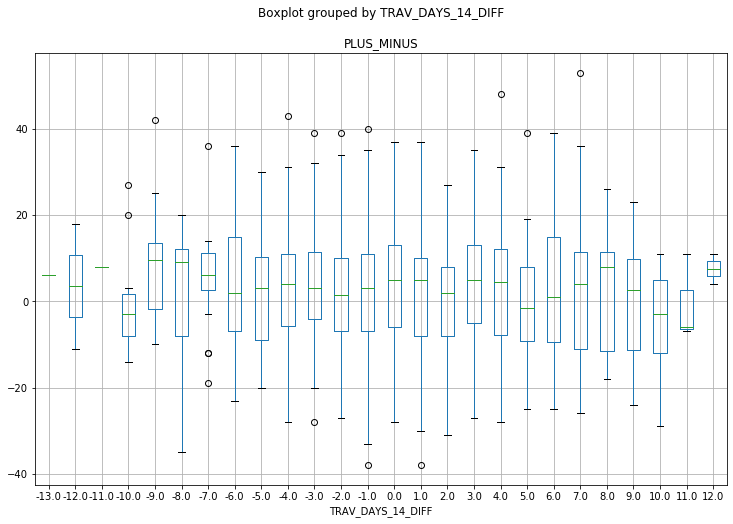

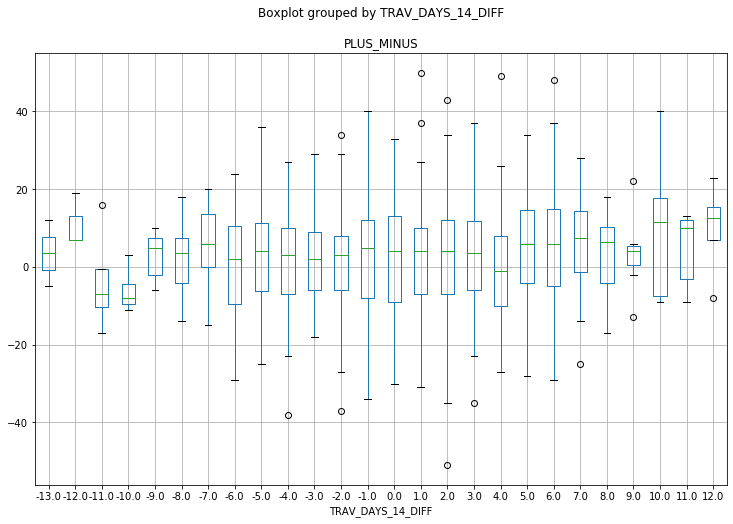

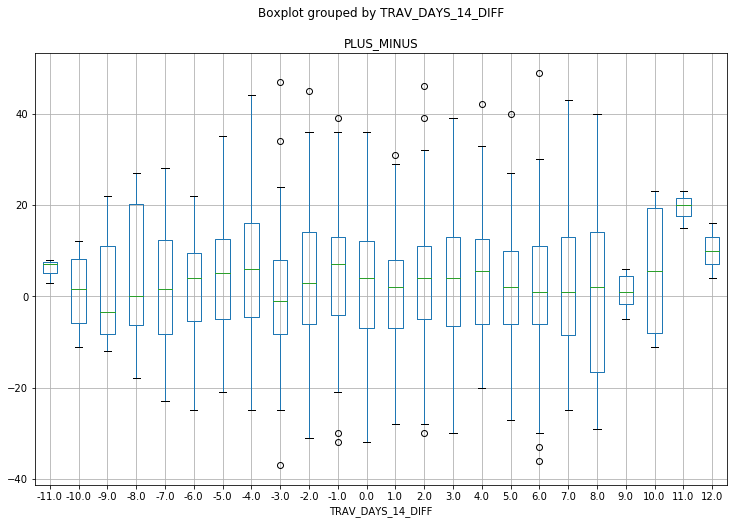

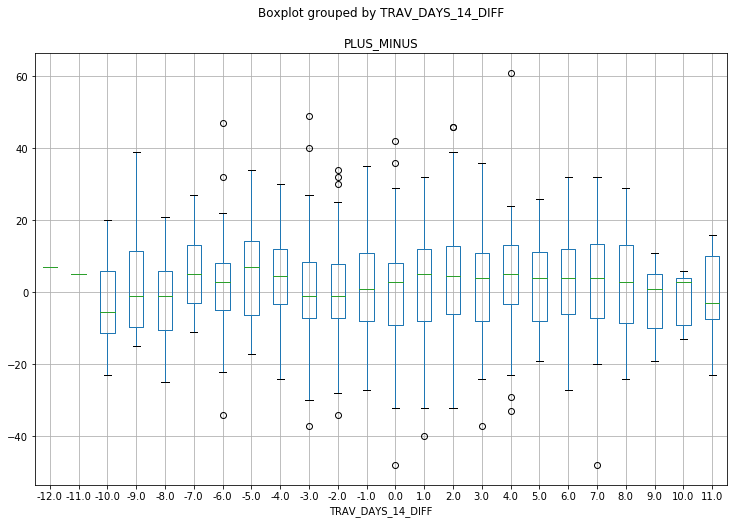

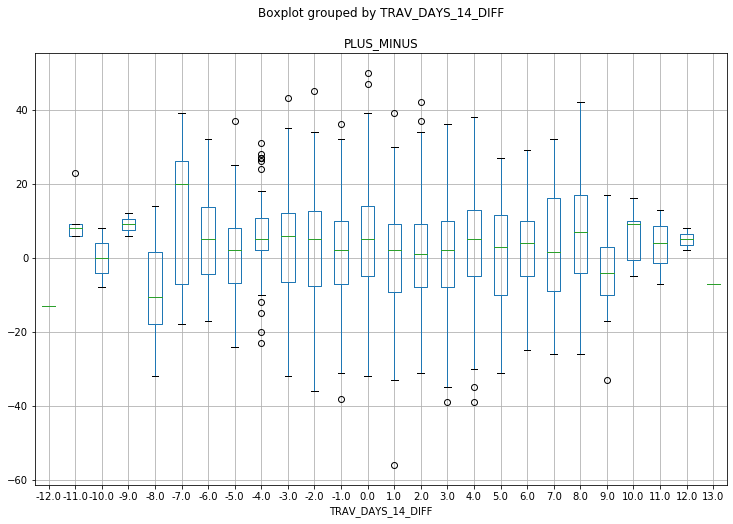

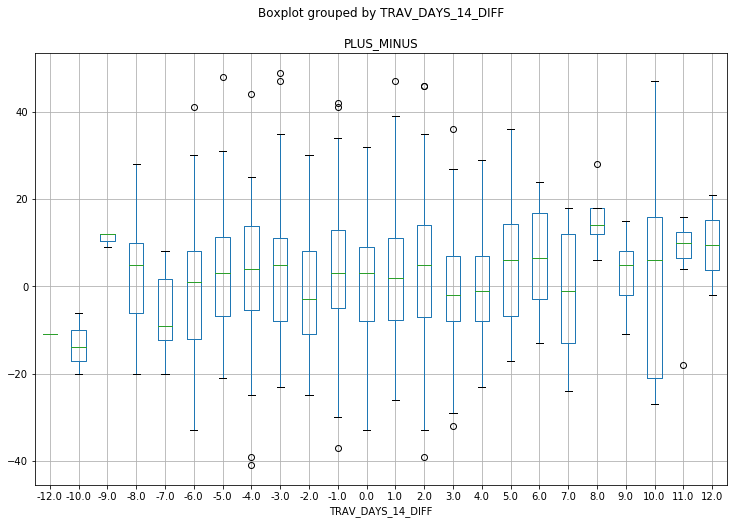

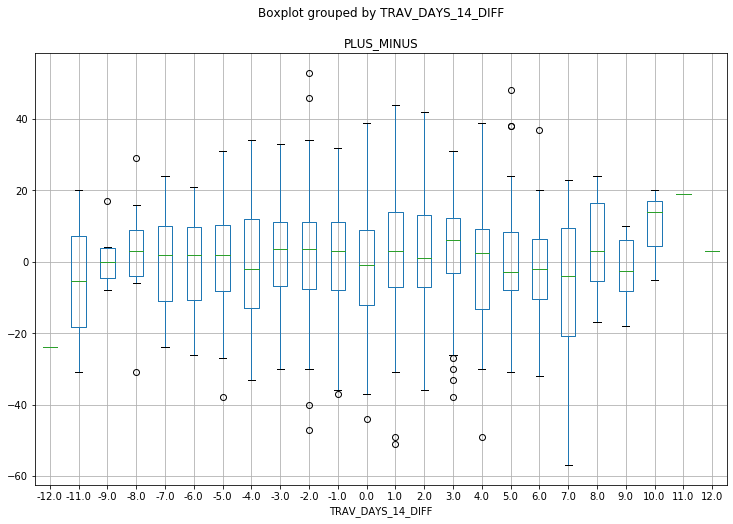

In [27]:

for i in range(0, len(games)):
    games[i]['TRAV_DAYS_14_DIFF'] = games[i]['TRAV_DAYS_14']-games[i]['TRAV_DAYS_14-']
    games[i]['TRAV_DAYS_28_DIFF'] = games[i]['TRAV_DAYS_28']-games[i]['TRAV_DAYS_28-']
    games[i][games[i]['MATCHUP'].str.contains('vs.')].boxplot(column=['PLUS_MINUS'], by='TRAV_DAYS_14_DIFF', figsize=(12,8))

In [41]:
g = pd.concat([games[2],games[3],games[4],games[5],games[6]])
#for i in range(4,len(games)):
g = g[(g['TRAV_DAYS_14_DIFF'] < 4) & (g['TRAV_DAYS_14_DIFF'] > -4) & (g['MATCHUP'].str.contains('vs.'))]
X = pd.DataFrame(np.column_stack([np.ones(len(g)),g['TRAV_DAYS_14_DIFF']]))

y = (g['PLUS_MINUS']).tolist()

slr=sm.OLS(y, X).fit()
print(slr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2130
Date:                Wed, 08 Dec 2021   Prob (F-statistic):              0.645
Time:                        15:14:16   Log-Likelihood:                -2951.7
No. Observations:                 714   AIC:                             5907.
Df Residuals:                     712   BIC:                             5917.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              1.5657      0.569      2.751      0.0

In [29]:
games[4].head()

SEASON_YEAR     TEAM_ID TEAM_ABBREVIATION              TEAM_NAME   GAME_ID  \
0     2018-19  1610612738               BOS         Boston Celtics  21800001   
1     2018-19  1610612744               GSW  Golden State Warriors  21800002   
1     2018-19  1610612755               PHI     Philadelphia 76ers  21800001   
0     2018-19  1610612760               OKC  Oklahoma City Thunder  21800002   
9     2018-19  1610612742               DAL       Dallas Mavericks  21800013   

    GAME_DATE      MATCHUP WL   MIN       FGM  ...  REST_28-  \
0  2018-10-16  BOS vs. PHI  W  48.0  0.875000  ...        28   
1  2018-10-16  GSW vs. OKC  W  48.0  0.875000  ...        28   
1  2018-10-16    PHI @ BOS  L  48.0  0.708333  ...        28   
0  2018-10-16    OKC @ GSW  L  48.0  0.687500  ...        28   
9  2018-10-17    DAL @ PHX  L  48.0  0.791667  ...        28   

   REST_RECENT_DIFF  REST_14_DIFF  REST_28_DIFF  TRAV_DAYS_14  TRAV_DAYS_28  \
0                 0             0             0           0.0           0.0   
1                 0             0             0           0.0           0.0   
1                 0             0             0           0.0           0.0   
0                 0             0             0           0.0           0.0   
9                 0             0             0           0.0           0.0   

   TRAV_DAYS_14-  TRAV_DAYS_28-  TRAV_DAYS_14_DIFF  TRAV_DAYS_28_DIFF  
0            0.0            0.0                0.0                0.0  
1            0.0            0.0                0.0                0.0  
1            0.0            0.0                0.0                0.0  
0            0.0            0.0                0.0                0.0  
9            0.0            0.0                0.0                0.0  

[5 rows x 84 columns]